In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [7]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)
o = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
o.set_index('year_month', inplace=True)

In [8]:
df['Abstraction'] = w['Usage']
df['D4N0066'] = v[' D4N0066']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0037'] = v[' D4N0037']
df['D4N0115'] = z[' D4N0115']
df['D4N0116'] = v[' D4N0116']

In [9]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0066  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0116  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ..

In [10]:
df = df[['D4N0066' ,'D4N0122' ,'D4N0037','D4N0115','D4N0116' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [11]:
df

D4N0066  D4N0122  D4N0037  D4N0115  D4N0116  Temperature  \
year_month                                                             
1950-01-01      NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01      NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01      NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01      NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01      NaN      NaN      NaN      NaN      NaN        14.60   
...             ...      ...      ...      ...      ...          ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [12]:
f = lambda x: -x; 
gwls = df[['D4N0066' ,'D4N0122' ,'D4N0037','D4N0115','D4N0116' ]].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [13]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0066    D4N0122    D4N0037    D4N0115    D4N0116
0 1975-03-01 1975-05-01 1973-08-01 1975-05-01 1975-05-01
1 2002-04-01 2003-11-01 2012-02-01 2005-03-01 2005-01-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [14]:

gwls = gwls[gwls.index > '1975-02-01']  
gwls = gwls[gwls.index < '2012-03-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

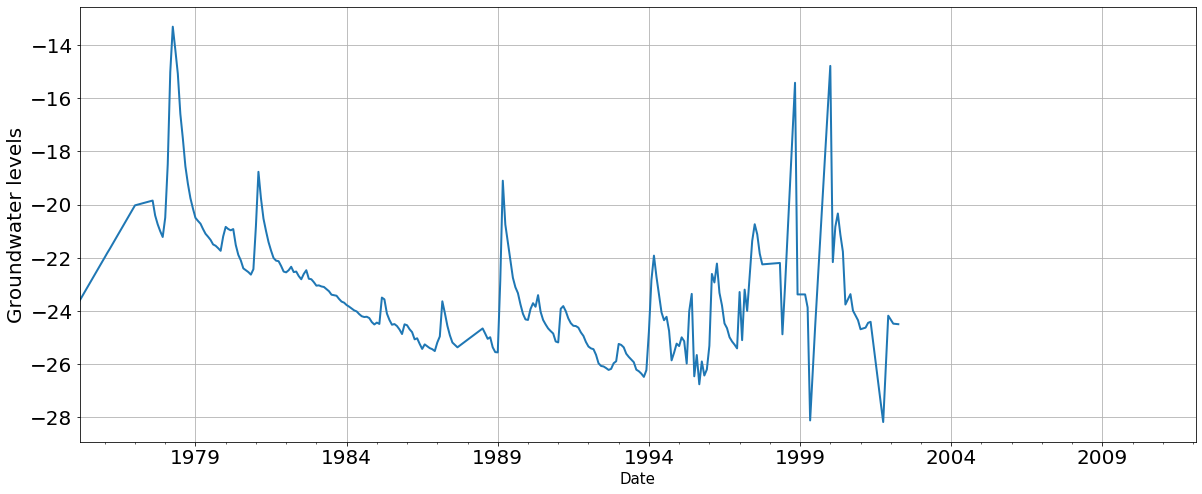

In [15]:
#visual illustration just to show all groundwater levels 
gwls['D4N0066'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [16]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0066  D4N0122    D4N0037  D4N0115  D4N0116  Temperature  \
year_month                                                                 
1975-03-01 -23.620000      NaN -19.080000      NaN      NaN        20.65   
1975-04-01 -23.454390      NaN -16.830000      NaN      NaN        17.80   
1975-05-01 -23.294122   -19.09 -16.500000   -13.18    -1.41        15.30   
1975-06-01 -23.128512   -18.71 -16.600000   -11.60    -1.83        12.10   
1975-07-01 -22.968244   -18.94 -16.785000   -11.73    -2.27        11.85   
...               ...      ...        ...      ...      ...          ...   
2011-10-01        NaN      NaN -30.700000      NaN      NaN        19.30   
2011-11-01        NaN      NaN -30.069891      NaN      NaN        21.50   
2011-12-01        NaN      NaN -29.460109      NaN      NaN        22.00   
2012-01-01        NaN      NaN -28.830000      NaN      NaN        23.35   
2012-02-01        NaN      NaN -28.850000      NaN      NaN        22.70   

            precip_trend  Discharge   Abstraction  
year_month                                         
1975-03-01     75.387500      0.488  1.665429e+05  
1975-04-01     74.191667      0.730  1.665429e+05  
1975-05-01     76.900000      1.032  1.665429e+05  
1975-06-01     83.904167      0.938  1.665429e+05  
1975-07-01     89.433333      0.872  1.665429e+05  
...                  ...        ...           ...  
2011-10-01     44.183333      0.644  2.424806e+06  
2011-11-01     38.333333      0.633  2.424806e+06  
2011-12-01     35.783333      0.629  2.424806e+06  
2012-01-01     34.008333      0.612  2.417254e+06  
2012-02-01     33.908333      0.588  2.417254e+06  

[444 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [17]:
pima = gwls.filter(['D4N0066', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1975-04-01']  
pima = pima[pima.index < '2002-03-01'] 

In [18]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0066          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [19]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

In [20]:
#pima.to_excel('/Users/yolanda/Downloads/BHID_D4N0066.xlsx')

#### Calculating start and end dates for new dataframa

In [21]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0066 Temperature precip_trend  Discharge Abstraction
0 1975-05-01  1975-05-01   1975-05-01 1975-05-01  1975-05-01
1 2002-02-01  2002-02-01   2002-02-01 2002-02-01  2002-02-01

### Mutual information stats

In [22]:
from sklearn.feature_selection import mutual_info_regression

In [25]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0066']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [26]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.049404
precip_trend    0.367548
Discharge       0.820849
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [27]:
precip834  = pima.filter(['D4N0066', 'precip_trend'])
discha834  = pima.filter(['D4N0066', 'Discharge'])
temp834    = pima.filter(['D4N0066', 'Temperature'])
abstr834   = pima.filter(['D4N0066', 'Abstraction'])

In [28]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

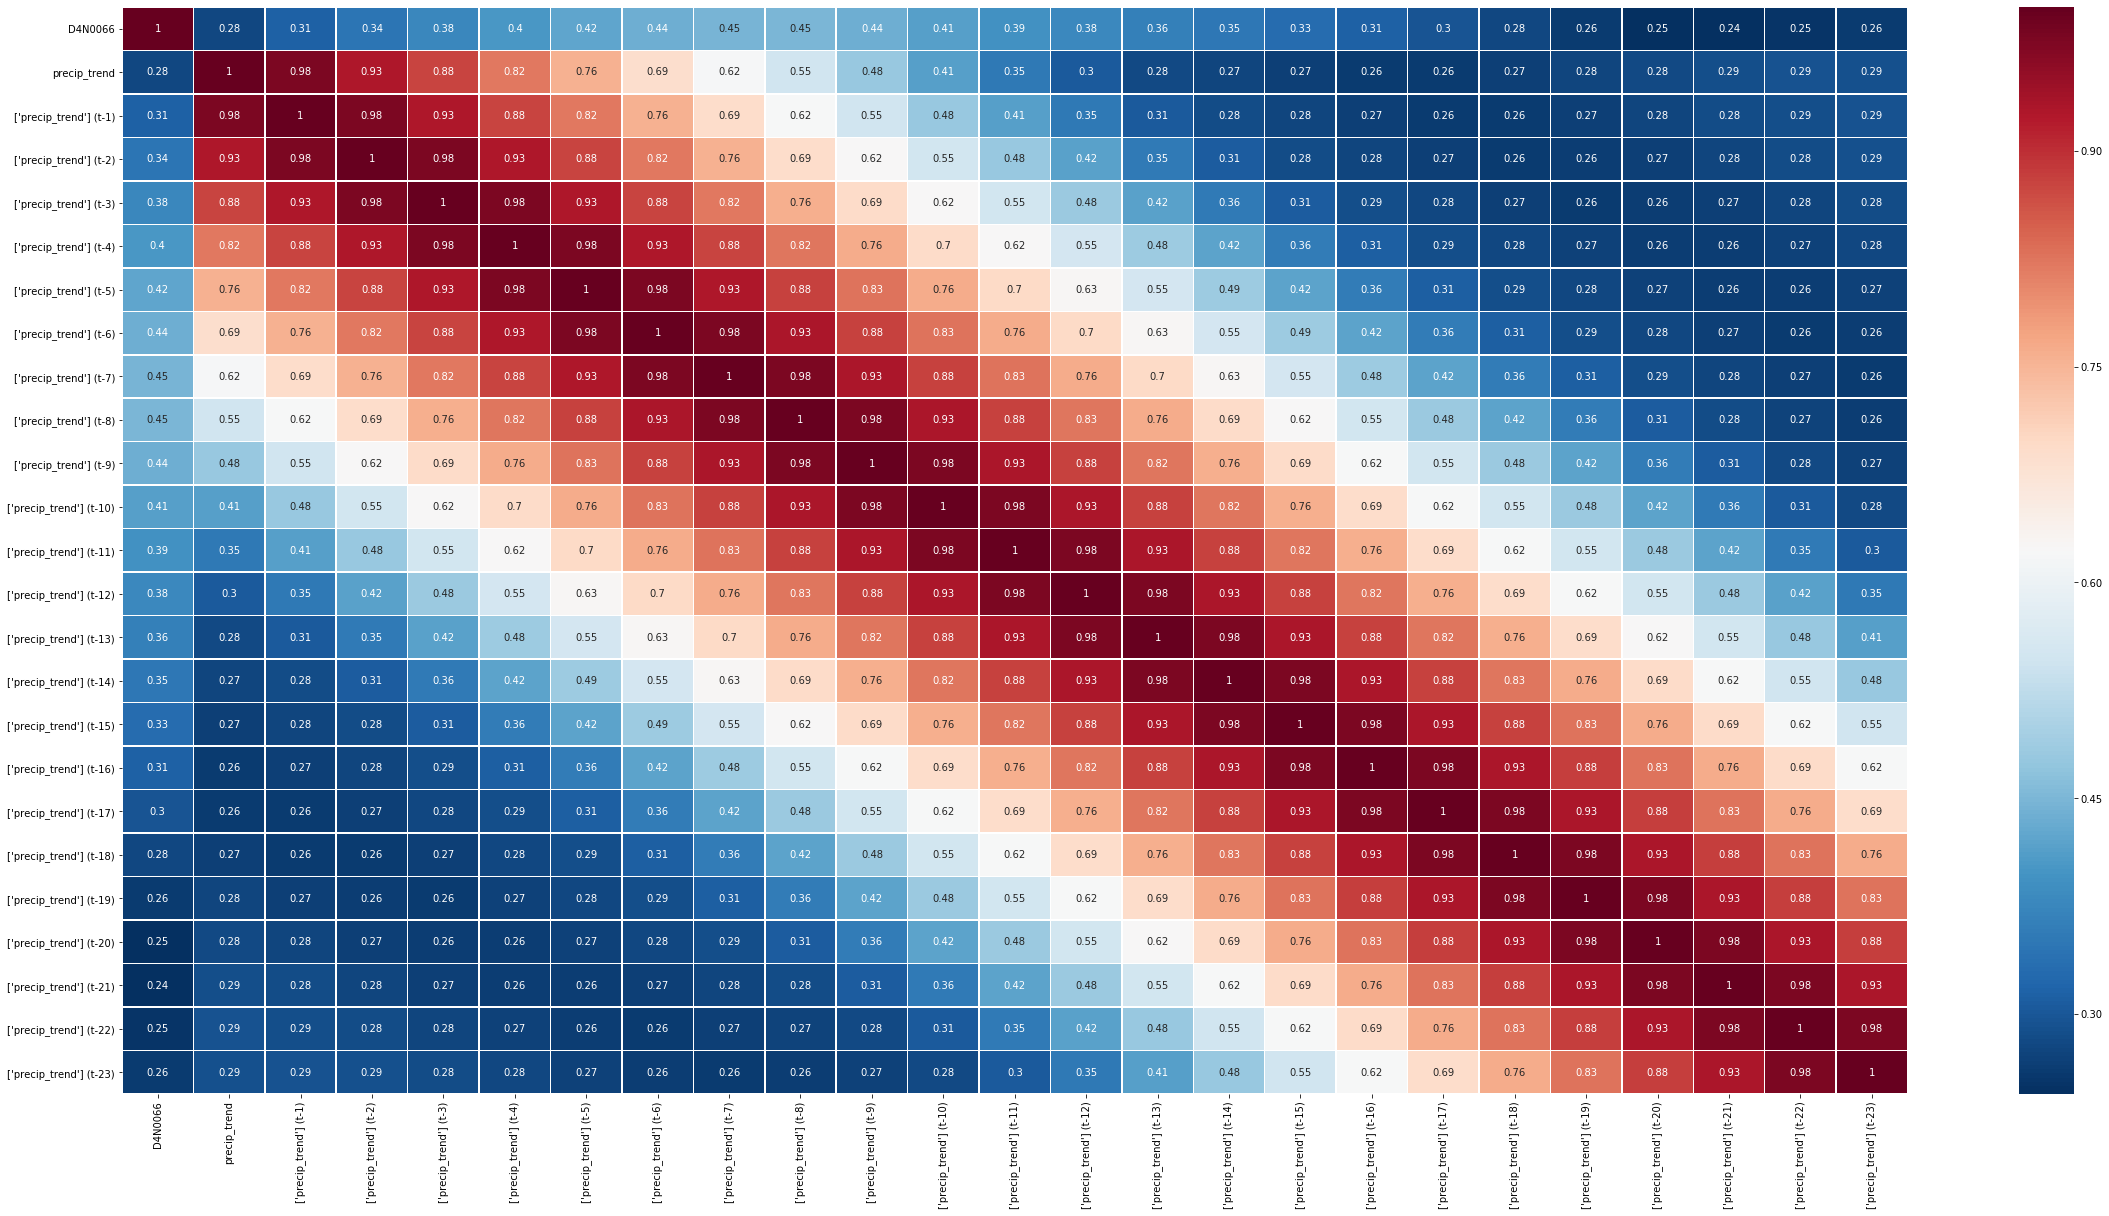

In [29]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

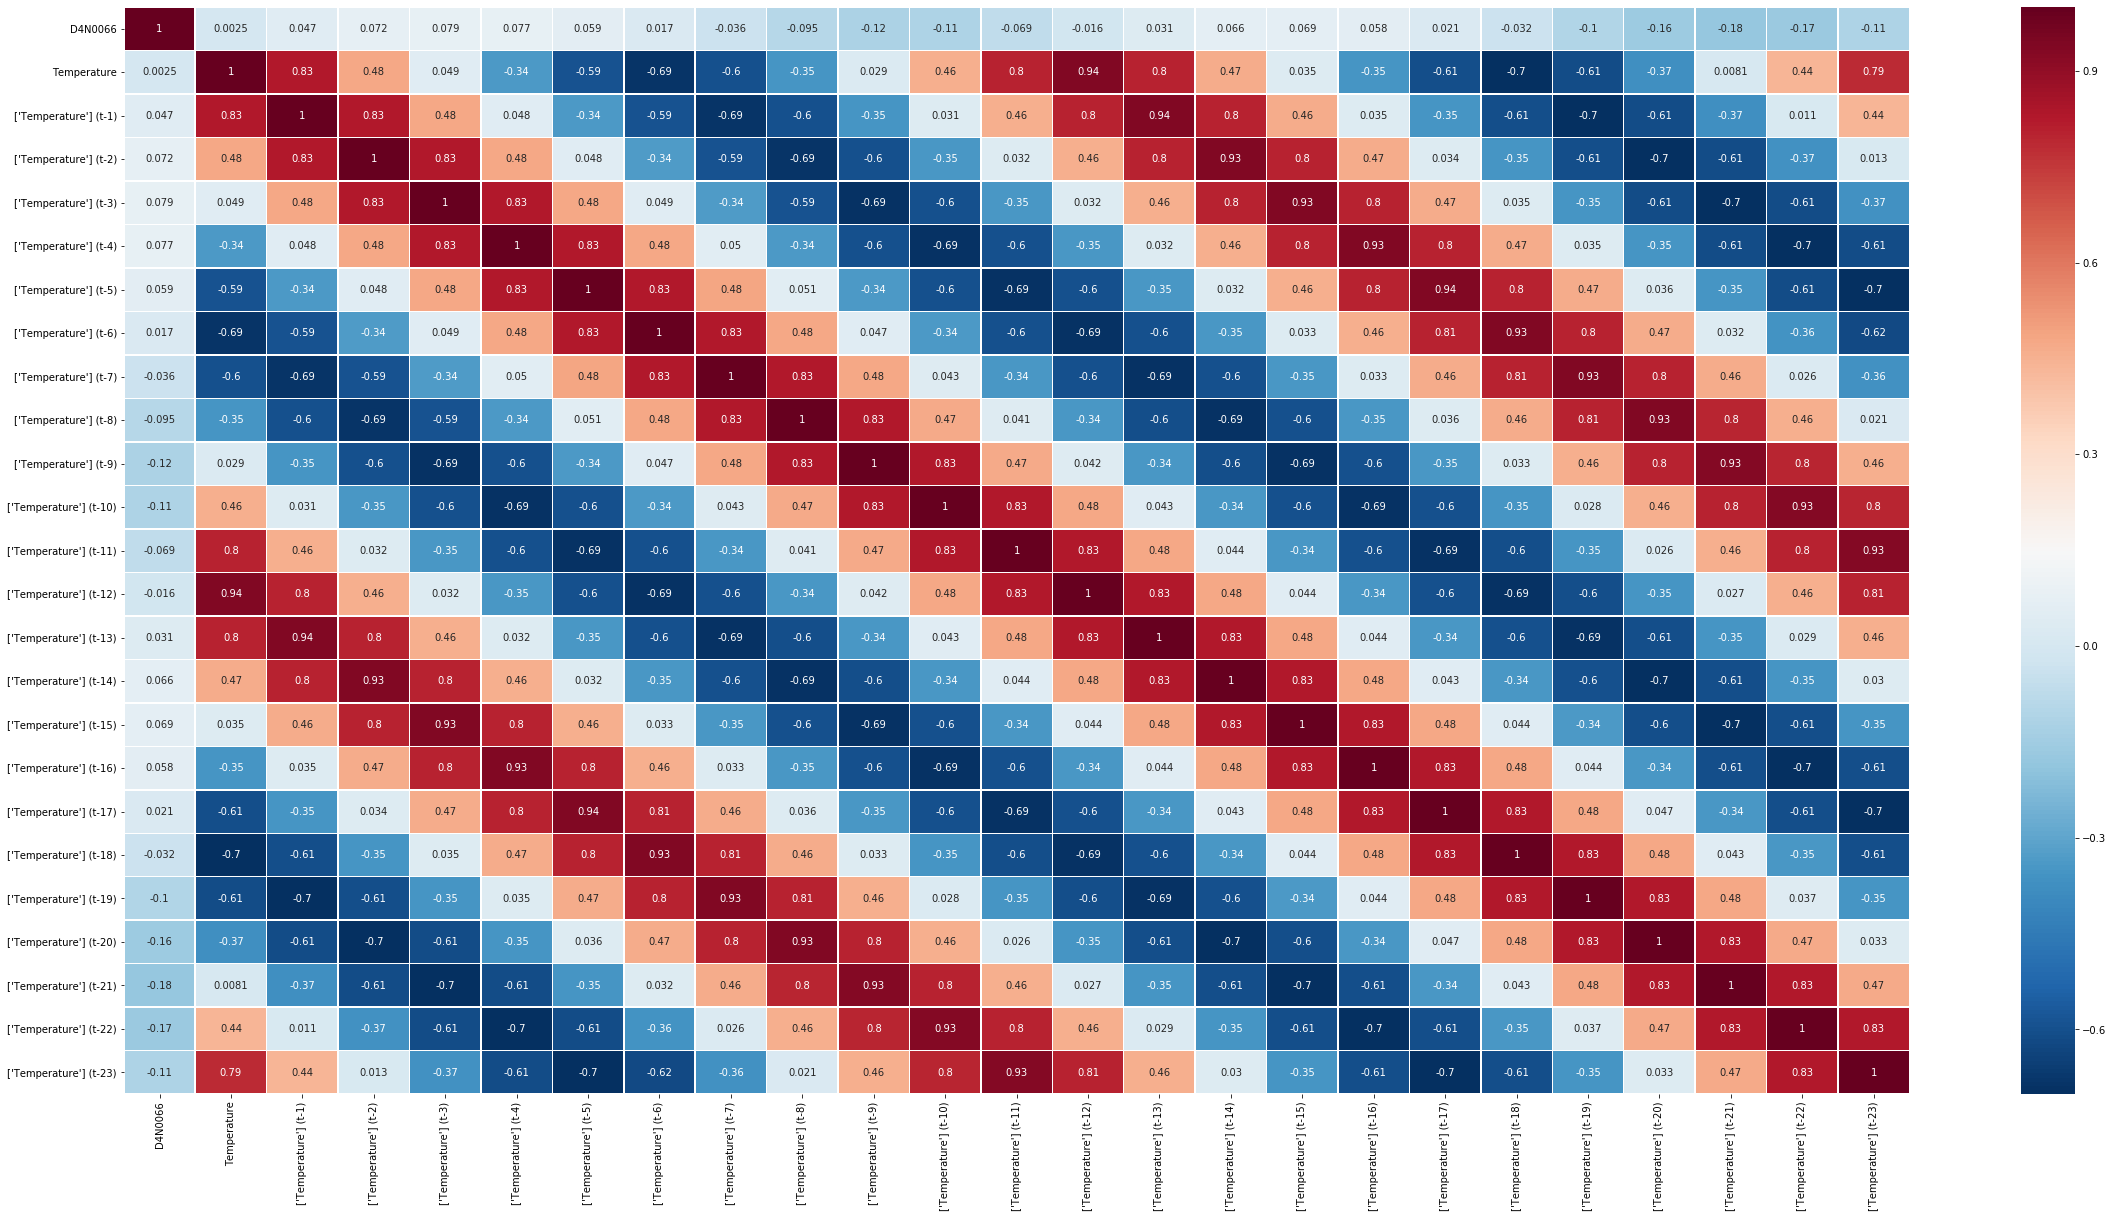

In [30]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [46]:
pima['Temperature (t-5)'] = pima.Temperature.shift(3)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(1)
pima

D4N0066  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-05-01 -23.294122        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -23.128512        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -22.968244        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -22.802634        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -22.637024        19.80     93.183333      0.809  1.665429e+05   
...               ...          ...           ...        ...           ...   
2001-10-01 -28.180000        19.35     46.642213      0.401  2.424465e+06   
2001-11-01 -26.147213        19.20     42.850273      0.390  2.424465e+06   
2001-12-01 -24.180000        20.95     44.166667      0.397  2.424465e+06   
2002-01-01 -24.330000        22.15     44.483333      0.539  2.568580e+06   
2002-02-01 -24.480000        21.35     44.400000      0.603  2.568580e+06   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1975-05-01                NaN                  NaN  
1975-06-01                NaN            76.900000  
1975-07-01                NaN            83.904167  
1975-08-01              15.30            89.433333  
1975-09-01              12.10            93.183333  
...                       ...                  ...  
2001-10-01               9.75            51.792213  
2001-11-01              13.15            46.642213  
2001-12-01              15.35            42.850273  
2002-01-01              19.35            44.166667  
2002-02-01              19.20            44.483333  

[322 rows x 7 columns]

In [47]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0066']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [48]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [49]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-5)      0.160243
precip_trend (t-16)    0.371486
Discharge              0.828408
Abstraction            1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [51]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0066']

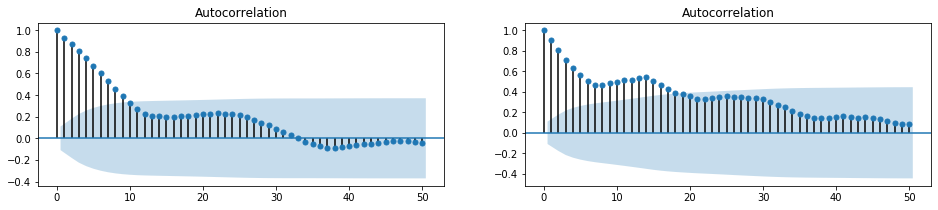

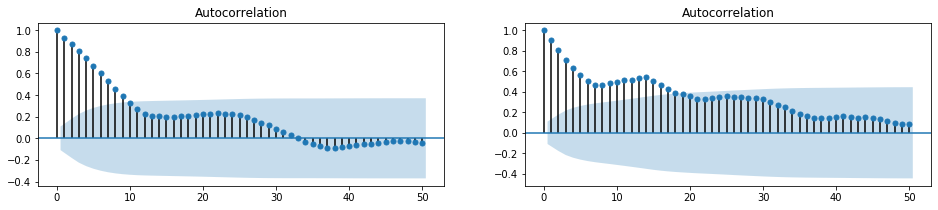

In [52]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

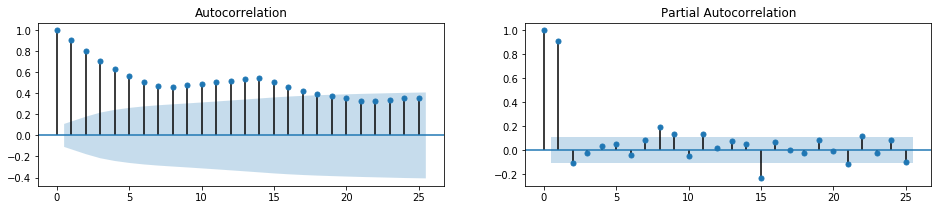

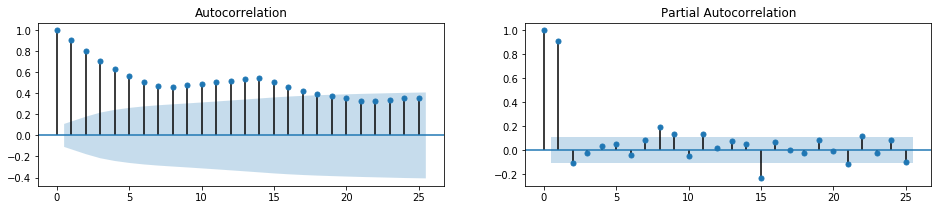

In [53]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

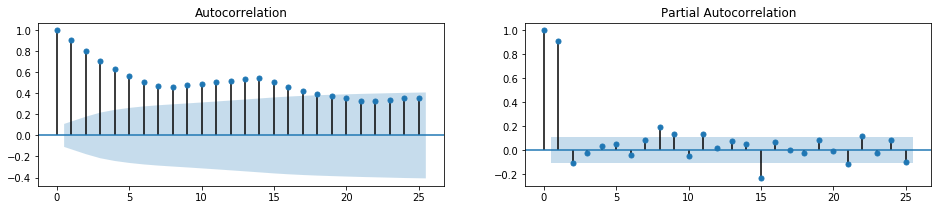

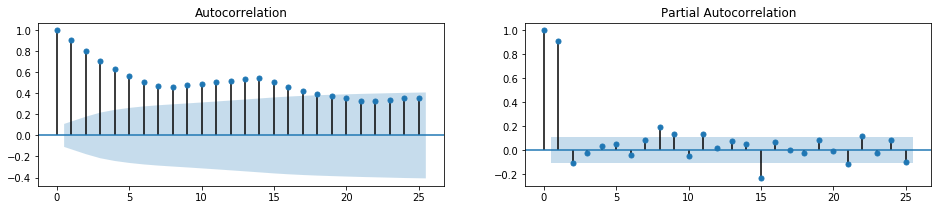

In [54]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

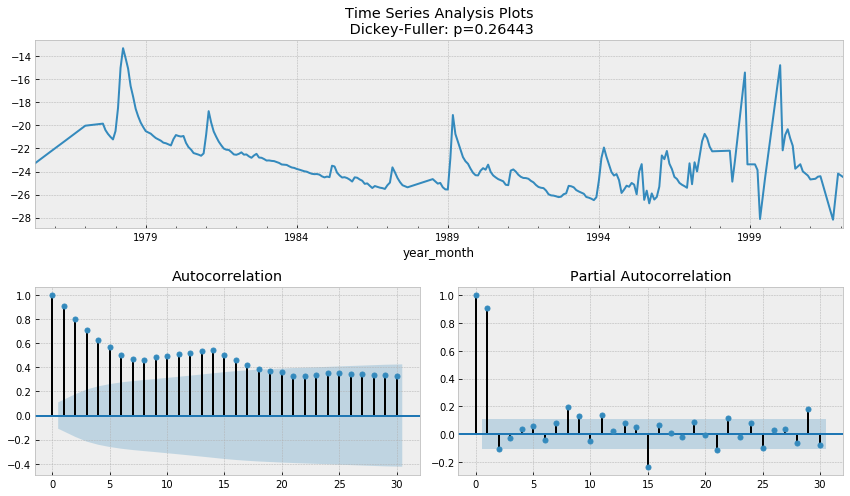

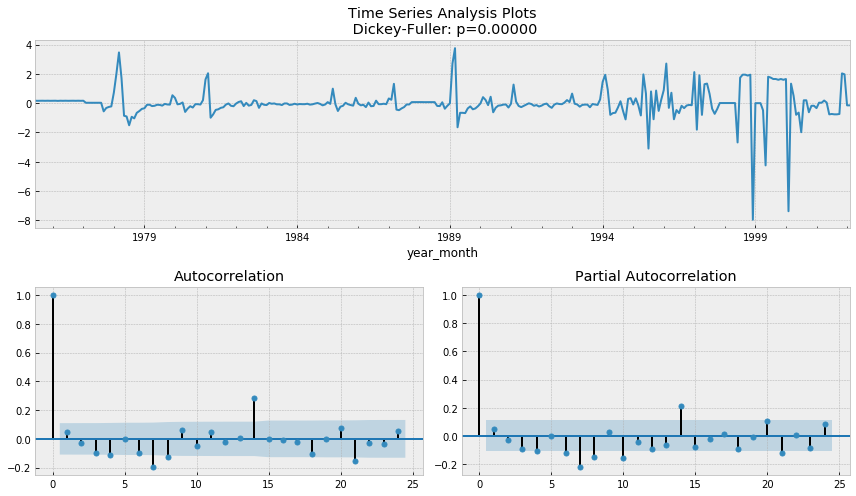

In [55]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0122_diff = bhid - bhid.shift(1)

tsplot(D4N0122_diff[1:], lags=24)

#### Rainfall

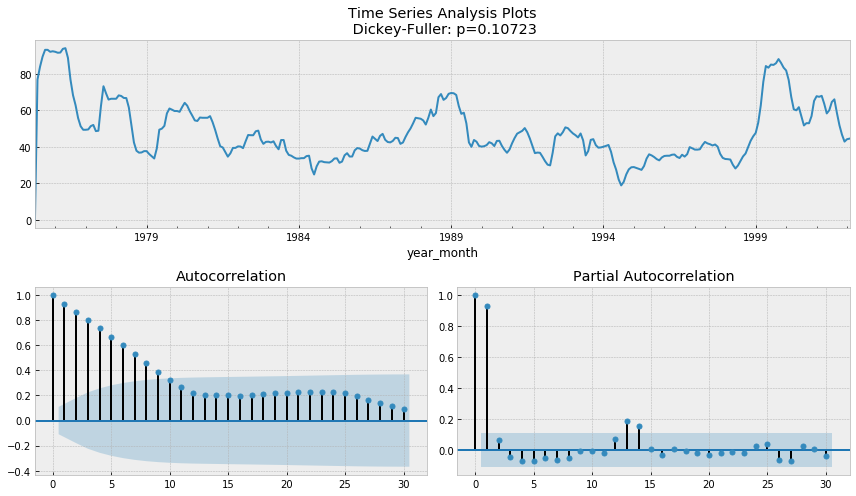

In [56]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

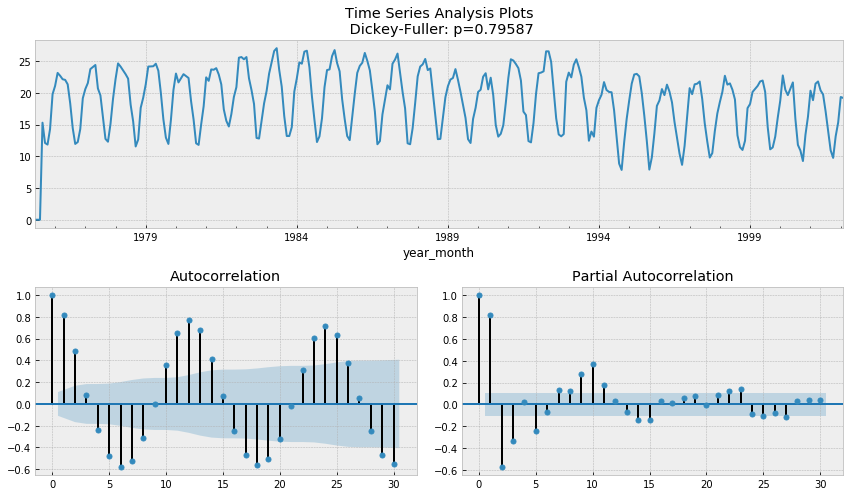

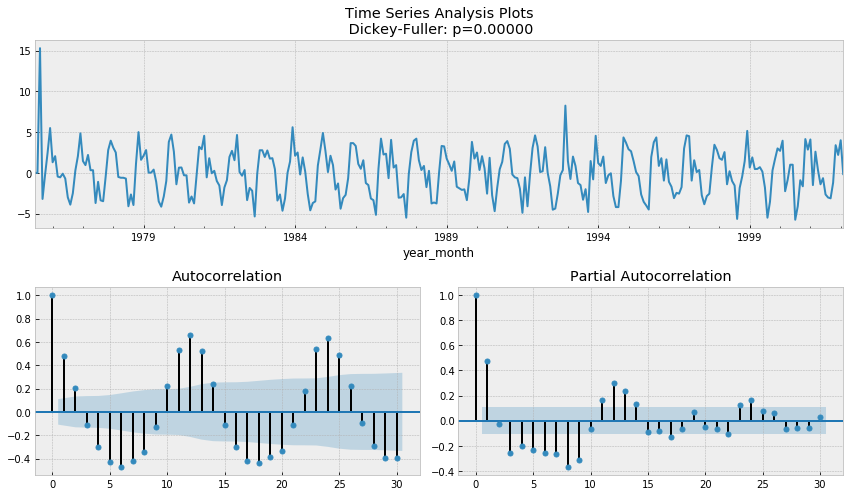

In [57]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

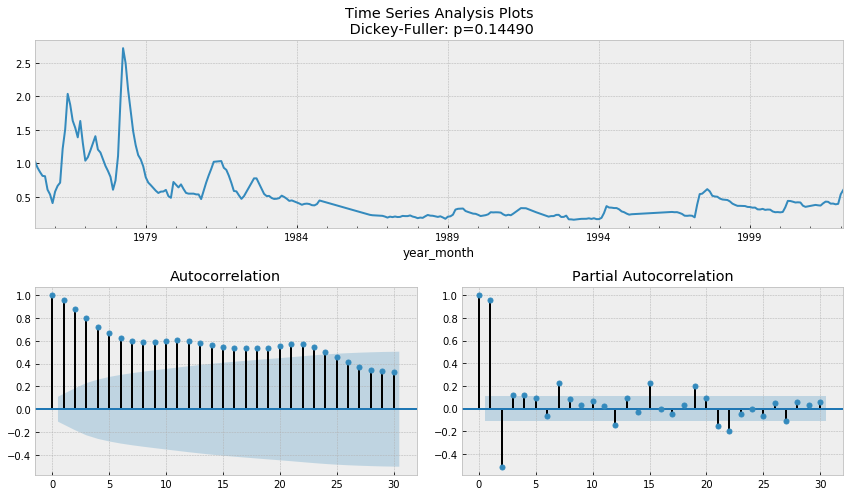

In [58]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

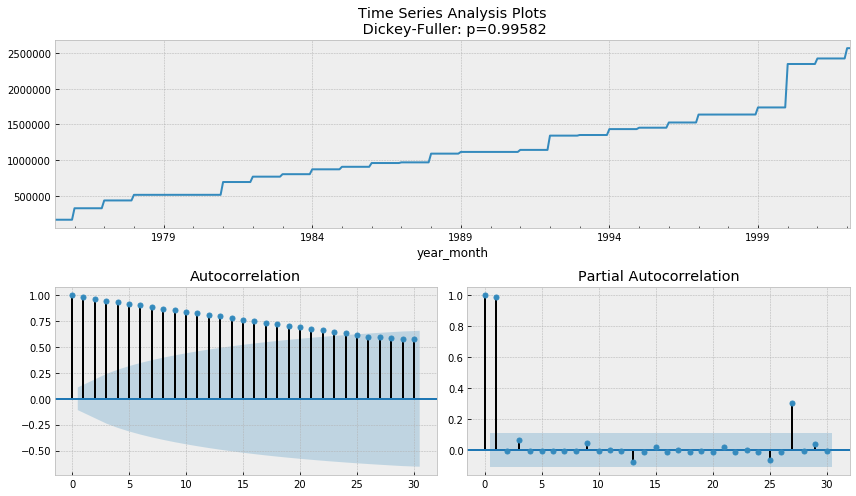

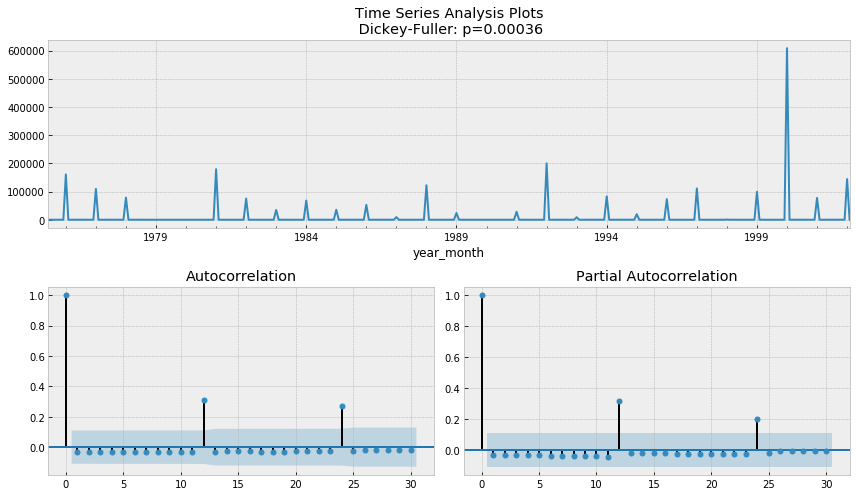

In [59]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [60]:
pima_diff = pd.DataFrame({'D4N0122': D4N0122_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0122','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0122           1
Temperature       1
precip_trend    322
Discharge         0
Abstraction       1
dtype: int64

In [61]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

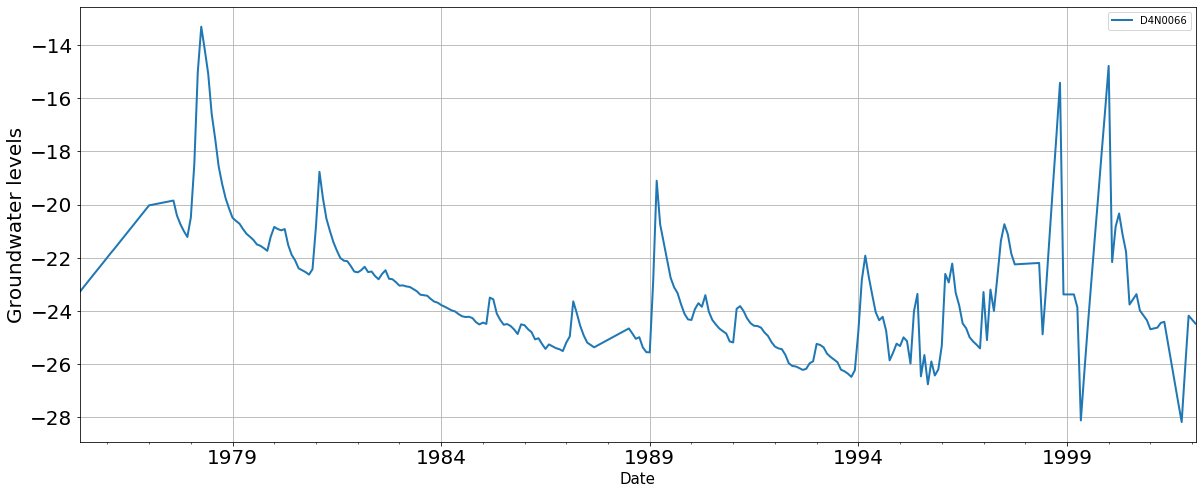

In [62]:
pima[['D4N0066']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [63]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [64]:
pima

D4N0066  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-05-01 -23.294122        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -23.128512        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -22.968244        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -22.802634        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -22.637024        19.80     93.183333      0.809  1.665429e+05   
...               ...          ...           ...        ...           ...   
2001-10-01 -28.180000        19.35     46.642213      0.401  2.424465e+06   
2001-11-01 -26.147213        19.20     42.850273      0.390  2.424465e+06   
2001-12-01 -24.180000        20.95     44.166667      0.397  2.424465e+06   
2002-01-01 -24.330000        22.15     44.483333      0.539  2.568580e+06   
2002-02-01 -24.480000        21.35     44.400000      0.603  2.568580e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1975-05-01                NaN                  NaN               NaN   
1975-06-01                NaN            76.900000          5.355426   
1975-07-01                NaN            83.904167          5.441523   
1975-08-01              15.30            89.433333          5.504613   
1975-09-01              12.10            93.183333          5.545243   
...                       ...                  ...               ...   
2001-10-01               9.75            51.792213          4.966364   
2001-11-01              13.15            46.642213          4.863719   
2001-12-01              15.35            42.850273          4.780781   
2002-01-01              19.35            44.166667          4.810359   
2002-02-01              19.20            44.483333          4.817346   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1975-05-01              NaN       1.709021        13.023014  
1975-06-01              NaN       1.661657        13.023014  
1975-07-01              NaN       1.627007        13.023014  
1975-08-01         3.791165       1.595534        13.023014  
1975-09-01         3.572612       1.592774        13.023014  
...                     ...            ...              ...  
2001-10-01         3.374906       1.337186        15.701122  
2001-11-01         3.649715       1.329304        15.701122  
2001-12-01         3.794228       1.334327        15.701122  
2002-01-01         4.013081       1.431133        15.758864  
2002-02-01         4.005683       1.471877        15.758864  

[322 rows x 11 columns]

In [65]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0066.shift(obs)
pima.fillna(0, inplace=True)

In [66]:
pima

D4N0066  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-05-01 -23.294122        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -23.128512        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -22.968244        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -22.802634        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -22.637024        19.80     93.183333      0.809  1.665429e+05   
...               ...          ...           ...        ...           ...   
2001-10-01 -28.180000        19.35     46.642213      0.401  2.424465e+06   
2001-11-01 -26.147213        19.20     42.850273      0.390  2.424465e+06   
2001-12-01 -24.180000        20.95     44.166667      0.397  2.424465e+06   
2002-01-01 -24.330000        22.15     44.483333      0.539  2.568580e+06   
2002-02-01 -24.480000        21.35     44.400000      0.603  2.568580e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1975-05-01               0.00             0.000000          0.000000   
1975-06-01               0.00            76.900000          5.355426   
1975-07-01               0.00            83.904167          5.441523   
1975-08-01              15.30            89.433333          5.504613   
1975-09-01              12.10            93.183333          5.545243   
...                       ...                  ...               ...   
2001-10-01               9.75            51.792213          4.966364   
2001-11-01              13.15            46.642213          4.863719   
2001-12-01              15.35            42.850273          4.780781   
2002-01-01              19.35            44.166667          4.810359   
2002-02-01              19.20            44.483333          4.817346   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1975-05-01         0.000000       1.709021        13.023014   0.000000   
1975-06-01         0.000000       1.661657        13.023014 -23.294122   
1975-07-01         0.000000       1.627007        13.023014 -23.128512   
1975-08-01         3.791165       1.595534        13.023014 -22.968244   
1975-09-01         3.572612       1.592774        13.023014 -22.802634   
...                     ...            ...              ...        ...   
2001-10-01         3.374906       1.337186        15.701122 -27.440784   
2001-11-01         3.649715       1.329304        15.701122 -28.180000   
2001-12-01         3.794228       1.334327        15.701122 -26.147213   
2002-01-01         4.013081       1.431133        15.758864 -24.180000   
2002-02-01         4.005683       1.471877        15.758864 -24.330000   

                  t_2        t_3        t_4  
year_month                                   
1975-05-01   0.000000   0.000000   0.000000  
1975-06-01   0.000000   0.000000   0.000000  
1975-07-01 -23.294122   0.000000   0.000000  
1975-08-01 -23.128512 -23.294122   0.000000  
1975-09-01 -22.968244 -23.128512 -23.294122  
...               ...        ...        ...  
2001-10-01 -26.676928 -25.913072 -25.173856  
2001-11-01 -27.440784 -26.676928 -25.913072  
2001-12-01 -28.180000 -27.440784 -26.676928  
2002-01-01 -26.147213 -28.180000 -27.440784  
2002-02-01 -24.180000 -26.147213 -28.180000  

[322 rows x 15 columns]

In [67]:
pima.shape

(322, 15)

In [68]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0066']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [69]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0066']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.068261
precip_trend_log    0.197856
Discharge_log       0.471548
Abstraction_log     0.563520
t_1                 1.000000
t_2                 0.690891
dtype: float64

In [70]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0066'].values
y = y.reshape(-1,1)

In [71]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(269, 6) (269, 1)
(53, 6) (53, 1)


In [72]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [73]:
y_test[0]

array([0.40812773])

### LSTM

In [75]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [76]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = 0.40812773
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')

Running fold 1
(269, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 269 samples, validate on 53 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 0.5412 - mean_squared_error: 0.5412
Epoch 00001: val_loss improved from inf to 1.49113, saving model to model.h5
269/269 [==============================] - 3s 9ms/sample - loss: 0.7061 - mean_squared_error: 0.7061 - val_loss: 1.4911 - val_mean_squared_error: 1.4911
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4466 - mean_squared_error: 0.4466
Epoch 00002: val_loss improved from 1.49113 to 1.46802, saving model to model.h5
269/269 [==============================] - 0s 400us/sample - loss: 0.6092 - mean_squared_error: 0.6092 - val_loss: 1.4680 - val_mean_squared_error: 1.4680
Epoch 3/1000
 96/269 [=========>.....

Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1973 - mean_squared_error: 0.1973
Epoch 00023: val_loss improved from 1.22440 to 1.20938, saving model to model.h5
269/269 [==============================] - 0s 232us/sample - loss: 0.1811 - mean_squared_error: 0.1811 - val_loss: 1.2094 - val_mean_squared_error: 1.2094
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2515 - mean_squared_error: 0.2515
Epoch 00024: val_loss improved from 1.20938 to 1.19373, saving model to model.h5
269/269 [==============================] - 0s 228us/sample - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 1.1937 - val_mean_squared_error: 1.1937
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2618 - mean_squared_error: 0.2618
Epoch 00025: val_loss improved from 1.19373 to 1.17781, saving model to model.h5
269/269 [==============================] - 0s 198us/sample - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 1.177

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 00047: val_loss improved from 0.86069 to 0.84848, saving model to model.h5
269/269 [==============================] - 0s 287us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.8485 - val_mean_squared_error: 0.8485
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 00048: val_loss improved from 0.84848 to 0.84063, saving model to model.h5
269/269 [==============================] - 0s 261us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.8406 - val_mean_squared_error: 0.8406
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 00049: val_loss improved from 0.84063 to 0.83151, saving model to model.h5
269/269 [==============================] - 0s 217us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.831

Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 00071: val_loss did not improve from 0.70989
269/269 [==============================] - 0s 97us/sample - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.7101 - val_mean_squared_error: 0.7101
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1188 - mean_squared_error: 0.1188
Epoch 00072: val_loss improved from 0.70989 to 0.70456, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.7046 - val_mean_squared_error: 0.7046
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1228 - mean_squared_error: 0.1228
Epoch 00073: val_loss improved from 0.70456 to 0.69735, saving model to model.h5
269/269 [==============================] - 0s 205us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.6973 - val_mean_squared_error: 0.6

 96/269 [=========>....................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00095: val_loss improved from 0.64915 to 0.64640, saving model to model.h5
269/269 [==============================] - 0s 213us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.6464 - val_mean_squared_error: 0.6464
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00096: val_loss did not improve from 0.64640
269/269 [==============================] - 0s 166us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.6496 - val_mean_squared_error: 0.6496
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 00097: val_loss did not improve from 0.64640
269/269 [==============================] - 0s 139us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.6486 - val_mean_squared_error: 0.6486
Epoch 98/1000
 96/269 [=========>......

Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00120: val_loss improved from 0.61554 to 0.61406, saving model to model.h5
269/269 [==============================] - 0s 229us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.6141 - val_mean_squared_error: 0.6141
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00121: val_loss did not improve from 0.61406
269/269 [==============================] - 0s 244us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.6142 - val_mean_squared_error: 0.6142
Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00122: val_loss improved from 0.61406 to 0.61355, saving model to model.h5
269/269 [==============================] - 0s 193us/sample - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.6135 - val_mean_squared_error:

269/269 [==============================] - 0s 205us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.5933 - val_mean_squared_error: 0.5933
Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00145: val_loss did not improve from 0.59332
269/269 [==============================] - 0s 153us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.5951 - val_mean_squared_error: 0.5951
Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00146: val_loss did not improve from 0.59332
269/269 [==============================] - 0s 115us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 147/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00147: val_loss improved from 0.59332 to 0.59319, saving model to model.h5
269/269 [=============

Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00170: val_loss did not improve from 0.58302
269/269 [==============================] - 0s 100us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.5843 - val_mean_squared_error: 0.5843
Epoch 171/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 00171: val_loss did not improve from 0.58302
269/269 [==============================] - 0s 93us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.5843 - val_mean_squared_error: 0.5843
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00172: val_loss did not improve from 0.58302
269/269 [==============================] - 0s 104us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.5844 - val_mean_squared_error: 0.5844
Epoch 173/1000
 96/269 [=========>...................

Epoch 196/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 00196: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 103us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.5834 - val_mean_squared_error: 0.5834
Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00197: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 100us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.5824 - val_mean_squared_error: 0.5824
Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00198: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 90us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.5817 - val_mean_squared_error: 0.5817
Epoch 199/1000
 96/269 [=========>...................

Epoch 222/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00222: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 121us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.5861 - val_mean_squared_error: 0.5861
Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 00223: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 150us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.5833 - val_mean_squared_error: 0.5833
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00224: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 92us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5854 - val_mean_squared_error: 0.5854
Epoch 225/1000
 96/269 [=========>...................

Epoch 248/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00248: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 144us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.5904 - val_mean_squared_error: 0.5904
Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 00249: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 142us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.5922 - val_mean_squared_error: 0.5922
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00250: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 116us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.5881 - val_mean_squared_error: 0.5881
Epoch 251/1000
 96/269 [=========>..................

Epoch 274/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00274: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 93us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.5994 - val_mean_squared_error: 0.5994
Epoch 275/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 00275: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 161us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.6055 - val_mean_squared_error: 0.6055
Epoch 276/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0845 - mean_squared_error: 0.0845
Epoch 00276: val_loss did not improve from 0.57976
269/269 [==============================] - 0s 127us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.5978 - val_mean_squared_error: 0.5978
Epoch 277/1000
 96/269 [=========>...................

269/269 [==============================] - 0s 160us/sample - loss: 0.2843 - mean_squared_error: 0.2843 - val_loss: 1.1945 - val_mean_squared_error: 1.1945
Epoch 17/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2792 - mean_squared_error: 0.2792
Epoch 00017: val_loss improved from 1.19455 to 1.18296, saving model to model.h5
269/269 [==============================] - 0s 167us/sample - loss: 0.2605 - mean_squared_error: 0.2605 - val_loss: 1.1830 - val_mean_squared_error: 1.1830
Epoch 18/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2626 - mean_squared_error: 0.2626
Epoch 00018: val_loss improved from 1.18296 to 1.17142, saving model to model.h5
269/269 [==============================] - 0s 170us/sample - loss: 0.2494 - mean_squared_error: 0.2494 - val_loss: 1.1714 - val_mean_squared_error: 1.1714
Epoch 19/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1824 - mean_squared_error: 0.1824
Epoch 00019: val_loss improved from 1.17142 to

 96/269 [=========>....................] - ETA: 0s - loss: 0.1389 - mean_squared_error: 0.1389
Epoch 00040: val_loss improved from 0.91282 to 0.89947, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.1306 - mean_squared_error: 0.1306 - val_loss: 0.8995 - val_mean_squared_error: 0.8995
Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00041: val_loss improved from 0.89947 to 0.88787, saving model to model.h5
269/269 [==============================] - 0s 233us/sample - loss: 0.1286 - mean_squared_error: 0.1286 - val_loss: 0.8879 - val_mean_squared_error: 0.8879
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00042: val_loss improved from 0.88787 to 0.87684, saving model to model.h5
269/269 [==============================] - 0s 245us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.8768 - val_mean_s

Epoch 64/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00064: val_loss improved from 0.71762 to 0.71014, saving model to model.h5
269/269 [==============================] - 0s 193us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.7101 - val_mean_squared_error: 0.7101
Epoch 65/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00065: val_loss improved from 0.71014 to 0.70656, saving model to model.h5
269/269 [==============================] - 0s 189us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.7066 - val_mean_squared_error: 0.7066
Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00066: val_loss improved from 0.70656 to 0.70357, saving model to model.h5
269/269 [==============================] - 0s 205us/sample - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.703

Epoch 88/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00088: val_loss improved from 0.64536 to 0.64395, saving model to model.h5
269/269 [==============================] - 0s 183us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.6439 - val_mean_squared_error: 0.6439
Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 00089: val_loss improved from 0.64395 to 0.63951, saving model to model.h5
269/269 [==============================] - 0s 213us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.6395 - val_mean_squared_error: 0.6395
Epoch 90/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0728 - mean_squared_error: 0.0728
Epoch 00090: val_loss improved from 0.63951 to 0.63885, saving model to model.h5
269/269 [==============================] - 0s 282us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.638

Epoch 112/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 00112: val_loss improved from 0.61202 to 0.60923, saving model to model.h5
269/269 [==============================] - 0s 180us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.6092 - val_mean_squared_error: 0.6092
Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00113: val_loss improved from 0.60923 to 0.60874, saving model to model.h5
269/269 [==============================] - 0s 183us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.6087 - val_mean_squared_error: 0.6087
Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0863 - mean_squared_error: 0.0863
Epoch 00114: val_loss improved from 0.60874 to 0.60869, saving model to model.h5
269/269 [==============================] - 0s 231us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.

Epoch 137/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00137: val_loss did not improve from 0.59524
269/269 [==============================] - 0s 100us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.5966 - val_mean_squared_error: 0.5966
Epoch 138/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0862 - mean_squared_error: 0.0862
Epoch 00138: val_loss improved from 0.59524 to 0.59446, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.5945 - val_mean_squared_error: 0.5945
Epoch 139/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 00139: val_loss improved from 0.59446 to 0.59264, saving model to model.h5
269/269 [==============================] - 0s 150us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.5926 - val_mean_squared_error:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00162: val_loss improved from 0.58610 to 0.58409, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.5841 - val_mean_squared_error: 0.5841
Epoch 163/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00163: val_loss did not improve from 0.58409
269/269 [==============================] - 0s 109us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.5863 - val_mean_squared_error: 0.5863
Epoch 164/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00164: val_loss did not improve from 0.58409
269/269 [==============================] - 0s 105us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.5892 - val_mean_squared_error: 0.5892
Epoch 165/1000
 96/269 [=========>...

Epoch 188/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00188: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 108us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.5891 - val_mean_squared_error: 0.5891
Epoch 189/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00189: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 122us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.5868 - val_mean_squared_error: 0.5868
Epoch 190/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00190: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 101us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.5890 - val_mean_squared_error: 0.5890
Epoch 191/1000
 96/269 [=========>..................

Epoch 214/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 00214: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 100us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.5933 - val_mean_squared_error: 0.5933
Epoch 215/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00215: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 95us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.5893 - val_mean_squared_error: 0.5893
Epoch 216/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00216: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 101us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.5878 - val_mean_squared_error: 0.5878
Epoch 217/1000
 96/269 [=========>...................

Epoch 240/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 00240: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 104us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.5991 - val_mean_squared_error: 0.5991
Epoch 241/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00241: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 96us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.5970 - val_mean_squared_error: 0.5970
Epoch 242/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00242: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 89us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.6000 - val_mean_squared_error: 0.6000
Epoch 243/1000
 96/269 [=========>....................

Epoch 266/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 00266: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 101us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.6047 - val_mean_squared_error: 0.6047
Epoch 267/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00267: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 97us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.6077 - val_mean_squared_error: 0.6077
Epoch 268/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00268: val_loss did not improve from 0.58364
269/269 [==============================] - 0s 97us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.6078 - val_mean_squared_error: 0.6078
Running fold 3
(269, 6)
Train on 269 samples, validate

Epoch 22/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2955 - mean_squared_error: 0.2955
Epoch 00022: val_loss improved from 1.15990 to 1.14883, saving model to model.h5
269/269 [==============================] - 0s 216us/sample - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 1.1488 - val_mean_squared_error: 1.1488
Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1914 - mean_squared_error: 0.1914
Epoch 00023: val_loss improved from 1.14883 to 1.13518, saving model to model.h5
269/269 [==============================] - 0s 189us/sample - loss: 0.1836 - mean_squared_error: 0.1836 - val_loss: 1.1352 - val_mean_squared_error: 1.1352
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1784 - mean_squared_error: 0.1784
Epoch 00024: val_loss improved from 1.13518 to 1.12161, saving model to model.h5
269/269 [==============================] - 0s 165us/sample - loss: 0.1698 - mean_squared_error: 0.1698 - val_loss: 1.121

Epoch 46/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00046: val_loss improved from 0.82883 to 0.81868, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.8187 - val_mean_squared_error: 0.8187
Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00047: val_loss improved from 0.81868 to 0.80917, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.8092 - val_mean_squared_error: 0.8092
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00048: val_loss improved from 0.80917 to 0.79769, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.797

Epoch 70/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 00070: val_loss improved from 0.68439 to 0.68332, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.6833 - val_mean_squared_error: 0.6833
Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 00071: val_loss improved from 0.68332 to 0.67806, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.6781 - val_mean_squared_error: 0.6781
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 00072: val_loss improved from 0.67806 to 0.67475, saving model to model.h5
269/269 [==============================] - 0s 156us/sample - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.674

 96/269 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00094: val_loss improved from 0.63419 to 0.63321, saving model to model.h5
269/269 [==============================] - 0s 176us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.6332 - val_mean_squared_error: 0.6332
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00095: val_loss improved from 0.63321 to 0.63202, saving model to model.h5
269/269 [==============================] - 0s 198us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.6320 - val_mean_squared_error: 0.6320
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00096: val_loss improved from 0.63202 to 0.62869, saving model to model.h5
269/269 [==============================] - 0s 172us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.6287 - val_mean_s

Epoch 118/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00118: val_loss did not improve from 0.60354
269/269 [==============================] - 0s 102us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.6049 - val_mean_squared_error: 0.6049
Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1204 - mean_squared_error: 0.1204
Epoch 00119: val_loss improved from 0.60354 to 0.60323, saving model to model.h5
269/269 [==============================] - 0s 159us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.6032 - val_mean_squared_error: 0.6032
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00120: val_loss did not improve from 0.60323
269/269 [==============================] - 0s 126us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.6039 - val_mean_squared_error: 0.6039
Epoch 121/1000
 96/269

269/269 [==============================] - 0s 185us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.5891 - val_mean_squared_error: 0.5891
Epoch 143/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00143: val_loss improved from 0.58915 to 0.58714, saving model to model.h5
269/269 [==============================] - 0s 211us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.5871 - val_mean_squared_error: 0.5871
Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 00144: val_loss did not improve from 0.58714
269/269 [==============================] - 0s 145us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.5873 - val_mean_squared_error: 0.5873
Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00145: val_loss did not improve from 0.58714
269/269 [=============

 96/269 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00167: val_loss did not improve from 0.57771
269/269 [==============================] - 0s 106us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.5791 - val_mean_squared_error: 0.5791
Epoch 168/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00168: val_loss did not improve from 0.57771
269/269 [==============================] - 0s 101us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.5821 - val_mean_squared_error: 0.5821
Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00169: val_loss did not improve from 0.57771
269/269 [==============================] - 0s 111us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5832 - val_mean_squared_error: 0.5832
Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 193/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 00193: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 114us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 194/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00194: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 109us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.5785 - val_mean_squared_error: 0.5785
Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00195: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 116us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.5806 - val_mean_squared_error: 0.5806
Epoch 196/1000
 96/269 [=========>..................

Epoch 219/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00219: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 111us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 220/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00220: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 98us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.5819 - val_mean_squared_error: 0.5819
Epoch 221/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00221: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 166us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.5797 - val_mean_squared_error: 0.5797
Epoch 222/1000
 96/269 [=========>...................

Epoch 245/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00245: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 151us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.5858 - val_mean_squared_error: 0.5858
Epoch 246/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00246: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 146us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.5887 - val_mean_squared_error: 0.5887
Epoch 247/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00247: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 115us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.5879 - val_mean_squared_error: 0.5879
Epoch 248/1000
 96/269 [=========>..................

Epoch 271/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00271: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 122us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 272/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00272: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 114us/sample - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.5954 - val_mean_squared_error: 0.5954
Epoch 273/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00273: val_loss did not improve from 0.57560
269/269 [==============================] - 0s 105us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.5927 - val_mean_squared_error: 0.5927
Epoch 274/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.2578 - mean_squared_error: 0.2578
Epoch 00017: val_loss improved from 1.33037 to 1.32255, saving model to model.h5
269/269 [==============================] - 0s 163us/sample - loss: 0.2529 - mean_squared_error: 0.2529 - val_loss: 1.3226 - val_mean_squared_error: 1.3226
Epoch 18/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1726 - mean_squared_error: 0.1726
Epoch 00018: val_loss improved from 1.32255 to 1.31366, saving model to model.h5
269/269 [==============================] - 0s 149us/sample - loss: 0.2461 - mean_squared_error: 0.2461 - val_loss: 1.3137 - val_mean_squared_error: 1.3137
Epoch 19/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2188 - mean_squared_error: 0.2188
Epoch 00019: val_loss improved from 1.31366 to 1.30534, saving model to model.h5
269/269 [==============================] - 0s 212us/sample - loss: 0.2459 - mean_squared_error: 0.2459 - val_loss: 1.3053 - val_mean_s

Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1393 - mean_squared_error: 0.1393
Epoch 00041: val_loss improved from 0.97837 to 0.95917, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.1440 - mean_squared_error: 0.1440 - val_loss: 0.9592 - val_mean_squared_error: 0.9592
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1643 - mean_squared_error: 0.1643
Epoch 00042: val_loss improved from 0.95917 to 0.94388, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 0.9439 - val_mean_squared_error: 0.9439
Epoch 43/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1444 - mean_squared_error: 0.1444
Epoch 00043: val_loss improved from 0.94388 to 0.92777, saving model to model.h5
269/269 [==============================] - 0s 171us/sample - loss: 0.1276 - mean_squared_error: 0.1276 - val_loss: 0.927

Epoch 65/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1293 - mean_squared_error: 0.1293
Epoch 00065: val_loss improved from 0.71459 to 0.70979, saving model to model.h5
269/269 [==============================] - 0s 193us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.7098 - val_mean_squared_error: 0.7098
Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00066: val_loss improved from 0.70979 to 0.70455, saving model to model.h5
269/269 [==============================] - 0s 173us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.7045 - val_mean_squared_error: 0.7045
Epoch 67/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0879 - mean_squared_error: 0.0879
Epoch 00067: val_loss improved from 0.70455 to 0.70241, saving model to model.h5
269/269 [==============================] - 0s 225us/sample - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.702

Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00089: val_loss did not improve from 0.64680
269/269 [==============================] - 0s 129us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.6483 - val_mean_squared_error: 0.6483
Epoch 90/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00090: val_loss did not improve from 0.64680
269/269 [==============================] - 0s 140us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.6473 - val_mean_squared_error: 0.6473
Epoch 91/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 00091: val_loss improved from 0.64680 to 0.64160, saving model to model.h5
269/269 [==============================] - 0s 195us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.6416 - val_mean_squared_error: 0.6416
Epoch 92/1000
 96/269 [==

Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00114: val_loss did not improve from 0.61553
269/269 [==============================] - 0s 145us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.6162 - val_mean_squared_error: 0.6162
Epoch 115/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00115: val_loss improved from 0.61553 to 0.61543, saving model to model.h5
269/269 [==============================] - 0s 196us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.6154 - val_mean_squared_error: 0.6154
Epoch 116/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00116: val_loss improved from 0.61543 to 0.61151, saving model to model.h5
269/269 [==============================] - 0s 211us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.6115 - val_mean_squared_error:

Epoch 139/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00139: val_loss improved from 0.60334 to 0.60332, saving model to model.h5
269/269 [==============================] - 0s 197us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.6033 - val_mean_squared_error: 0.6033
Epoch 140/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00140: val_loss improved from 0.60332 to 0.60267, saving model to model.h5
269/269 [==============================] - 0s 208us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.6027 - val_mean_squared_error: 0.6027
Epoch 141/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 00141: val_loss did not improve from 0.60267
269/269 [==============================] - 0s 98us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.6043 - val_mean_squared_error: 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00164: val_loss did not improve from 0.59538
269/269 [==============================] - 0s 109us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.5969 - val_mean_squared_error: 0.5969
Epoch 165/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00165: val_loss did not improve from 0.59538
269/269 [==============================] - 0s 98us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.5966 - val_mean_squared_error: 0.5966
Epoch 166/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00166: val_loss did not improve from 0.59538
269/269 [==============================] - 0s 138us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5997 - val_mean_squared_error: 0.5997
Epoch 167/1000
 96/269 [=========>....................] - ETA: 0s - 

Epoch 190/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 00190: val_loss did not improve from 0.59324
269/269 [==============================] - 0s 242us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.5935 - val_mean_squared_error: 0.5935
Epoch 191/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 00191: val_loss did not improve from 0.59324
269/269 [==============================] - 0s 282us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.5946 - val_mean_squared_error: 0.5946
Epoch 192/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 00192: val_loss did not improve from 0.59324
269/269 [==============================] - 0s 301us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.5954 - val_mean_squared_error: 0.5954
Epoch 193/1000
 96/269 [=========>..................

Epoch 216/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 00216: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 110us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.6026 - val_mean_squared_error: 0.6026
Epoch 217/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00217: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 119us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 218/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 00218: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 126us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.5991 - val_mean_squared_error: 0.5991
Epoch 219/1000
 96/269 [=========>..................

Epoch 242/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00242: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 127us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.6046 - val_mean_squared_error: 0.6046
Epoch 243/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00243: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 95us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.6033 - val_mean_squared_error: 0.6033
Epoch 244/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00244: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 113us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.6024 - val_mean_squared_error: 0.6024
Epoch 245/1000
 96/269 [=========>...................

Epoch 268/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00268: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 112us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.6109 - val_mean_squared_error: 0.6109
Epoch 269/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00269: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 104us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.6114 - val_mean_squared_error: 0.6114
Epoch 270/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00270: val_loss did not improve from 0.59230
269/269 [==============================] - 0s 100us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.6095 - val_mean_squared_error: 0.6095
Epoch 271/1000
 96/269 [=========>..................

Running fold 5
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 4s - loss: 0.7555 - mean_squared_error: 0.7555
Epoch 00001: val_loss improved from inf to 1.46939, saving model to model.h5
269/269 [==============================] - 4s 15ms/sample - loss: 0.7565 - mean_squared_error: 0.7565 - val_loss: 1.4694 - val_mean_squared_error: 1.4694
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6349 - mean_squared_error: 0.6349
Epoch 00002: val_loss improved from 1.46939 to 1.44731, saving model to model.h5
269/269 [==============================] - 0s 237us/sample - loss: 0.6646 - mean_squared_error: 0.6646 - val_loss: 1.4473 - val_mean_squared_error: 1.4473
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5603 - mean_squared_error: 0.5603
Epoch 00003: val_loss improved from 1.44731 to 1.42838, saving model to model.h5
269/269 [==============================] - 0s 251us/sample 

Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1793 - mean_squared_error: 0.1793
Epoch 00025: val_loss improved from 1.18779 to 1.17410, saving model to model.h5
269/269 [==============================] - 0s 236us/sample - loss: 0.1721 - mean_squared_error: 0.1721 - val_loss: 1.1741 - val_mean_squared_error: 1.1741
Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2224 - mean_squared_error: 0.2224
Epoch 00026: val_loss improved from 1.17410 to 1.15979, saving model to model.h5
269/269 [==============================] - 0s 188us/sample - loss: 0.1707 - mean_squared_error: 0.1707 - val_loss: 1.1598 - val_mean_squared_error: 1.1598
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1166 - mean_squared_error: 0.1166
Epoch 00027: val_loss improved from 1.15979 to 1.14229, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.1702 - mean_squared_error: 0.1702 - val_loss: 1.142

Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 00049: val_loss improved from 0.80936 to 0.79841, saving model to model.h5
269/269 [==============================] - 0s 229us/sample - loss: 0.1056 - mean_squared_error: 0.1056 - val_loss: 0.7984 - val_mean_squared_error: 0.7984
Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00050: val_loss improved from 0.79841 to 0.78864, saving model to model.h5
269/269 [==============================] - 0s 208us/sample - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.7886 - val_mean_squared_error: 0.7886
Epoch 51/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00051: val_loss improved from 0.78864 to 0.77915, saving model to model.h5
269/269 [==============================] - 0s 173us/sample - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.779

Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00073: val_loss improved from 0.66805 to 0.66331, saving model to model.h5
269/269 [==============================] - 0s 171us/sample - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.6633 - val_mean_squared_error: 0.6633
Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0892 - mean_squared_error: 0.0892
Epoch 00074: val_loss improved from 0.66331 to 0.66100, saving model to model.h5
269/269 [==============================] - 0s 152us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.6610 - val_mean_squared_error: 0.6610
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00075: val_loss improved from 0.66100 to 0.65953, saving model to model.h5
269/269 [==============================] - 0s 192us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.659

 96/269 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00097: val_loss improved from 0.62292 to 0.62125, saving model to model.h5
269/269 [==============================] - 0s 195us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.6212 - val_mean_squared_error: 0.6212
Epoch 98/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 00098: val_loss improved from 0.62125 to 0.62023, saving model to model.h5
269/269 [==============================] - 0s 161us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.6202 - val_mean_squared_error: 0.6202
Epoch 99/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00099: val_loss improved from 0.62023 to 0.61970, saving model to model.h5
269/269 [==============================] - 0s 156us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.6197 - val_mean_s

 96/269 [=========>....................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00121: val_loss did not improve from 0.59963
269/269 [==============================] - 0s 93us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.6009 - val_mean_squared_error: 0.6009
Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 00122: val_loss improved from 0.59963 to 0.59755, saving model to model.h5
269/269 [==============================] - 0s 161us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.5975 - val_mean_squared_error: 0.5975
Epoch 123/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.1109
Epoch 00123: val_loss improved from 0.59755 to 0.59672, saving model to model.h5
269/269 [==============================] - 0s 231us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.5967 - val_mean_squared_error: 0.5967
Epoch 12

Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00146: val_loss did not improve from 0.58423
269/269 [==============================] - 0s 108us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.5870 - val_mean_squared_error: 0.5870
Epoch 147/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00147: val_loss did not improve from 0.58423
269/269 [==============================] - 0s 107us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.5846 - val_mean_squared_error: 0.5846
Epoch 148/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00148: val_loss did not improve from 0.58423
269/269 [==============================] - 0s 142us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.5852 - val_mean_squared_error: 0.5852
Epoch 149/1000
 96/269 [=========>..................

269/269 [==============================] - 0s 197us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.5785 - val_mean_squared_error: 0.5785
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00172: val_loss did not improve from 0.57849
269/269 [==============================] - 0s 109us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5793 - val_mean_squared_error: 0.5793
Epoch 173/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 00173: val_loss did not improve from 0.57849
269/269 [==============================] - 0s 96us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.5792 - val_mean_squared_error: 0.5792
Epoch 174/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00174: val_loss improved from 0.57849 to 0.57613, saving model to model.h5
269/269 [==============

Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00198: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 105us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 199/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00199: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 106us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.5802 - val_mean_squared_error: 0.5802
Epoch 200/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00200: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 148us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.5834 - val_mean_squared_error: 0.5834
Epoch 201/1000
 96/269 [=========>..................

Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00224: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 157us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5915 - val_mean_squared_error: 0.5915
Epoch 225/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0730 - mean_squared_error: 0.0730
Epoch 00225: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 285us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.5935 - val_mean_squared_error: 0.5935
Epoch 226/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00226: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 279us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.5910 - val_mean_squared_error: 0.5910
Epoch 227/1000
 96/269 [=========>..................

Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00250: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 212us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.5988 - val_mean_squared_error: 0.5988
Epoch 251/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00251: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 155us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.6010 - val_mean_squared_error: 0.6010
Epoch 252/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00252: val_loss did not improve from 0.57613
269/269 [==============================] - 0s 172us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.6008 - val_mean_squared_error: 0.6008
Epoch 253/1000
 96/269 [=========>..................

Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6787 - mean_squared_error: 0.6787
Epoch 00002: val_loss improved from 1.36112 to 1.33541, saving model to model.h5
269/269 [==============================] - 0s 302us/sample - loss: 0.8338 - mean_squared_error: 0.8338 - val_loss: 1.3354 - val_mean_squared_error: 1.3354
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.8785 - mean_squared_error: 0.8785
Epoch 00003: val_loss improved from 1.33541 to 1.31330, saving model to model.h5
269/269 [==============================] - 0s 195us/sample - loss: 0.7504 - mean_squared_error: 0.7504 - val_loss: 1.3133 - val_mean_squared_error: 1.3133
Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.7986 - mean_squared_error: 0.7986
Epoch 00004: val_loss improved from 1.31330 to 1.29397, saving model to model.h5
269/269 [==============================] - 0s 195us/sample - loss: 0.6841 - mean_squared_error: 0.6841 - val_loss: 1.2940 -

Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2300 - mean_squared_error: 0.2300
Epoch 00026: val_loss improved from 1.04481 to 1.03081, saving model to model.h5
269/269 [==============================] - 0s 267us/sample - loss: 0.1564 - mean_squared_error: 0.1564 - val_loss: 1.0308 - val_mean_squared_error: 1.0308
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1671 - mean_squared_error: 0.1671
Epoch 00027: val_loss improved from 1.03081 to 1.01784, saving model to model.h5
269/269 [==============================] - 0s 279us/sample - loss: 0.1539 - mean_squared_error: 0.1539 - val_loss: 1.0178 - val_mean_squared_error: 1.0178
Epoch 28/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1848 - mean_squared_error: 0.1848
Epoch 00028: val_loss improved from 1.01784 to 1.00218, saving model to model.h5
269/269 [==============================] - 0s 182us/sample - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 1.002

Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 00050: val_loss improved from 0.73335 to 0.72903, saving model to model.h5
269/269 [==============================] - 0s 255us/sample - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.7290 - val_mean_squared_error: 0.7290
Epoch 51/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 00051: val_loss improved from 0.72903 to 0.72121, saving model to model.h5
269/269 [==============================] - 0s 259us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.7212 - val_mean_squared_error: 0.7212
Epoch 52/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00052: val_loss improved from 0.72121 to 0.71474, saving model to model.h5
269/269 [==============================] - 0s 242us/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.714

Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00074: val_loss improved from 0.63781 to 0.63604, saving model to model.h5
269/269 [==============================] - 0s 236us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.6360 - val_mean_squared_error: 0.6360
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00075: val_loss improved from 0.63604 to 0.63447, saving model to model.h5
269/269 [==============================] - 0s 214us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.6345 - val_mean_squared_error: 0.6345
Epoch 76/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00076: val_loss improved from 0.63447 to 0.63185, saving model to model.h5
269/269 [==============================] - 0s 235us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.631

 96/269 [=========>....................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00098: val_loss did not improve from 0.60857
269/269 [==============================] - 0s 158us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.6086 - val_mean_squared_error: 0.6086
Epoch 99/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 00099: val_loss improved from 0.60857 to 0.60649, saving model to model.h5
269/269 [==============================] - 0s 286us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.6065 - val_mean_squared_error: 0.6065
Epoch 100/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1150 - mean_squared_error: 0.1150
Epoch 00100: val_loss improved from 0.60649 to 0.60484, saving model to model.h5
269/269 [==============================] - 0s 352us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.6048 - val_mean_squared_error: 0.6048
Epoch 10

Epoch 123/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 00123: val_loss improved from 0.59142 to 0.59024, saving model to model.h5
269/269 [==============================] - 0s 179us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.5902 - val_mean_squared_error: 0.5902
Epoch 124/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00124: val_loss did not improve from 0.59024
269/269 [==============================] - 0s 159us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.5907 - val_mean_squared_error: 0.5907
Epoch 125/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 00125: val_loss improved from 0.59024 to 0.58917, saving model to model.h5
269/269 [==============================] - 0s 191us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.5892 - val_mean_squared_error:

Epoch 148/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00148: val_loss did not improve from 0.58235
269/269 [==============================] - 0s 109us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.5836 - val_mean_squared_error: 0.5836
Epoch 149/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 00149: val_loss did not improve from 0.58235
269/269 [==============================] - 0s 161us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.5832 - val_mean_squared_error: 0.5832
Epoch 150/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00150: val_loss improved from 0.58235 to 0.58128, saving model to model.h5
269/269 [==============================] - 0s 159us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.5813 - val_mean_squared_error: 0.5813
Epoch 151/1000
 96/269

Epoch 174/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00174: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 110us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.5858 - val_mean_squared_error: 0.5858
Epoch 175/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00175: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 115us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.5870 - val_mean_squared_error: 0.5870
Epoch 176/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 00176: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 109us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.5863 - val_mean_squared_error: 0.5863
Epoch 177/1000
 96/269 [=========>..................

Epoch 200/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0730 - mean_squared_error: 0.0730
Epoch 00200: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 112us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.5868 - val_mean_squared_error: 0.5868
Epoch 201/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00201: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 116us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.5870 - val_mean_squared_error: 0.5870
Epoch 202/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00202: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 111us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.5876 - val_mean_squared_error: 0.5876
Epoch 203/1000
 96/269 [=========>..................

Epoch 226/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00226: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 103us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.5959 - val_mean_squared_error: 0.5959
Epoch 227/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00227: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 104us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.6000 - val_mean_squared_error: 0.6000
Epoch 228/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00228: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 111us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.5975 - val_mean_squared_error: 0.5975
Epoch 229/1000
 96/269 [=========>..................

Epoch 252/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00252: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 100us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.6061 - val_mean_squared_error: 0.6061
Epoch 253/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00253: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 109us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.6019 - val_mean_squared_error: 0.6019
Epoch 254/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00254: val_loss did not improve from 0.57992
269/269 [==============================] - 0s 103us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.6027 - val_mean_squared_error: 0.6027
Epoch 255/1000
 96/269 [=========>..................

Epoch 21/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1701 - mean_squared_error: 0.1701
Epoch 00021: val_loss improved from 1.17464 to 1.16462, saving model to model.h5
269/269 [==============================] - 0s 286us/sample - loss: 0.1987 - mean_squared_error: 0.1987 - val_loss: 1.1646 - val_mean_squared_error: 1.1646
Epoch 22/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1439 - mean_squared_error: 0.1439
Epoch 00022: val_loss improved from 1.16462 to 1.15434, saving model to model.h5
269/269 [==============================] - 0s 261us/sample - loss: 0.1897 - mean_squared_error: 0.1897 - val_loss: 1.1543 - val_mean_squared_error: 1.1543
Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2127 - mean_squared_error: 0.2127
Epoch 00023: val_loss improved from 1.15434 to 1.14407, saving model to model.h5
269/269 [==============================] - 0s 227us/sample - loss: 0.1911 - mean_squared_error: 0.1911 - val_loss: 1.144

Epoch 45/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1655 - mean_squared_error: 0.1655
Epoch 00045: val_loss improved from 0.87490 to 0.86762, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.1264 - mean_squared_error: 0.1264 - val_loss: 0.8676 - val_mean_squared_error: 0.8676
Epoch 46/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00046: val_loss improved from 0.86762 to 0.85749, saving model to model.h5
269/269 [==============================] - 0s 173us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.8575 - val_mean_squared_error: 0.8575
Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1219 - mean_squared_error: 0.1219
Epoch 00047: val_loss improved from 0.85749 to 0.84738, saving model to model.h5
269/269 [==============================] - 0s 260us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.847

Epoch 69/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 00069: val_loss improved from 0.71393 to 0.71056, saving model to model.h5
269/269 [==============================] - 0s 263us/sample - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.7106 - val_mean_squared_error: 0.7106
Epoch 70/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00070: val_loss improved from 0.71056 to 0.70699, saving model to model.h5
269/269 [==============================] - 0s 182us/sample - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.7070 - val_mean_squared_error: 0.7070
Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00071: val_loss improved from 0.70699 to 0.70479, saving model to model.h5
269/269 [==============================] - 0s 171us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.704

Epoch 93/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00093: val_loss improved from 0.65277 to 0.65208, saving model to model.h5
269/269 [==============================] - 0s 323us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.6521 - val_mean_squared_error: 0.6521
Epoch 94/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00094: val_loss improved from 0.65208 to 0.64762, saving model to model.h5
269/269 [==============================] - 0s 225us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.6476 - val_mean_squared_error: 0.6476
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00095: val_loss did not improve from 0.64762
269/269 [==============================] - 0s 117us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.6491 - val_mean_squared_error: 0.

 96/269 [=========>....................] - ETA: 0s - loss: 0.0850 - mean_squared_error: 0.0850
Epoch 00117: val_loss improved from 0.62025 to 0.61892, saving model to model.h5
269/269 [==============================] - 0s 301us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.6189 - val_mean_squared_error: 0.6189
Epoch 118/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00118: val_loss improved from 0.61892 to 0.61645, saving model to model.h5
269/269 [==============================] - 0s 211us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.6165 - val_mean_squared_error: 0.6165
Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00119: val_loss did not improve from 0.61645
269/269 [==============================] - 0s 104us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.6169 - val_mean_squared_error: 0.6169
Epoch 1

Epoch 142/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00142: val_loss did not improve from 0.59839
269/269 [==============================] - 0s 168us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.5996 - val_mean_squared_error: 0.5996
Epoch 143/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00143: val_loss improved from 0.59839 to 0.59588, saving model to model.h5
269/269 [==============================] - 0s 241us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.5959 - val_mean_squared_error: 0.5959
Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 00144: val_loss did not improve from 0.59588
269/269 [==============================] - 0s 173us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.5959 - val_mean_squared_error: 0.5959
Epoch 145/1000
 96/269

 96/269 [=========>....................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00167: val_loss did not improve from 0.58780
269/269 [==============================] - 0s 227us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.5915 - val_mean_squared_error: 0.5915
Epoch 168/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00168: val_loss improved from 0.58780 to 0.58697, saving model to model.h5
269/269 [==============================] - 0s 289us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.5870 - val_mean_squared_error: 0.5870
Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00169: val_loss did not improve from 0.58697
269/269 [==============================] - 0s 174us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.5888 - val_mean_squared_error: 0.5888
Epoch 170/1000
 96/269 [=========>...

269/269 [==============================] - 0s 305us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.5807 - val_mean_squared_error: 0.5807
Epoch 193/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00193: val_loss improved from 0.58069 to 0.57869, saving model to model.h5
269/269 [==============================] - 0s 242us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.5787 - val_mean_squared_error: 0.5787
Epoch 194/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00194: val_loss did not improve from 0.57869
269/269 [==============================] - 0s 106us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.5812 - val_mean_squared_error: 0.5812
Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00195: val_loss did not improve from 0.57869
269/269 [=============

 96/269 [=========>....................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00218: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 206us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.5849 - val_mean_squared_error: 0.5849
Epoch 219/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00219: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 234us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.5818 - val_mean_squared_error: 0.5818
Epoch 220/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 00220: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 216us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.5826 - val_mean_squared_error: 0.5826
Epoch 221/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 244/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00244: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 237us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.5877 - val_mean_squared_error: 0.5877
Epoch 245/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00245: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 213us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.5891 - val_mean_squared_error: 0.5891
Epoch 246/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00246: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 282us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.5913 - val_mean_squared_error: 0.5913
Epoch 247/1000
 96/269 [=========>..................

Epoch 270/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00270: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 136us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.5933 - val_mean_squared_error: 0.5933
Epoch 271/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00271: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 133us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.5956 - val_mean_squared_error: 0.5956
Epoch 272/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 00272: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 138us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.5967 - val_mean_squared_error: 0.5967
Epoch 273/1000
 96/269 [=========>..................

Epoch 296/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00296: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 135us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.6044 - val_mean_squared_error: 0.6044
Epoch 297/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00297: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 224us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.5979 - val_mean_squared_error: 0.5979
Epoch 298/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00298: val_loss did not improve from 0.57842
269/269 [==============================] - 0s 195us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.6066 - val_mean_squared_error: 0.6066
Epoch 299/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.3748 - mean_squared_error: 0.3748
Epoch 00007: val_loss improved from 1.31440 to 1.29993, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.4274 - mean_squared_error: 0.4274 - val_loss: 1.2999 - val_mean_squared_error: 1.2999
Epoch 8/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4790 - mean_squared_error: 0.4790
Epoch 00008: val_loss improved from 1.29993 to 1.28574, saving model to model.h5
269/269 [==============================] - 0s 165us/sample - loss: 0.4050 - mean_squared_error: 0.4050 - val_loss: 1.2857 - val_mean_squared_error: 1.2857
Epoch 9/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4707 - mean_squared_error: 0.4707
Epoch 00009: val_loss improved from 1.28574 to 1.27137, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.3702 - mean_squared_error: 0.3702 - val_loss: 1.2714 - val_mean_squ

Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 00031: val_loss improved from 0.99639 to 0.98299, saving model to model.h5
269/269 [==============================] - 0s 163us/sample - loss: 0.1461 - mean_squared_error: 0.1461 - val_loss: 0.9830 - val_mean_squared_error: 0.9830
Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1638 - mean_squared_error: 0.1638
Epoch 00032: val_loss improved from 0.98299 to 0.97117, saving model to model.h5
269/269 [==============================] - 0s 168us/sample - loss: 0.1458 - mean_squared_error: 0.1458 - val_loss: 0.9712 - val_mean_squared_error: 0.9712
Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 00033: val_loss improved from 0.97117 to 0.95628, saving model to model.h5
269/269 [==============================] - 0s 167us/sample - loss: 0.1414 - mean_squared_error: 0.1414 - val_loss: 0.956

Epoch 55/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 00055: val_loss improved from 0.74012 to 0.73456, saving model to model.h5
269/269 [==============================] - 0s 161us/sample - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.7346 - val_mean_squared_error: 0.7346
Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00056: val_loss improved from 0.73456 to 0.72805, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.7280 - val_mean_squared_error: 0.7280
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00057: val_loss improved from 0.72805 to 0.72335, saving model to model.h5
269/269 [==============================] - 0s 199us/sample - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.723

 96/269 [=========>....................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00079: val_loss improved from 0.66088 to 0.65755, saving model to model.h5
269/269 [==============================] - 0s 167us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.6576 - val_mean_squared_error: 0.6576
Epoch 80/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00080: val_loss improved from 0.65755 to 0.65657, saving model to model.h5
269/269 [==============================] - 0s 161us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.6566 - val_mean_squared_error: 0.6566
Epoch 81/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00081: val_loss improved from 0.65657 to 0.65264, saving model to model.h5
269/269 [==============================] - 0s 151us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.6526 - val_mean_s

 96/269 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00103: val_loss improved from 0.62459 to 0.62394, saving model to model.h5
269/269 [==============================] - 0s 283us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.6239 - val_mean_squared_error: 0.6239
Epoch 104/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00104: val_loss improved from 0.62394 to 0.61960, saving model to model.h5
269/269 [==============================] - 0s 268us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.6196 - val_mean_squared_error: 0.6196
Epoch 105/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00105: val_loss improved from 0.61960 to 0.61865, saving model to model.h5
269/269 [==============================] - 0s 251us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.6187 - val_mean

269/269 [==============================] - 0s 181us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.6009 - val_mean_squared_error: 0.6009
Epoch 128/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 00128: val_loss did not improve from 0.60086
269/269 [==============================] - 0s 145us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.6026 - val_mean_squared_error: 0.6026
Epoch 129/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00129: val_loss did not improve from 0.60086
269/269 [==============================] - 0s 136us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.6050 - val_mean_squared_error: 0.6050
Epoch 130/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00130: val_loss improved from 0.60086 to 0.59928, saving model to model.h5
269/269 [=============

269/269 [==============================] - 0s 278us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.5861 - val_mean_squared_error: 0.5861
Epoch 153/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00153: val_loss did not improve from 0.58612
269/269 [==============================] - 0s 151us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.5887 - val_mean_squared_error: 0.5887
Epoch 154/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00154: val_loss did not improve from 0.58612
269/269 [==============================] - 0s 127us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5882 - val_mean_squared_error: 0.5882
Epoch 155/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00155: val_loss did not improve from 0.58612
269/269 [==============================] - 0s 131us/

 96/269 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00178: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 117us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.5863 - val_mean_squared_error: 0.5863
Epoch 179/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00179: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 117us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.5887 - val_mean_squared_error: 0.5887
Epoch 180/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00180: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 123us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.5876 - val_mean_squared_error: 0.5876
Epoch 181/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 204/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00204: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 172us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.5920 - val_mean_squared_error: 0.5920
Epoch 205/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00205: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 166us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.5932 - val_mean_squared_error: 0.5932
Epoch 206/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 00206: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 160us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.5927 - val_mean_squared_error: 0.5927
Epoch 207/1000
 96/269 [=========>..................

Epoch 230/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00230: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 152us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.6038 - val_mean_squared_error: 0.6038
Epoch 231/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0496 - mean_squared_error: 0.0496
Epoch 00231: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 121us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.6031 - val_mean_squared_error: 0.6031
Epoch 232/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00232: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 133us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.6063 - val_mean_squared_error: 0.6063
Epoch 233/1000
 96/269 [=========>..................

Epoch 256/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00256: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 161us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.6001 - val_mean_squared_error: 0.6001
Epoch 257/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00257: val_loss did not improve from 0.58410
269/269 [==============================] - 0s 155us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.6080 - val_mean_squared_error: 0.6080
Running fold 9
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 0.6605 - mean_squared_error: 0.6605
Epoch 00001: val_loss improved from inf to 1.36467, saving model to model.h5
269/269 [==============================] - 5s 18ms/sample - loss: 0.8073 - mean_squared_error: 0.8073 - val_loss: 

Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1347 - mean_squared_error: 0.1347
Epoch 00023: val_loss improved from 1.11141 to 1.09714, saving model to model.h5
269/269 [==============================] - 0s 256us/sample - loss: 0.1670 - mean_squared_error: 0.1670 - val_loss: 1.0971 - val_mean_squared_error: 1.0971
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1338 - mean_squared_error: 0.1338
Epoch 00024: val_loss improved from 1.09714 to 1.08417, saving model to model.h5
269/269 [==============================] - 0s 193us/sample - loss: 0.1686 - mean_squared_error: 0.1686 - val_loss: 1.0842 - val_mean_squared_error: 1.0842
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1197 - mean_squared_error: 0.1197
Epoch 00025: val_loss improved from 1.08417 to 1.07102, saving model to model.h5
269/269 [==============================] - 0s 219us/sample - loss: 0.1591 - mean_squared_error: 0.1591 - val_loss: 1.071

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00047: val_loss improved from 0.77441 to 0.76415, saving model to model.h5
269/269 [==============================] - 0s 251us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.7642 - val_mean_squared_error: 0.7642
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1444 - mean_squared_error: 0.1444
Epoch 00048: val_loss improved from 0.76415 to 0.75633, saving model to model.h5
269/269 [==============================] - 0s 398us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.7563 - val_mean_squared_error: 0.7563
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00049: val_loss improved from 0.75633 to 0.74734, saving model to model.h5
269/269 [==============================] - 0s 212us/sample - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.747

Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1024 - mean_squared_error: 0.1024
Epoch 00071: val_loss improved from 0.65294 to 0.64948, saving model to model.h5
269/269 [==============================] - 0s 315us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.6495 - val_mean_squared_error: 0.6495
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 00072: val_loss improved from 0.64948 to 0.64761, saving model to model.h5
269/269 [==============================] - 0s 560us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.6476 - val_mean_squared_error: 0.6476
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00073: val_loss did not improve from 0.64761
269/269 [==============================] - 0s 254us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.6480 - val_mean_squared_error: 0.

 96/269 [=========>....................] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00095: val_loss improved from 0.61486 to 0.61407, saving model to model.h5
269/269 [==============================] - 0s 310us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.6141 - val_mean_squared_error: 0.6141
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 00096: val_loss did not improve from 0.61407
269/269 [==============================] - 0s 227us/sample - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.6153 - val_mean_squared_error: 0.6153
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00097: val_loss improved from 0.61407 to 0.61276, saving model to model.h5
269/269 [==============================] - 0s 521us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.6128 - val_mean_squared_error: 0.6128
Epoch 98/

269/269 [==============================] - 0s 224us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.5955 - val_mean_squared_error: 0.5955
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0849 - mean_squared_error: 0.0849
Epoch 00120: val_loss did not improve from 0.59545
269/269 [==============================] - 0s 263us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.5960 - val_mean_squared_error: 0.5960
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 00121: val_loss did not improve from 0.59545
269/269 [==============================] - 0s 148us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.5962 - val_mean_squared_error: 0.5962
Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00122: val_loss improved from 0.59545 to 0.59450, saving model to model.h5
269/269 [=============

Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 00145: val_loss did not improve from 0.58390
269/269 [==============================] - 0s 125us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.5864 - val_mean_squared_error: 0.5864
Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00146: val_loss did not improve from 0.58390
269/269 [==============================] - 0s 105us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.5848 - val_mean_squared_error: 0.5848
Epoch 147/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00147: val_loss did not improve from 0.58390
269/269 [==============================] - 0s 110us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.5860 - val_mean_squared_error: 0.5860
Epoch 148/1000
 96/269 [=========>..................

Epoch 171/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00171: val_loss did not improve from 0.58139
269/269 [==============================] - 0s 144us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5840 - val_mean_squared_error: 0.5840
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 00172: val_loss improved from 0.58139 to 0.58092, saving model to model.h5
269/269 [==============================] - 0s 299us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.5809 - val_mean_squared_error: 0.5809
Epoch 173/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 00173: val_loss did not improve from 0.58092
269/269 [==============================] - 0s 155us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.5809 - val_mean_squared_error: 0.5809
Epoch 174/1000
 96/269

Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00197: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 373us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.5855 - val_mean_squared_error: 0.5855
Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00198: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 133us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5861 - val_mean_squared_error: 0.5861
Epoch 199/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00199: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 173us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.5870 - val_mean_squared_error: 0.5870
Epoch 200/1000
 96/269 [=========>..................

Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00223: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 147us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.5934 - val_mean_squared_error: 0.5934
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00224: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 146us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.5862 - val_mean_squared_error: 0.5862
Epoch 225/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00225: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 100us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.5843 - val_mean_squared_error: 0.5843
Epoch 226/1000
 96/269 [=========>..................

Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00249: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 118us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5966 - val_mean_squared_error: 0.5966
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00250: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 114us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.5967 - val_mean_squared_error: 0.5967
Epoch 251/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00251: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 109us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.5970 - val_mean_squared_error: 0.5970
Epoch 252/1000
 96/269 [=========>..................

Epoch 275/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 00275: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 125us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.5997 - val_mean_squared_error: 0.5997
Epoch 276/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00276: val_loss did not improve from 0.57856
269/269 [==============================] - 0s 106us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.6027 - val_mean_squared_error: 0.6027
Running fold 10
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 0.9280 - mean_squared_error: 0.9280
Epoch 00001: val_loss improved from inf to 1.40635, saving model to model.h5
269/269 [==============================] - 4s 16ms/sample - loss: 0.7802 - mean_squared_error: 0.7802 - val_loss:

Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2121 - mean_squared_error: 0.2121
Epoch 00023: val_loss improved from 1.13986 to 1.12605, saving model to model.h5
269/269 [==============================] - 0s 177us/sample - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 1.1261 - val_mean_squared_error: 1.1261
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 00024: val_loss improved from 1.12605 to 1.11281, saving model to model.h5
269/269 [==============================] - 0s 220us/sample - loss: 0.1782 - mean_squared_error: 0.1782 - val_loss: 1.1128 - val_mean_squared_error: 1.1128
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1721 - mean_squared_error: 0.1721
Epoch 00025: val_loss improved from 1.11281 to 1.09909, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.1675 - mean_squared_error: 0.1675 - val_loss: 1.099

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1531 - mean_squared_error: 0.1531
Epoch 00047: val_loss improved from 0.80264 to 0.78914, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.1028 - mean_squared_error: 0.1028 - val_loss: 0.7891 - val_mean_squared_error: 0.7891
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1250 - mean_squared_error: 0.1250
Epoch 00048: val_loss improved from 0.78914 to 0.78039, saving model to model.h5
269/269 [==============================] - 0s 159us/sample - loss: 0.1060 - mean_squared_error: 0.1060 - val_loss: 0.7804 - val_mean_squared_error: 0.7804
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1488 - mean_squared_error: 0.1488
Epoch 00049: val_loss improved from 0.78039 to 0.77354, saving model to model.h5
269/269 [==============================] - 0s 170us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.773

Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00071: val_loss improved from 0.66484 to 0.66035, saving model to model.h5
269/269 [==============================] - 0s 190us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.6603 - val_mean_squared_error: 0.6603
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 00072: val_loss did not improve from 0.66035
269/269 [==============================] - 0s 120us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.6606 - val_mean_squared_error: 0.6606
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00073: val_loss improved from 0.66035 to 0.65598, saving model to model.h5
269/269 [==============================] - 0s 233us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.6560 - val_mean_squared_error: 0.

 96/269 [=========>....................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00095: val_loss improved from 0.61653 to 0.61431, saving model to model.h5
269/269 [==============================] - 0s 192us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.6143 - val_mean_squared_error: 0.6143
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00096: val_loss did not improve from 0.61431
269/269 [==============================] - 0s 109us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.6152 - val_mean_squared_error: 0.6152
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00097: val_loss improved from 0.61431 to 0.61249, saving model to model.h5
269/269 [==============================] - 0s 170us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.6125 - val_mean_squared_error: 0.6125
Epoch 98/

Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 00120: val_loss did not improve from 0.59142
269/269 [==============================] - 0s 129us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.5936 - val_mean_squared_error: 0.5936
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00121: val_loss improved from 0.59142 to 0.59114, saving model to model.h5
269/269 [==============================] - 0s 161us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.5911 - val_mean_squared_error: 0.5911
Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00122: val_loss improved from 0.59114 to 0.59113, saving model to model.h5
269/269 [==============================] - 0s 168us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.5911 - val_mean_squared_error:

 96/269 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00145: val_loss did not improve from 0.57990
269/269 [==============================] - 0s 116us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.5815 - val_mean_squared_error: 0.5815
Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00146: val_loss did not improve from 0.57990
269/269 [==============================] - 0s 127us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.5805 - val_mean_squared_error: 0.5805
Epoch 147/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00147: val_loss improved from 0.57990 to 0.57769, saving model to model.h5
269/269 [==============================] - 0s 179us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.5777 - val_mean_squared_error: 0.5777
Epoch 148/1000
 96/269 [=========>...

Epoch 171/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00171: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 164us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.5776 - val_mean_squared_error: 0.5776
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00172: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 161us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.5749 - val_mean_squared_error: 0.5749
Epoch 173/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00173: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 144us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.5776 - val_mean_squared_error: 0.5776
Epoch 174/1000
 96/269 [=========>..................

Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00197: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 121us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.5819 - val_mean_squared_error: 0.5819
Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 00198: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 115us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.5797 - val_mean_squared_error: 0.5797
Epoch 199/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00199: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 130us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.5836 - val_mean_squared_error: 0.5836
Epoch 200/1000
 96/269 [=========>..................

Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00223: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 142us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5897 - val_mean_squared_error: 0.5897
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00224: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 113us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.5921 - val_mean_squared_error: 0.5921
Epoch 225/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00225: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 115us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.5882 - val_mean_squared_error: 0.5882
Epoch 226/1000
 96/269 [=========>..................

Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00249: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 160us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.5998 - val_mean_squared_error: 0.5998
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00250: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 131us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.5978 - val_mean_squared_error: 0.5978
Epoch 251/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00251: val_loss did not improve from 0.57481
269/269 [==============================] - 0s 151us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.5958 - val_mean_squared_error: 0.5958
Epoch 252/1000
 96/269 [=========>..................

In [77]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.593      0.770    0.595     0.571
1   Iteration_2     0.600      0.775    0.591     0.577
2   Iteration_3     0.591      0.769    0.597     0.568
3   Iteration_4     0.605      0.778    0.587     0.577
4   Iteration_5     0.601      0.775    0.590     0.580
5   Iteration_6     0.597      0.772    0.593     0.575
6   Iteration_7     0.595      0.771    0.594     0.572
7   Iteration_8     0.599      0.774    0.592     0.579
8   Iteration_9     0.594      0.770    0.595     0.571
9  Iteration_10     0.594      0.771    0.595     0.573

In [78]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [79]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[269:322, 6].values

In [80]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:269]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[269:322]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

(322, 1)
(322, 1)
(322, 1)
(322, 1)


The model performance for the train set
-------------------------------------------
Mean squared error is: 0.059
Root mean squared error is: 0.243
Mean absolute error is: 0.146
R^2 score is:  0.935

The model performance for the test set
--------------------------------------
R^2 score is:  0.593
Mean squared error is: 0.597
Root mean squared error is: 0.773
Mean absolute error is: 0.574
Stdv    0.012
dtype: float32


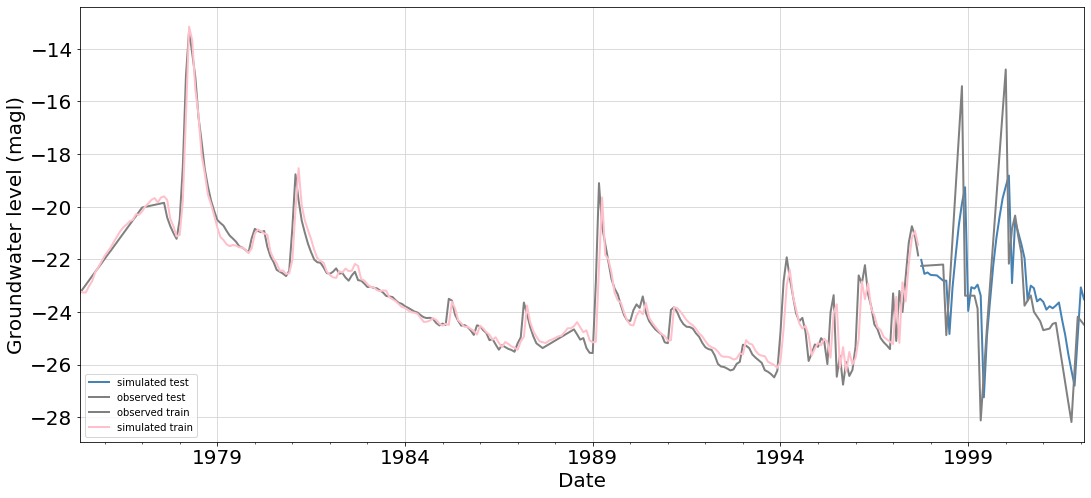

In [81]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0].values

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed train'],index =pima.iloc[0:269].index)
df2['simulated train'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed train'].plot(color='grey', linewidth=2)
out_df['simulated train'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [83]:
y_lstm = out_df['simulated test']

### GRU

In [82]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [84]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(53,6)

    #running function
    gwl =0.40812773
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 1.0131 - mean_squared_error: 1.0131
Epoch 00001: val_loss improved from inf to 1.63256, saving model to model.h5
269/269 [==============================] - 4s 16ms/sample - loss: 1.0811 - mean_squared_error: 1.0811 - val_loss: 1.6326 - val_mean_squared_error: 1.6326
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 1.1764 - mean_squared_error: 1.1764
Epoch 00002: val_loss improved from 1.63256 to 1.60749, saving model to model.h5
269/269 [==============================] - 0s 153us/sample - loss: 0.9468 - mean_squared_error: 0.9468 - val_loss: 1.6075 - val_mean_squared_error: 1.6075
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.7710 - mean_squared_error: 0.7710
Epoch 00003: val_loss improved from 1.60749 to 1.58685, saving model to model.h5
269/269 [==============================] - 0s 193us/sample 

Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2690 - mean_squared_error: 0.2690
Epoch 00025: val_loss improved from 1.36535 to 1.35248, saving model to model.h5
269/269 [==============================] - 0s 169us/sample - loss: 0.2344 - mean_squared_error: 0.2344 - val_loss: 1.3525 - val_mean_squared_error: 1.3525
Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1338 - mean_squared_error: 0.1338
Epoch 00026: val_loss improved from 1.35248 to 1.33753, saving model to model.h5
269/269 [==============================] - 0s 169us/sample - loss: 0.2198 - mean_squared_error: 0.2198 - val_loss: 1.3375 - val_mean_squared_error: 1.3375
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 00027: val_loss improved from 1.33753 to 1.32158, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.2327 - mean_squared_error: 0.2327 - val_loss: 1.321

Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 00049: val_loss improved from 0.97890 to 0.96514, saving model to model.h5
269/269 [==============================] - 0s 137us/sample - loss: 0.1469 - mean_squared_error: 0.1469 - val_loss: 0.9651 - val_mean_squared_error: 0.9651
Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2011 - mean_squared_error: 0.2011
Epoch 00050: val_loss improved from 0.96514 to 0.95416, saving model to model.h5
269/269 [==============================] - 0s 133us/sample - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 0.9542 - val_mean_squared_error: 0.9542
Epoch 51/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1750 - mean_squared_error: 0.1750
Epoch 00051: val_loss improved from 0.95416 to 0.94094, saving model to model.h5
269/269 [==============================] - 0s 135us/sample - loss: 0.1297 - mean_squared_error: 0.1297 - val_loss: 0.940

Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1188 - mean_squared_error: 0.1188
Epoch 00073: val_loss improved from 0.75959 to 0.75515, saving model to model.h5
269/269 [==============================] - 0s 173us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.7552 - val_mean_squared_error: 0.7552
Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1536 - mean_squared_error: 0.1536
Epoch 00074: val_loss improved from 0.75515 to 0.74979, saving model to model.h5
269/269 [==============================] - 0s 181us/sample - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.7498 - val_mean_squared_error: 0.7498
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1342 - mean_squared_error: 0.1342
Epoch 00075: val_loss improved from 0.74979 to 0.74576, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.745

Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00097: val_loss improved from 0.67079 to 0.66679, saving model to model.h5
269/269 [==============================] - 0s 138us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.6668 - val_mean_squared_error: 0.6668
Epoch 98/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 00098: val_loss did not improve from 0.66679
269/269 [==============================] - 0s 82us/sample - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.6671 - val_mean_squared_error: 0.6671
Epoch 99/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00099: val_loss improved from 0.66679 to 0.66366, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.6637 - val_mean_squared_error: 0.6

 96/269 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00121: val_loss improved from 0.62719 to 0.62600, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.6260 - val_mean_squared_error: 0.6260
Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 00122: val_loss did not improve from 0.62600
269/269 [==============================] - 0s 83us/sample - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.6266 - val_mean_squared_error: 0.6266
Epoch 123/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0943 - mean_squared_error: 0.0943
Epoch 00123: val_loss improved from 0.62600 to 0.62141, saving model to model.h5
269/269 [==============================] - 0s 194us/sample - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.6214 - val_mean_squared_error: 0.6214
Epoch 12

Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 00146: val_loss did not improve from 0.60037
269/269 [==============================] - 0s 115us/sample - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.6016 - val_mean_squared_error: 0.6016
Epoch 147/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00147: val_loss did not improve from 0.60037
269/269 [==============================] - 0s 104us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.6036 - val_mean_squared_error: 0.6036
Epoch 148/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0862 - mean_squared_error: 0.0862
Epoch 00148: val_loss did not improve from 0.60037
269/269 [==============================] - 0s 79us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.6013 - val_mean_squared_error: 0.6013
Epoch 149/1000
 96/269 [=========>...................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0671 - mean_squared_error: 0.0671
Epoch 00171: val_loss did not improve from 0.58696
269/269 [==============================] - 0s 82us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.5878 - val_mean_squared_error: 0.5878
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00172: val_loss did not improve from 0.58696
269/269 [==============================] - 0s 106us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.5883 - val_mean_squared_error: 0.5883
Epoch 173/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 00173: val_loss improved from 0.58696 to 0.58657, saving model to model.h5
269/269 [==============================] - 0s 136us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.5866 - val_mean_squared_error: 0.5866
Epoch 174/1000
 96/269 [=========>....

Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00197: val_loss did not improve from 0.58339
269/269 [==============================] - 0s 80us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.5865 - val_mean_squared_error: 0.5865
Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00198: val_loss improved from 0.58339 to 0.58176, saving model to model.h5
269/269 [==============================] - 0s 188us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.5818 - val_mean_squared_error: 0.5818
Epoch 199/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00199: val_loss improved from 0.58176 to 0.57988, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.5799 - val_mean_squared_error: 

Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00223: val_loss did not improve from 0.57925
269/269 [==============================] - 0s 97us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.5826 - val_mean_squared_error: 0.5826
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 00224: val_loss did not improve from 0.57925
269/269 [==============================] - 0s 82us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.5818 - val_mean_squared_error: 0.5818
Epoch 225/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 00225: val_loss did not improve from 0.57925
269/269 [==============================] - 0s 92us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.5830 - val_mean_squared_error: 0.5830
Epoch 226/1000
 96/269 [=========>....................]

Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00249: val_loss did not improve from 0.57825
269/269 [==============================] - 0s 66us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.5802 - val_mean_squared_error: 0.5802
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00250: val_loss did not improve from 0.57825
269/269 [==============================] - 0s 79us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.5806 - val_mean_squared_error: 0.5806
Epoch 251/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00251: val_loss did not improve from 0.57825
269/269 [==============================] - 0s 86us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.5820 - val_mean_squared_error: 0.5820
Epoch 252/1000
 96/269 [=========>....................]

Epoch 275/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 00275: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 88us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.5827 - val_mean_squared_error: 0.5827
Epoch 276/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00276: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 95us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.5810 - val_mean_squared_error: 0.5810
Epoch 277/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00277: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 96us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.5806 - val_mean_squared_error: 0.5806
Epoch 278/1000
 96/269 [=========>....................]

Epoch 301/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00301: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 139us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.5857 - val_mean_squared_error: 0.5857
Epoch 302/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0788 - mean_squared_error: 0.0788
Epoch 00302: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 115us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.5845 - val_mean_squared_error: 0.5845
Epoch 303/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00303: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 90us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.5825 - val_mean_squared_error: 0.5825
Epoch 304/1000
 96/269 [=========>...................

Epoch 327/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00327: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 81us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.5888 - val_mean_squared_error: 0.5888
Epoch 328/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00328: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 77us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.5920 - val_mean_squared_error: 0.5920
Epoch 329/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 00329: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 79us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.5904 - val_mean_squared_error: 0.5904
Epoch 330/1000
 96/269 [=========>....................]

 96/269 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00353: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 78us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.5863 - val_mean_squared_error: 0.5863
Epoch 354/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00354: val_loss did not improve from 0.57787
269/269 [==============================] - 0s 93us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.5873 - val_mean_squared_error: 0.5873
Running fold 2
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 4s - loss: 0.9119 - mean_squared_error: 0.9119
Epoch 00001: val_loss improved from inf to 1.74419, saving model to model.h5
269/269 [==============================] - 6s 21ms/sample - loss: 0.8654 - mean_squared_error: 0.8654 - val_loss: 1.7442 - val_mean

Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2083 - mean_squared_error: 0.2083
Epoch 00023: val_loss improved from 1.35584 to 1.33957, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.2526 - mean_squared_error: 0.2526 - val_loss: 1.3396 - val_mean_squared_error: 1.3396
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1357 - mean_squared_error: 0.1357
Epoch 00024: val_loss improved from 1.33957 to 1.31993, saving model to model.h5
269/269 [==============================] - 0s 138us/sample - loss: 0.2364 - mean_squared_error: 0.2364 - val_loss: 1.3199 - val_mean_squared_error: 1.3199
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2099 - mean_squared_error: 0.2099
Epoch 00025: val_loss improved from 1.31993 to 1.30123, saving model to model.h5
269/269 [==============================] - 0s 172us/sample - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 1.301

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2111 - mean_squared_error: 0.2111
Epoch 00047: val_loss improved from 1.01269 to 1.00568, saving model to model.h5
269/269 [==============================] - 0s 165us/sample - loss: 0.1464 - mean_squared_error: 0.1464 - val_loss: 1.0057 - val_mean_squared_error: 1.0057
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 00048: val_loss improved from 1.00568 to 0.99760, saving model to model.h5
269/269 [==============================] - 0s 174us/sample - loss: 0.1517 - mean_squared_error: 0.1517 - val_loss: 0.9976 - val_mean_squared_error: 0.9976
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1570 - mean_squared_error: 0.1570
Epoch 00049: val_loss improved from 0.99760 to 0.98562, saving model to model.h5
269/269 [==============================] - 0s 192us/sample - loss: 0.1429 - mean_squared_error: 0.1429 - val_loss: 0.985

Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00071: val_loss improved from 0.87067 to 0.86700, saving model to model.h5
269/269 [==============================] - 0s 185us/sample - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.8670 - val_mean_squared_error: 0.8670
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 00072: val_loss improved from 0.86700 to 0.85908, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.8591 - val_mean_squared_error: 0.8591
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1133 - mean_squared_error: 0.1133
Epoch 00073: val_loss improved from 0.85908 to 0.85738, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.857

 96/269 [=========>....................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00095: val_loss improved from 0.78780 to 0.78641, saving model to model.h5
269/269 [==============================] - 0s 211us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.7864 - val_mean_squared_error: 0.7864
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00096: val_loss improved from 0.78641 to 0.78092, saving model to model.h5
269/269 [==============================] - 0s 223us/sample - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.7809 - val_mean_squared_error: 0.7809
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1594 - mean_squared_error: 0.1594
Epoch 00097: val_loss improved from 0.78092 to 0.77814, saving model to model.h5
269/269 [==============================] - 0s 356us/sample - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.7781 - val_mean_s

Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00119: val_loss improved from 0.71967 to 0.71806, saving model to model.h5
269/269 [==============================] - 0s 187us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.7181 - val_mean_squared_error: 0.7181
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00120: val_loss improved from 0.71806 to 0.71424, saving model to model.h5
269/269 [==============================] - 0s 192us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.7142 - val_mean_squared_error: 0.7142
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00121: val_loss improved from 0.71424 to 0.71367, saving model to model.h5
269/269 [==============================] - 0s 203us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.

 96/269 [=========>....................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00143: val_loss improved from 0.66894 to 0.66627, saving model to model.h5
269/269 [==============================] - 0s 146us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.6663 - val_mean_squared_error: 0.6663
Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00144: val_loss improved from 0.66627 to 0.66382, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.6638 - val_mean_squared_error: 0.6638
Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 00145: val_loss improved from 0.66382 to 0.66379, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.6638 - val_mean

Epoch 168/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00168: val_loss improved from 0.64020 to 0.63713, saving model to model.h5
269/269 [==============================] - 0s 148us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.6371 - val_mean_squared_error: 0.6371
Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00169: val_loss improved from 0.63713 to 0.63456, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.6346 - val_mean_squared_error: 0.6346
Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0899 - mean_squared_error: 0.0899
Epoch 00170: val_loss did not improve from 0.63456
269/269 [==============================] - 0s 106us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.6347 - val_mean_squared_error:

Epoch 193/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00193: val_loss did not improve from 0.61867
269/269 [==============================] - 0s 98us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.6226 - val_mean_squared_error: 0.6226
Epoch 194/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00194: val_loss did not improve from 0.61867
269/269 [==============================] - 0s 103us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.6206 - val_mean_squared_error: 0.6206
Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00195: val_loss improved from 0.61867 to 0.61861, saving model to model.h5
269/269 [==============================] - 0s 192us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.6186 - val_mean_squared_error: 0.6186
Epoch 196/1000
 96/269 

 96/269 [=========>....................] - ETA: 0s - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 00218: val_loss did not improve from 0.60526
269/269 [==============================] - 0s 75us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.6071 - val_mean_squared_error: 0.6071
Epoch 219/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 00219: val_loss did not improve from 0.60526
269/269 [==============================] - 0s 119us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.6064 - val_mean_squared_error: 0.6064
Epoch 220/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00220: val_loss did not improve from 0.60526
269/269 [==============================] - 0s 114us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.6079 - val_mean_squared_error: 0.6079
Epoch 221/1000
 96/269 [=========>....................] - ETA: 0s - 

Epoch 244/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00244: val_loss did not improve from 0.60265
269/269 [==============================] - 0s 111us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.6047 - val_mean_squared_error: 0.6047
Epoch 245/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00245: val_loss did not improve from 0.60265
269/269 [==============================] - 0s 93us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.6044 - val_mean_squared_error: 0.6044
Epoch 246/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 00246: val_loss did not improve from 0.60265
269/269 [==============================] - 0s 128us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.6055 - val_mean_squared_error: 0.6055
Epoch 247/1000
 96/269 [=========>...................

Epoch 270/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00270: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 107us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.5992 - val_mean_squared_error: 0.5992
Epoch 271/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00271: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 137us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.5974 - val_mean_squared_error: 0.5974
Epoch 272/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 00272: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 79us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.6018 - val_mean_squared_error: 0.6018
Epoch 273/1000
 96/269 [=========>...................

Epoch 296/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00296: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 82us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.6029 - val_mean_squared_error: 0.6029
Epoch 297/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00297: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 76us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.5991 - val_mean_squared_error: 0.5991
Epoch 298/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00298: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 86us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.6007 - val_mean_squared_error: 0.6007
Epoch 299/1000
 96/269 [=========>....................]

Epoch 322/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 00322: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 92us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.6005 - val_mean_squared_error: 0.6005
Epoch 323/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00323: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 104us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.6031 - val_mean_squared_error: 0.6031
Epoch 324/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 00324: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 83us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.6011 - val_mean_squared_error: 0.6011
Epoch 325/1000
 96/269 [=========>....................

Epoch 348/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00348: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 79us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.6024 - val_mean_squared_error: 0.6024
Epoch 349/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00349: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 84us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.6035 - val_mean_squared_error: 0.6035
Epoch 350/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00350: val_loss did not improve from 0.59619
269/269 [==============================] - 0s 83us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.6025 - val_mean_squared_error: 0.6025
Epoch 351/1000
 96/269 [=========>....................]

 96/269 [=========>....................] - ETA: 0s - loss: 0.3554 - mean_squared_error: 0.3554
Epoch 00008: val_loss improved from 1.16364 to 1.14671, saving model to model.h5
269/269 [==============================] - 0s 169us/sample - loss: 0.2760 - mean_squared_error: 0.2760 - val_loss: 1.1467 - val_mean_squared_error: 1.1467
Epoch 9/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3252 - mean_squared_error: 0.3252
Epoch 00009: val_loss improved from 1.14671 to 1.12948, saving model to model.h5
269/269 [==============================] - 0s 151us/sample - loss: 0.2779 - mean_squared_error: 0.2779 - val_loss: 1.1295 - val_mean_squared_error: 1.1295
Epoch 10/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2244 - mean_squared_error: 0.2244
Epoch 00010: val_loss improved from 1.12948 to 1.11453, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 0.2410 - mean_squared_error: 0.2410 - val_loss: 1.1145 - val_mean_sq

Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1283 - mean_squared_error: 0.1283
Epoch 00032: val_loss improved from 0.86741 to 0.85822, saving model to model.h5
269/269 [==============================] - 0s 179us/sample - loss: 0.1314 - mean_squared_error: 0.1314 - val_loss: 0.8582 - val_mean_squared_error: 0.8582
Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00033: val_loss improved from 0.85822 to 0.84977, saving model to model.h5
269/269 [==============================] - 0s 150us/sample - loss: 0.1332 - mean_squared_error: 0.1332 - val_loss: 0.8498 - val_mean_squared_error: 0.8498
Epoch 34/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00034: val_loss improved from 0.84977 to 0.84427, saving model to model.h5
269/269 [==============================] - 0s 131us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.844

Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0884 - mean_squared_error: 0.0884
Epoch 00056: val_loss improved from 0.72948 to 0.72224, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.7222 - val_mean_squared_error: 0.7222
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 00057: val_loss improved from 0.72224 to 0.71762, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.7176 - val_mean_squared_error: 0.7176
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 00058: val_loss improved from 0.71762 to 0.71355, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.713

Epoch 80/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00080: val_loss did not improve from 0.66055
269/269 [==============================] - 0s 89us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.6606 - val_mean_squared_error: 0.6606
Epoch 81/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00081: val_loss improved from 0.66055 to 0.65539, saving model to model.h5
269/269 [==============================] - 0s 131us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.6554 - val_mean_squared_error: 0.6554
Epoch 82/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00082: val_loss did not improve from 0.65539
269/269 [==============================] - 0s 87us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.6560 - val_mean_squared_error: 0.6560
Epoch 83/1000
 96/269 [====

Epoch 105/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00105: val_loss did not improve from 0.62761
269/269 [==============================] - 0s 78us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.6282 - val_mean_squared_error: 0.6282
Epoch 106/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1208 - mean_squared_error: 0.1208
Epoch 00106: val_loss did not improve from 0.62761
269/269 [==============================] - 0s 102us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.6278 - val_mean_squared_error: 0.6278
Epoch 107/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 00107: val_loss did not improve from 0.62761
269/269 [==============================] - 0s 120us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.6286 - val_mean_squared_error: 0.6286
Epoch 108/1000
 96/269 [=========>...................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 00130: val_loss did not improve from 0.61394
269/269 [==============================] - 0s 125us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.6154 - val_mean_squared_error: 0.6154
Epoch 131/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00131: val_loss did not improve from 0.61394
269/269 [==============================] - 0s 107us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.6143 - val_mean_squared_error: 0.6143
Epoch 132/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00132: val_loss did not improve from 0.61394
269/269 [==============================] - 0s 71us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.6146 - val_mean_squared_error: 0.6146
Epoch 133/1000
 96/269 [=========>....................] - ETA: 0s - 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00155: val_loss did not improve from 0.60201
269/269 [==============================] - 0s 96us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.6034 - val_mean_squared_error: 0.6034
Epoch 156/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00156: val_loss did not improve from 0.60201
269/269 [==============================] - 0s 241us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.6046 - val_mean_squared_error: 0.6046
Epoch 157/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00157: val_loss did not improve from 0.60201
269/269 [==============================] - 0s 140us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.6051 - val_mean_squared_error: 0.6051
Epoch 158/1000
 96/269 [=========>....................] - ETA: 0s - 

Epoch 181/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00181: val_loss did not improve from 0.59604
269/269 [==============================] - 0s 80us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.5981 - val_mean_squared_error: 0.5981
Epoch 182/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00182: val_loss did not improve from 0.59604
269/269 [==============================] - 0s 84us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.5992 - val_mean_squared_error: 0.5992
Epoch 183/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00183: val_loss did not improve from 0.59604
269/269 [==============================] - 0s 77us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.6012 - val_mean_squared_error: 0.6012
Epoch 184/1000
 96/269 [=========>....................]

Epoch 207/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00207: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 88us/sample - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.6008 - val_mean_squared_error: 0.6008
Epoch 208/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00208: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 114us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 209/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00209: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 76us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.6008 - val_mean_squared_error: 0.6008
Epoch 210/1000
 96/269 [=========>....................

Epoch 233/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00233: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 78us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.6025 - val_mean_squared_error: 0.6025
Epoch 234/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00234: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 104us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.6032 - val_mean_squared_error: 0.6032
Epoch 235/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00235: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 82us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.6053 - val_mean_squared_error: 0.6053
Epoch 236/1000
 96/269 [=========>....................

Epoch 259/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00259: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 77us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.6040 - val_mean_squared_error: 0.6040
Epoch 260/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00260: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 112us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.6036 - val_mean_squared_error: 0.6036
Epoch 261/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00261: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 84us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.6041 - val_mean_squared_error: 0.6041
Epoch 262/1000
 96/269 [=========>....................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0891 - mean_squared_error: 0.0891
Epoch 00285: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 79us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.6056 - val_mean_squared_error: 0.6056
Epoch 286/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 00286: val_loss did not improve from 0.59361
269/269 [==============================] - 0s 73us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.6103 - val_mean_squared_error: 0.6103
Running fold 4
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 0.9258 - mean_squared_error: 0.9258
Epoch 00001: val_loss improved from inf to 1.52280, saving model to model.h5
269/269 [==============================] - 5s 17ms/sample - loss: 0.7731 - mean_squared_error: 0.7731 - val_loss: 1.5228 - val_mean

Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2454 - mean_squared_error: 0.2454
Epoch 00023: val_loss improved from 1.27907 to 1.26575, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.2037 - mean_squared_error: 0.2037 - val_loss: 1.2657 - val_mean_squared_error: 1.2657
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2312 - mean_squared_error: 0.2312
Epoch 00024: val_loss improved from 1.26575 to 1.25207, saving model to model.h5
269/269 [==============================] - 0s 132us/sample - loss: 0.1939 - mean_squared_error: 0.1939 - val_loss: 1.2521 - val_mean_squared_error: 1.2521
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2451 - mean_squared_error: 0.2451
Epoch 00025: val_loss improved from 1.25207 to 1.23803, saving model to model.h5
269/269 [==============================] - 0s 138us/sample - loss: 0.2039 - mean_squared_error: 0.2039 - val_loss: 1.238

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1352 - mean_squared_error: 0.1352
Epoch 00047: val_loss improved from 0.92998 to 0.91979, saving model to model.h5
269/269 [==============================] - 0s 149us/sample - loss: 0.1373 - mean_squared_error: 0.1373 - val_loss: 0.9198 - val_mean_squared_error: 0.9198
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1651 - mean_squared_error: 0.1651
Epoch 00048: val_loss improved from 0.91979 to 0.91030, saving model to model.h5
269/269 [==============================] - 0s 140us/sample - loss: 0.1434 - mean_squared_error: 0.1434 - val_loss: 0.9103 - val_mean_squared_error: 0.9103
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1341 - mean_squared_error: 0.1341
Epoch 00049: val_loss improved from 0.91030 to 0.90038, saving model to model.h5
269/269 [==============================] - 0s 135us/sample - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.900

Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00071: val_loss improved from 0.74791 to 0.74508, saving model to model.h5
269/269 [==============================] - 0s 137us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.7451 - val_mean_squared_error: 0.7451
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 00072: val_loss improved from 0.74508 to 0.74150, saving model to model.h5
269/269 [==============================] - 0s 133us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.7415 - val_mean_squared_error: 0.7415
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 00073: val_loss improved from 0.74150 to 0.73769, saving model to model.h5
269/269 [==============================] - 0s 133us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.737

Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 00095: val_loss improved from 0.67931 to 0.67453, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.6745 - val_mean_squared_error: 0.6745
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00096: val_loss improved from 0.67453 to 0.67407, saving model to model.h5
269/269 [==============================] - 0s 136us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.6741 - val_mean_squared_error: 0.6741
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 00097: val_loss improved from 0.67407 to 0.67237, saving model to model.h5
269/269 [==============================] - 0s 149us/sample - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.672

Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00119: val_loss improved from 0.62815 to 0.62550, saving model to model.h5
269/269 [==============================] - 0s 140us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.6255 - val_mean_squared_error: 0.6255
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1363 - mean_squared_error: 0.1363
Epoch 00120: val_loss improved from 0.62550 to 0.62520, saving model to model.h5
269/269 [==============================] - 0s 137us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.6252 - val_mean_squared_error: 0.6252
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00121: val_loss improved from 0.62520 to 0.62447, saving model to model.h5
269/269 [==============================] - 0s 141us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.

 96/269 [=========>....................] - ETA: 0s - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 00143: val_loss improved from 0.59897 to 0.59816, saving model to model.h5
269/269 [==============================] - 0s 148us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.5982 - val_mean_squared_error: 0.5982
Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00144: val_loss did not improve from 0.59816
269/269 [==============================] - 0s 92us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00145: val_loss did not improve from 0.59816
269/269 [==============================] - 0s 81us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.5983 - val_mean_squared_error: 0.5983
Epoch 146/1000
 96/269 [=========>.....

Epoch 168/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00168: val_loss improved from 0.58536 to 0.58500, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.5850 - val_mean_squared_error: 0.5850
Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00169: val_loss did not improve from 0.58500
269/269 [==============================] - 0s 84us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.5870 - val_mean_squared_error: 0.5870
Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00170: val_loss did not improve from 0.58500
269/269 [==============================] - 0s 82us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.5872 - val_mean_squared_error: 0.5872
Epoch 171/1000
 96/269 [

Epoch 194/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00194: val_loss did not improve from 0.57777
269/269 [==============================] - 0s 83us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.5801 - val_mean_squared_error: 0.5801
Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 00195: val_loss did not improve from 0.57777
269/269 [==============================] - 0s 76us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.5788 - val_mean_squared_error: 0.5788
Epoch 196/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00196: val_loss did not improve from 0.57777
269/269 [==============================] - 0s 110us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.5789 - val_mean_squared_error: 0.5789
Epoch 197/1000
 96/269 [=========>....................

Epoch 220/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0679 - mean_squared_error: 0.0679
Epoch 00220: val_loss did not improve from 0.57202
269/269 [==============================] - 0s 97us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.5748 - val_mean_squared_error: 0.5748
Epoch 221/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00221: val_loss did not improve from 0.57202
269/269 [==============================] - 0s 88us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.5724 - val_mean_squared_error: 0.5724
Epoch 222/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00222: val_loss improved from 0.57202 to 0.57071, saving model to model.h5
269/269 [==============================] - 0s 200us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.5707 - val_mean_squared_error: 0.5707
Epoch 223/1000
 96/269 [

Epoch 246/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00246: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 75us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.5708 - val_mean_squared_error: 0.5708
Epoch 247/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00247: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 77us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.5708 - val_mean_squared_error: 0.5708
Epoch 248/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00248: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 89us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.5730 - val_mean_squared_error: 0.5730
Epoch 249/1000
 96/269 [=========>....................]

Epoch 272/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00272: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 86us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.5774 - val_mean_squared_error: 0.5774
Epoch 273/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 00273: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 78us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.5784 - val_mean_squared_error: 0.5784
Epoch 274/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00274: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 82us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.5749 - val_mean_squared_error: 0.5749
Epoch 275/1000
 96/269 [=========>....................]

Epoch 298/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00298: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 87us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.5786 - val_mean_squared_error: 0.5786
Epoch 299/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00299: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 74us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.5780 - val_mean_squared_error: 0.5780
Epoch 300/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00300: val_loss did not improve from 0.57071
269/269 [==============================] - 0s 83us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.5795 - val_mean_squared_error: 0.5795
Epoch 301/1000
 96/269 [=========>....................]

Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6796 - mean_squared_error: 0.6796
Epoch 00002: val_loss improved from 1.46992 to 1.45358, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.4935 - mean_squared_error: 0.4935 - val_loss: 1.4536 - val_mean_squared_error: 1.4536
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4484 - mean_squared_error: 0.4484
Epoch 00003: val_loss improved from 1.45358 to 1.44185, saving model to model.h5
269/269 [==============================] - 0s 145us/sample - loss: 0.4191 - mean_squared_error: 0.4191 - val_loss: 1.4419 - val_mean_squared_error: 1.4419
Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3758 - mean_squared_error: 0.3758
Epoch 00004: val_loss improved from 1.44185 to 1.43362, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 0.3806 - mean_squared_error: 0.3806 - val_loss: 1.4336 -

Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1280 - mean_squared_error: 0.1280
Epoch 00026: val_loss improved from 1.14012 to 1.12085, saving model to model.h5
269/269 [==============================] - 0s 163us/sample - loss: 0.1709 - mean_squared_error: 0.1709 - val_loss: 1.1209 - val_mean_squared_error: 1.1209
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2259 - mean_squared_error: 0.2259
Epoch 00027: val_loss improved from 1.12085 to 1.10051, saving model to model.h5
269/269 [==============================] - 0s 166us/sample - loss: 0.1769 - mean_squared_error: 0.1769 - val_loss: 1.1005 - val_mean_squared_error: 1.1005
Epoch 28/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1364 - mean_squared_error: 0.1364
Epoch 00028: val_loss improved from 1.10051 to 1.08292, saving model to model.h5
269/269 [==============================] - 0s 137us/sample - loss: 0.1743 - mean_squared_error: 0.1743 - val_loss: 1.082

Epoch 50/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 00050: val_loss improved from 0.80376 to 0.79587, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.7959 - val_mean_squared_error: 0.7959
Epoch 51/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1138 - mean_squared_error: 0.1138
Epoch 00051: val_loss improved from 0.79587 to 0.78883, saving model to model.h5
269/269 [==============================] - 0s 152us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.7888 - val_mean_squared_error: 0.7888
Epoch 52/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 00052: val_loss improved from 0.78883 to 0.77971, saving model to model.h5
269/269 [==============================] - 0s 134us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.779

Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00074: val_loss improved from 0.68227 to 0.67701, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.6770 - val_mean_squared_error: 0.6770
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 00075: val_loss improved from 0.67701 to 0.67343, saving model to model.h5
269/269 [==============================] - 0s 135us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.6734 - val_mean_squared_error: 0.6734
Epoch 76/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1153 - mean_squared_error: 0.1153
Epoch 00076: val_loss improved from 0.67343 to 0.67210, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.672

Epoch 98/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 00098: val_loss improved from 0.62808 to 0.62648, saving model to model.h5
269/269 [==============================] - 0s 177us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.6265 - val_mean_squared_error: 0.6265
Epoch 99/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00099: val_loss did not improve from 0.62648
269/269 [==============================] - 0s 95us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.6269 - val_mean_squared_error: 0.6269
Epoch 100/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00100: val_loss improved from 0.62648 to 0.62520, saving model to model.h5
269/269 [==============================] - 0s 131us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.6252 - val_mean_squared_error: 0.

269/269 [==============================] - 0s 222us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.6048 - val_mean_squared_error: 0.6048
Epoch 123/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00123: val_loss did not improve from 0.60482
269/269 [==============================] - 0s 77us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.6065 - val_mean_squared_error: 0.6065
Epoch 124/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 00124: val_loss did not improve from 0.60482
269/269 [==============================] - 0s 71us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.6074 - val_mean_squared_error: 0.6074
Epoch 125/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00125: val_loss did not improve from 0.60482
269/269 [==============================] - 0s 80us/sam

Epoch 148/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00148: val_loss did not improve from 0.59008
269/269 [==============================] - 0s 85us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.5913 - val_mean_squared_error: 0.5913
Epoch 149/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00149: val_loss did not improve from 0.59008
269/269 [==============================] - 0s 82us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.5929 - val_mean_squared_error: 0.5929
Epoch 150/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00150: val_loss improved from 0.59008 to 0.58979, saving model to model.h5
269/269 [==============================] - 0s 136us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.5898 - val_mean_squared_error: 0.5898
Epoch 151/1000
 96/269 [

Epoch 174/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00174: val_loss improved from 0.58408 to 0.58259, saving model to model.h5
269/269 [==============================] - 0s 150us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.5826 - val_mean_squared_error: 0.5826
Epoch 175/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00175: val_loss did not improve from 0.58259
269/269 [==============================] - 0s 85us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.5842 - val_mean_squared_error: 0.5842
Epoch 176/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 00176: val_loss did not improve from 0.58259
269/269 [==============================] - 0s 74us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.5833 - val_mean_squared_error: 0.5833
Epoch 177/1000
 96/269 [

Epoch 200/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00200: val_loss did not improve from 0.58235
269/269 [==============================] - 0s 127us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.5857 - val_mean_squared_error: 0.5857
Epoch 201/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00201: val_loss improved from 0.58235 to 0.58229, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.5823 - val_mean_squared_error: 0.5823
Epoch 202/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00202: val_loss did not improve from 0.58229
269/269 [==============================] - 0s 73us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.5833 - val_mean_squared_error: 0.5833
Epoch 203/1000
 96/269 

Epoch 226/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00226: val_loss did not improve from 0.58049
269/269 [==============================] - 0s 81us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.5829 - val_mean_squared_error: 0.5829
Epoch 227/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00227: val_loss did not improve from 0.58049
269/269 [==============================] - 0s 74us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.5817 - val_mean_squared_error: 0.5817
Epoch 228/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00228: val_loss did not improve from 0.58049
269/269 [==============================] - 0s 95us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.5844 - val_mean_squared_error: 0.5844
Epoch 229/1000
 96/269 [=========>....................]

Epoch 252/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 00252: val_loss did not improve from 0.58049
269/269 [==============================] - 0s 77us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.5815 - val_mean_squared_error: 0.5815
Epoch 253/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00253: val_loss did not improve from 0.58049
269/269 [==============================] - 0s 78us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.5852 - val_mean_squared_error: 0.5852
Epoch 254/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00254: val_loss did not improve from 0.58049
269/269 [==============================] - 0s 84us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.5862 - val_mean_squared_error: 0.5862
Epoch 255/1000
 96/269 [=========>....................]

Epoch 278/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00278: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 77us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.5912 - val_mean_squared_error: 0.5912
Epoch 279/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00279: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 89us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.5875 - val_mean_squared_error: 0.5875
Epoch 280/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00280: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 80us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.5862 - val_mean_squared_error: 0.5862
Epoch 281/1000
 96/269 [=========>....................]

 96/269 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00304: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 170us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.5922 - val_mean_squared_error: 0.5922
Epoch 305/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00305: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 75us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.5909 - val_mean_squared_error: 0.5909
Epoch 306/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00306: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 81us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.5889 - val_mean_squared_error: 0.5889
Epoch 307/1000
 96/269 [=========>....................] - ETA: 0s - l

 96/269 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00330: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 87us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.6003 - val_mean_squared_error: 0.6003
Epoch 331/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00331: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 130us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.5994 - val_mean_squared_error: 0.5994
Epoch 332/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 00332: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 77us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 333/1000
 96/269 [=========>....................] - ETA: 0s - l

 96/269 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00356: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 75us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.5986 - val_mean_squared_error: 0.5986
Epoch 357/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00357: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 83us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.5995 - val_mean_squared_error: 0.5995
Epoch 358/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00358: val_loss did not improve from 0.58045
269/269 [==============================] - 0s 120us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5955 - val_mean_squared_error: 0.5955
Epoch 359/1000
 96/269 [=========>....................] - ETA: 0s - l

Epoch 17/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3816 - mean_squared_error: 0.3816
Epoch 00017: val_loss improved from 1.50631 to 1.48611, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.3969 - mean_squared_error: 0.3969 - val_loss: 1.4861 - val_mean_squared_error: 1.4861
Epoch 18/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3451 - mean_squared_error: 0.3451
Epoch 00018: val_loss improved from 1.48611 to 1.46636, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.3620 - mean_squared_error: 0.3620 - val_loss: 1.4664 - val_mean_squared_error: 1.4664
Epoch 19/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.4297 - mean_squared_error: 0.4297
Epoch 00019: val_loss improved from 1.46636 to 1.44824, saving model to model.h5
269/269 [==============================] - 0s 151us/sample - loss: 0.3340 - mean_squared_error: 0.3340 - val_loss: 1.448

Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2234 - mean_squared_error: 0.2234
Epoch 00041: val_loss improved from 1.06602 to 1.05165, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 1.0516 - val_mean_squared_error: 1.0516
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1797 - mean_squared_error: 0.1797
Epoch 00042: val_loss improved from 1.05165 to 1.03836, saving model to model.h5
269/269 [==============================] - 0s 141us/sample - loss: 0.1598 - mean_squared_error: 0.1598 - val_loss: 1.0384 - val_mean_squared_error: 1.0384
Epoch 43/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1380 - mean_squared_error: 0.1380
Epoch 00043: val_loss improved from 1.03836 to 1.02365, saving model to model.h5
269/269 [==============================] - 0s 147us/sample - loss: 0.1661 - mean_squared_error: 0.1661 - val_loss: 1.023

Epoch 65/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 00065: val_loss improved from 0.81678 to 0.81146, saving model to model.h5
269/269 [==============================] - 0s 170us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.8115 - val_mean_squared_error: 0.8115
Epoch 66/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00066: val_loss improved from 0.81146 to 0.80315, saving model to model.h5
269/269 [==============================] - 0s 163us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.8031 - val_mean_squared_error: 0.8031
Epoch 67/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1505 - mean_squared_error: 0.1505
Epoch 00067: val_loss improved from 0.80315 to 0.79512, saving model to model.h5
269/269 [==============================] - 0s 153us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.795

Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 00089: val_loss improved from 0.70903 to 0.70590, saving model to model.h5
269/269 [==============================] - 0s 156us/sample - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.7059 - val_mean_squared_error: 0.7059
Epoch 90/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 00090: val_loss improved from 0.70590 to 0.70379, saving model to model.h5
269/269 [==============================] - 0s 152us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.7038 - val_mean_squared_error: 0.7038
Epoch 91/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 00091: val_loss improved from 0.70379 to 0.69910, saving model to model.h5
269/269 [==============================] - 0s 167us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.699

Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00113: val_loss did not improve from 0.64787
269/269 [==============================] - 0s 77us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.6501 - val_mean_squared_error: 0.6501
Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00114: val_loss did not improve from 0.64787
269/269 [==============================] - 0s 76us/sample - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.6483 - val_mean_squared_error: 0.6483
Epoch 115/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00115: val_loss improved from 0.64787 to 0.64709, saving model to model.h5
269/269 [==============================] - 0s 174us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.6471 - val_mean_squared_error: 0.6471
Epoch 116/1000
 96/269 [

Epoch 138/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 00138: val_loss improved from 0.61795 to 0.61590, saving model to model.h5
269/269 [==============================] - 0s 153us/sample - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.6159 - val_mean_squared_error: 0.6159
Epoch 139/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00139: val_loss improved from 0.61590 to 0.61506, saving model to model.h5
269/269 [==============================] - 0s 164us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.6151 - val_mean_squared_error: 0.6151
Epoch 140/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 00140: val_loss improved from 0.61506 to 0.61400, saving model to model.h5
269/269 [==============================] - 0s 154us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.

269/269 [==============================] - 0s 142us/sample - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.5934 - val_mean_squared_error: 0.5934
Epoch 163/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00163: val_loss did not improve from 0.59339
269/269 [==============================] - 0s 84us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.5975 - val_mean_squared_error: 0.5975
Epoch 164/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00164: val_loss did not improve from 0.59339
269/269 [==============================] - 0s 71us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.5961 - val_mean_squared_error: 0.5961
Epoch 165/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00165: val_loss did not improve from 0.59339
269/269 [==============================] - 0s 79us/sam

Epoch 188/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00188: val_loss did not improve from 0.58715
269/269 [==============================] - 0s 67us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.5888 - val_mean_squared_error: 0.5888
Epoch 189/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00189: val_loss did not improve from 0.58715
269/269 [==============================] - 0s 81us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.5899 - val_mean_squared_error: 0.5899
Epoch 190/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00190: val_loss improved from 0.58715 to 0.58677, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.5868 - val_mean_squared_error: 0.5868
Epoch 191/1000
 96/269 [

Epoch 214/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00214: val_loss did not improve from 0.58478
269/269 [==============================] - 0s 96us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.5854 - val_mean_squared_error: 0.5854
Epoch 215/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00215: val_loss did not improve from 0.58478
269/269 [==============================] - 0s 72us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.5855 - val_mean_squared_error: 0.5855
Epoch 216/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00216: val_loss did not improve from 0.58478
269/269 [==============================] - 0s 74us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.5859 - val_mean_squared_error: 0.5859
Epoch 217/1000
 96/269 [=========>....................]

Epoch 240/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 00240: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 68us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.5864 - val_mean_squared_error: 0.5864
Epoch 241/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00241: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 71us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.5862 - val_mean_squared_error: 0.5862
Epoch 242/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00242: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 69us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.5849 - val_mean_squared_error: 0.5849
Epoch 243/1000
 96/269 [=========>....................]

 96/269 [=========>....................] - ETA: 0s - loss: 0.0966 - mean_squared_error: 0.0966
Epoch 00266: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 74us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.5931 - val_mean_squared_error: 0.5931
Epoch 267/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 00267: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 74us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.5879 - val_mean_squared_error: 0.5879
Epoch 268/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00268: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 71us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.5888 - val_mean_squared_error: 0.5888
Epoch 269/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 00292: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 90us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.5954 - val_mean_squared_error: 0.5954
Epoch 293/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00293: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 100us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.5942 - val_mean_squared_error: 0.5942
Epoch 294/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00294: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 84us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.5938 - val_mean_squared_error: 0.5938
Epoch 295/1000
 96/269 [=========>....................] - ETA: 0s - l

 96/269 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00318: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 71us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.6045 - val_mean_squared_error: 0.6045
Epoch 319/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 00319: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 79us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.6044 - val_mean_squared_error: 0.6044
Epoch 320/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00320: val_loss did not improve from 0.58240
269/269 [==============================] - 0s 71us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.6057 - val_mean_squared_error: 0.6057
Epoch 321/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 21/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00021: val_loss improved from 0.92083 to 0.90874, saving model to model.h5
269/269 [==============================] - 0s 200us/sample - loss: 0.1900 - mean_squared_error: 0.1900 - val_loss: 0.9087 - val_mean_squared_error: 0.9087
Epoch 22/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1813 - mean_squared_error: 0.1813
Epoch 00022: val_loss improved from 0.90874 to 0.89857, saving model to model.h5
269/269 [==============================] - 0s 156us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 0.8986 - val_mean_squared_error: 0.8986
Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1298 - mean_squared_error: 0.1298
Epoch 00023: val_loss improved from 0.89857 to 0.88812, saving model to model.h5
269/269 [==============================] - 0s 164us/sample - loss: 0.1852 - mean_squared_error: 0.1852 - val_loss: 0.888

Epoch 45/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1330 - mean_squared_error: 0.1330
Epoch 00045: val_loss improved from 0.71203 to 0.70838, saving model to model.h5
269/269 [==============================] - 0s 142us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.7084 - val_mean_squared_error: 0.7084
Epoch 46/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00046: val_loss improved from 0.70838 to 0.70462, saving model to model.h5
269/269 [==============================] - 0s 163us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.7046 - val_mean_squared_error: 0.7046
Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1451 - mean_squared_error: 0.1451
Epoch 00047: val_loss improved from 0.70462 to 0.69825, saving model to model.h5
269/269 [==============================] - 0s 136us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.698

Epoch 69/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1335 - mean_squared_error: 0.1335
Epoch 00069: val_loss did not improve from 0.62914
269/269 [==============================] - 0s 78us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.6298 - val_mean_squared_error: 0.6298
Epoch 70/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00070: val_loss improved from 0.62914 to 0.62820, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.6282 - val_mean_squared_error: 0.6282
Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00071: val_loss improved from 0.62820 to 0.62684, saving model to model.h5
269/269 [==============================] - 0s 135us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.6268 - val_mean_squared_error: 0.6

 96/269 [=========>....................] - ETA: 0s - loss: 0.1260 - mean_squared_error: 0.1260
Epoch 00093: val_loss improved from 0.59590 to 0.59576, saving model to model.h5
269/269 [==============================] - 0s 179us/sample - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.5958 - val_mean_squared_error: 0.5958
Epoch 94/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00094: val_loss improved from 0.59576 to 0.59399, saving model to model.h5
269/269 [==============================] - 0s 199us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1242 - mean_squared_error: 0.1242
Epoch 00095: val_loss improved from 0.59399 to 0.59362, saving model to model.h5
269/269 [==============================] - 0s 199us/sample - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.5936 - val_mean_s

Epoch 118/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00118: val_loss did not improve from 0.57774
269/269 [==============================] - 0s 75us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.5778 - val_mean_squared_error: 0.5778
Epoch 119/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00119: val_loss improved from 0.57774 to 0.57504, saving model to model.h5
269/269 [==============================] - 0s 138us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.5750 - val_mean_squared_error: 0.5750
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00120: val_loss did not improve from 0.57504
269/269 [==============================] - 0s 70us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.5761 - val_mean_squared_error: 0.5761
Epoch 121/1000
 96/269 [

 96/269 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00143: val_loss improved from 0.57035 to 0.56880, saving model to model.h5
269/269 [==============================] - 0s 129us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.5688 - val_mean_squared_error: 0.5688
Epoch 144/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 00144: val_loss did not improve from 0.56880
269/269 [==============================] - 0s 75us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.5706 - val_mean_squared_error: 0.5706
Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00145: val_loss improved from 0.56880 to 0.56846, saving model to model.h5
269/269 [==============================] - 0s 131us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.5685 - val_mean_squared_error: 0.5685
Epoch 14

Epoch 169/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00169: val_loss did not improve from 0.56723
269/269 [==============================] - 0s 76us/sample - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.5676 - val_mean_squared_error: 0.5676
Epoch 170/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 00170: val_loss did not improve from 0.56723
269/269 [==============================] - 0s 72us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.5708 - val_mean_squared_error: 0.5708
Epoch 171/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00171: val_loss did not improve from 0.56723
269/269 [==============================] - 0s 69us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.5695 - val_mean_squared_error: 0.5695
Epoch 172/1000
 96/269 [=========>....................]

Epoch 195/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00195: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 75us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.5679 - val_mean_squared_error: 0.5679
Epoch 196/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00196: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 69us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.5683 - val_mean_squared_error: 0.5683
Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00197: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 69us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.5652 - val_mean_squared_error: 0.5652
Epoch 198/1000
 96/269 [=========>....................]

 96/269 [=========>....................] - ETA: 0s - loss: 0.0786 - mean_squared_error: 0.0786
Epoch 00221: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 69us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.5681 - val_mean_squared_error: 0.5681
Epoch 222/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00222: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 83us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.5699 - val_mean_squared_error: 0.5699
Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00223: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 95us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.5677 - val_mean_squared_error: 0.5677
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0931 - mean_squared_error: 0.0931
Epoch 00247: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 71us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.5717 - val_mean_squared_error: 0.5717
Epoch 248/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 00248: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 77us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.5720 - val_mean_squared_error: 0.5720
Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00249: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 76us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.5691 - val_mean_squared_error: 0.5691
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00273: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 88us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.5728 - val_mean_squared_error: 0.5728
Epoch 274/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00274: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 86us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.5720 - val_mean_squared_error: 0.5720
Epoch 275/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 00275: val_loss did not improve from 0.56437
269/269 [==============================] - 0s 73us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.5710 - val_mean_squared_error: 0.5710
Epoch 276/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5335 - mean_squared_error: 0.5335
Epoch 00005: val_loss improved from 1.31643 to 1.30680, saving model to model.h5
269/269 [==============================] - 0s 130us/sample - loss: 0.3641 - mean_squared_error: 0.3641 - val_loss: 1.3068 - val_mean_squared_error: 1.3068
Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3053 - mean_squared_error: 0.3053
Epoch 00006: val_loss improved from 1.30680 to 1.29833, saving model to model.h5
269/269 [==============================] - 0s 161us/sample - loss: 0.3337 - mean_squared_error: 0.3337 - val_loss: 1.2983 - val_mean_squared_error: 1.2983
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3087 - mean_squared_error: 0.3087
Epoch 00007: val_loss improved from 1.29833 to 1.28835, saving model to model.h5
269/269 [==============================] - 0s 175us/sample - loss: 0.2867 - mean_squared_error: 0.2867 - val_loss: 1.2884 -

Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1586 - mean_squared_error: 0.1586
Epoch 00029: val_loss improved from 0.93741 to 0.92230, saving model to model.h5
269/269 [==============================] - 0s 166us/sample - loss: 0.1318 - mean_squared_error: 0.1318 - val_loss: 0.9223 - val_mean_squared_error: 0.9223
Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1450 - mean_squared_error: 0.1450
Epoch 00030: val_loss improved from 0.92230 to 0.90144, saving model to model.h5
269/269 [==============================] - 0s 130us/sample - loss: 0.1340 - mean_squared_error: 0.1340 - val_loss: 0.9014 - val_mean_squared_error: 0.9014
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1351 - mean_squared_error: 0.1351
Epoch 00031: val_loss improved from 0.90144 to 0.88418, saving model to model.h5
269/269 [==============================] - 0s 123us/sample - loss: 0.1282 - mean_squared_error: 0.1282 - val_loss: 0.884

Epoch 53/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00053: val_loss improved from 0.69132 to 0.68650, saving model to model.h5
269/269 [==============================] - 0s 145us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.6865 - val_mean_squared_error: 0.6865
Epoch 54/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00054: val_loss improved from 0.68650 to 0.68301, saving model to model.h5
269/269 [==============================] - 0s 140us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.6830 - val_mean_squared_error: 0.6830
Epoch 55/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00055: val_loss improved from 0.68301 to 0.67955, saving model to model.h5
269/269 [==============================] - 0s 134us/sample - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.679

 96/269 [=========>....................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00077: val_loss improved from 0.63215 to 0.62955, saving model to model.h5
269/269 [==============================] - 0s 155us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.6296 - val_mean_squared_error: 0.6296
Epoch 78/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00078: val_loss improved from 0.62955 to 0.62760, saving model to model.h5
269/269 [==============================] - 0s 210us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.6276 - val_mean_squared_error: 0.6276
Epoch 79/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00079: val_loss did not improve from 0.62760
269/269 [==============================] - 0s 87us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.6281 - val_mean_squared_error: 0.6281
Epoch 80/1

Epoch 102/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 00102: val_loss did not improve from 0.60526
269/269 [==============================] - 0s 109us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.6064 - val_mean_squared_error: 0.6064
Epoch 103/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00103: val_loss improved from 0.60526 to 0.60449, saving model to model.h5
269/269 [==============================] - 0s 236us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.6045 - val_mean_squared_error: 0.6045
Epoch 104/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0918 - mean_squared_error: 0.0918
Epoch 00104: val_loss improved from 0.60449 to 0.60349, saving model to model.h5
269/269 [==============================] - 0s 217us/sample - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.6035 - val_mean_squared_error:

Epoch 127/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 00127: val_loss did not improve from 0.59226
269/269 [==============================] - 0s 106us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.5934 - val_mean_squared_error: 0.5934
Epoch 128/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0985 - mean_squared_error: 0.0985
Epoch 00128: val_loss improved from 0.59226 to 0.59138, saving model to model.h5
269/269 [==============================] - 0s 260us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.5914 - val_mean_squared_error: 0.5914
Epoch 129/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0973 - mean_squared_error: 0.0973
Epoch 00129: val_loss improved from 0.59138 to 0.58923, saving model to model.h5
269/269 [==============================] - 0s 199us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.5892 - val_mean_squared_error:

Epoch 153/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00153: val_loss improved from 0.58411 to 0.58269, saving model to model.h5
269/269 [==============================] - 0s 245us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.5827 - val_mean_squared_error: 0.5827
Epoch 154/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00154: val_loss did not improve from 0.58269
269/269 [==============================] - 0s 107us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.5834 - val_mean_squared_error: 0.5834
Epoch 155/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00155: val_loss did not improve from 0.58269
269/269 [==============================] - 0s 101us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.5837 - val_mean_squared_error: 0.5837
Epoch 156/1000
 96/269

Epoch 179/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 00179: val_loss did not improve from 0.57952
269/269 [==============================] - 0s 322us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.5815 - val_mean_squared_error: 0.5815
Epoch 180/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 00180: val_loss did not improve from 0.57952
269/269 [==============================] - 0s 100us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.5819 - val_mean_squared_error: 0.5819
Epoch 181/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00181: val_loss did not improve from 0.57952
269/269 [==============================] - 0s 135us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.5795 - val_mean_squared_error: 0.5795
Epoch 182/1000
 96/269 [=========>..................

Epoch 205/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00205: val_loss did not improve from 0.57927
269/269 [==============================] - 0s 142us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.5795 - val_mean_squared_error: 0.5795
Epoch 206/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 00206: val_loss did not improve from 0.57927
269/269 [==============================] - 0s 119us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.5853 - val_mean_squared_error: 0.5853
Epoch 207/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00207: val_loss did not improve from 0.57927
269/269 [==============================] - 0s 168us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.5821 - val_mean_squared_error: 0.5821
Epoch 208/1000
 96/269 [=========>..................

Epoch 231/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1150 - mean_squared_error: 0.1150
Epoch 00231: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 126us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.5824 - val_mean_squared_error: 0.5824
Epoch 232/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00232: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 136us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.5845 - val_mean_squared_error: 0.5845
Epoch 233/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00233: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 136us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.5880 - val_mean_squared_error: 0.5880
Epoch 234/1000
 96/269 [=========>..................

Epoch 257/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00257: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 233us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.5861 - val_mean_squared_error: 0.5861
Epoch 258/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 00258: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 149us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.5910 - val_mean_squared_error: 0.5910
Epoch 259/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 00259: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 168us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.5844 - val_mean_squared_error: 0.5844
Epoch 260/1000
 96/269 [=========>..................

Epoch 283/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 00283: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 109us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.5889 - val_mean_squared_error: 0.5889
Epoch 284/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00284: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 88us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.5895 - val_mean_squared_error: 0.5895
Epoch 285/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00285: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 86us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.5910 - val_mean_squared_error: 0.5910
Epoch 286/1000
 96/269 [=========>....................

Epoch 309/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00309: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 79us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.5903 - val_mean_squared_error: 0.5903
Epoch 310/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00310: val_loss did not improve from 0.57848
269/269 [==============================] - 0s 86us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.5955 - val_mean_squared_error: 0.5955
Running fold 9
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 3s - loss: 1.9217 - mean_squared_error: 1.9217
Epoch 00001: val_loss improved from inf to 1.78925, saving model to model.h5
269/269 [==============================] - 6s 21ms/sample - loss: 1.9433 - mean_squared_error: 1.9433 - val_loss: 1.

Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3657 - mean_squared_error: 0.3657
Epoch 00023: val_loss improved from 1.35300 to 1.34093, saving model to model.h5
269/269 [==============================] - 0s 150us/sample - loss: 0.3305 - mean_squared_error: 0.3305 - val_loss: 1.3409 - val_mean_squared_error: 1.3409
Epoch 24/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3142 - mean_squared_error: 0.3142
Epoch 00024: val_loss improved from 1.34093 to 1.32870, saving model to model.h5
269/269 [==============================] - 0s 190us/sample - loss: 0.3310 - mean_squared_error: 0.3310 - val_loss: 1.3287 - val_mean_squared_error: 1.3287
Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3652 - mean_squared_error: 0.3652
Epoch 00025: val_loss improved from 1.32870 to 1.31797, saving model to model.h5
269/269 [==============================] - 0s 193us/sample - loss: 0.3056 - mean_squared_error: 0.3056 - val_loss: 1.318

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1600 - mean_squared_error: 0.1600
Epoch 00047: val_loss improved from 1.00451 to 0.99034, saving model to model.h5
269/269 [==============================] - 0s 149us/sample - loss: 0.1556 - mean_squared_error: 0.1556 - val_loss: 0.9903 - val_mean_squared_error: 0.9903
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2262 - mean_squared_error: 0.2262
Epoch 00048: val_loss improved from 0.99034 to 0.97422, saving model to model.h5
269/269 [==============================] - 0s 186us/sample - loss: 0.1558 - mean_squared_error: 0.1558 - val_loss: 0.9742 - val_mean_squared_error: 0.9742
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1260 - mean_squared_error: 0.1260
Epoch 00049: val_loss improved from 0.97422 to 0.96137, saving model to model.h5
269/269 [==============================] - 0s 139us/sample - loss: 0.1477 - mean_squared_error: 0.1477 - val_loss: 0.961

Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0862 - mean_squared_error: 0.0862
Epoch 00071: val_loss improved from 0.75998 to 0.75483, saving model to model.h5
269/269 [==============================] - 0s 272us/sample - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.7548 - val_mean_squared_error: 0.7548
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 00072: val_loss improved from 0.75483 to 0.74728, saving model to model.h5
269/269 [==============================] - 0s 146us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.7473 - val_mean_squared_error: 0.7473
Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00073: val_loss improved from 0.74728 to 0.74455, saving model to model.h5
269/269 [==============================] - 0s 140us/sample - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.744

Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00095: val_loss improved from 0.66846 to 0.66644, saving model to model.h5
269/269 [==============================] - 0s 143us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.6664 - val_mean_squared_error: 0.6664
Epoch 96/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1226 - mean_squared_error: 0.1226
Epoch 00096: val_loss improved from 0.66644 to 0.66602, saving model to model.h5
269/269 [==============================] - 0s 162us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.6660 - val_mean_squared_error: 0.6660
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1327 - mean_squared_error: 0.1327
Epoch 00097: val_loss did not improve from 0.66602
269/269 [==============================] - 0s 96us/sample - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.6675 - val_mean_squared_error: 0.6

269/269 [==============================] - 0s 144us/sample - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.6321 - val_mean_squared_error: 0.6321
Epoch 120/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00120: val_loss did not improve from 0.63213
269/269 [==============================] - 0s 88us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.6327 - val_mean_squared_error: 0.6327
Epoch 121/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1174 - mean_squared_error: 0.1174
Epoch 00121: val_loss did not improve from 0.63213
269/269 [==============================] - 0s 85us/sample - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.6338 - val_mean_squared_error: 0.6338
Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00122: val_loss improved from 0.63213 to 0.63147, saving model to model.h5
269/269 [===============

Epoch 145/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00145: val_loss improved from 0.61759 to 0.61738, saving model to model.h5
269/269 [==============================] - 0s 180us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.6174 - val_mean_squared_error: 0.6174
Epoch 146/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00146: val_loss did not improve from 0.61738
269/269 [==============================] - 0s 108us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.6199 - val_mean_squared_error: 0.6199
Epoch 147/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 00147: val_loss improved from 0.61738 to 0.61519, saving model to model.h5
269/269 [==============================] - 0s 173us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.6152 - val_mean_squared_error:

Epoch 171/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00171: val_loss did not improve from 0.60590
269/269 [==============================] - 0s 108us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.6092 - val_mean_squared_error: 0.6092
Epoch 172/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00172: val_loss improved from 0.60590 to 0.60544, saving model to model.h5
269/269 [==============================] - 0s 197us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.6054 - val_mean_squared_error: 0.6054
Epoch 173/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 00173: val_loss did not improve from 0.60544
269/269 [==============================] - 0s 133us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.6080 - val_mean_squared_error: 0.6080
Epoch 174/1000
 96/269

Epoch 197/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.1109
Epoch 00197: val_loss did not improve from 0.60150
269/269 [==============================] - 0s 85us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.6042 - val_mean_squared_error: 0.6042
Epoch 198/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00198: val_loss did not improve from 0.60150
269/269 [==============================] - 0s 76us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.6050 - val_mean_squared_error: 0.6050
Epoch 199/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00199: val_loss did not improve from 0.60150
269/269 [==============================] - 0s 77us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.6026 - val_mean_squared_error: 0.6026
Epoch 200/1000
 96/269 [=========>....................]

Epoch 223/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 00223: val_loss did not improve from 0.59964
269/269 [==============================] - 0s 82us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.6048 - val_mean_squared_error: 0.6048
Epoch 224/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00224: val_loss did not improve from 0.59964
269/269 [==============================] - 0s 79us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.6056 - val_mean_squared_error: 0.6056
Epoch 225/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 00225: val_loss did not improve from 0.59964
269/269 [==============================] - 0s 79us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.6090 - val_mean_squared_error: 0.6090
Epoch 226/1000
 96/269 [=========>....................]

Epoch 249/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 00249: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 83us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.6026 - val_mean_squared_error: 0.6026
Epoch 250/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00250: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 89us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.6040 - val_mean_squared_error: 0.6040
Epoch 251/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00251: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 86us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.6037 - val_mean_squared_error: 0.6037
Epoch 252/1000
 96/269 [=========>....................]

Epoch 275/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00275: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 81us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.6081 - val_mean_squared_error: 0.6081
Epoch 276/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00276: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 86us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.6051 - val_mean_squared_error: 0.6051
Epoch 277/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 00277: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 77us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.6050 - val_mean_squared_error: 0.6050
Epoch 278/1000
 96/269 [=========>....................]

Epoch 301/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00301: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 82us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.6133 - val_mean_squared_error: 0.6133
Epoch 302/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0533 - mean_squared_error: 0.0533
Epoch 00302: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 78us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.6094 - val_mean_squared_error: 0.6094
Epoch 303/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00303: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 75us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.6102 - val_mean_squared_error: 0.6102
Epoch 304/1000
 96/269 [=========>....................]

Epoch 327/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 00327: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 136us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.6168 - val_mean_squared_error: 0.6168
Epoch 328/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 00328: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 110us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.6170 - val_mean_squared_error: 0.6170
Epoch 329/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00329: val_loss did not improve from 0.59885
269/269 [==============================] - 0s 93us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.6146 - val_mean_squared_error: 0.6146
Epoch 330/1000
 96/269 [=========>...................

Epoch 14/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 00014: val_loss improved from 0.84991 to 0.83900, saving model to model.h5
269/269 [==============================] - 0s 187us/sample - loss: 0.1269 - mean_squared_error: 0.1269 - val_loss: 0.8390 - val_mean_squared_error: 0.8390
Epoch 15/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1434 - mean_squared_error: 0.1434
Epoch 00015: val_loss improved from 0.83900 to 0.83366, saving model to model.h5
269/269 [==============================] - 0s 146us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.8337 - val_mean_squared_error: 0.8337
Epoch 16/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00016: val_loss improved from 0.83366 to 0.82975, saving model to model.h5
269/269 [==============================] - 0s 159us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.829

Epoch 38/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 00038: val_loss improved from 0.72183 to 0.72084, saving model to model.h5
269/269 [==============================] - 0s 146us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.7208 - val_mean_squared_error: 0.7208
Epoch 39/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 00039: val_loss improved from 0.72084 to 0.72061, saving model to model.h5
269/269 [==============================] - 0s 145us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.7206 - val_mean_squared_error: 0.7206
Epoch 40/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1286 - mean_squared_error: 0.1286
Epoch 00040: val_loss improved from 0.72061 to 0.71519, saving model to model.h5
269/269 [==============================] - 0s 186us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.715

 96/269 [=========>....................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00062: val_loss did not improve from 0.65584
269/269 [==============================] - 0s 83us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.6573 - val_mean_squared_error: 0.6573
Epoch 63/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1203 - mean_squared_error: 0.1203
Epoch 00063: val_loss improved from 0.65584 to 0.65510, saving model to model.h5
269/269 [==============================] - 0s 167us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.6551 - val_mean_squared_error: 0.6551
Epoch 64/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 00064: val_loss did not improve from 0.65510
269/269 [==============================] - 0s 82us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.6555 - val_mean_squared_error: 0.6555
Epoch 65/1000
 96/269 [=========>........

Epoch 87/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00087: val_loss improved from 0.62555 to 0.62424, saving model to model.h5
269/269 [==============================] - 0s 217us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.6242 - val_mean_squared_error: 0.6242
Epoch 88/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00088: val_loss improved from 0.62424 to 0.62260, saving model to model.h5
269/269 [==============================] - 0s 170us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.6226 - val_mean_squared_error: 0.6226
Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 00089: val_loss did not improve from 0.62260
269/269 [==============================] - 0s 96us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.6246 - val_mean_squared_error: 0.6

Epoch 112/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0910 - mean_squared_error: 0.0910
Epoch 00112: val_loss did not improve from 0.60662
269/269 [==============================] - 0s 103us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.6081 - val_mean_squared_error: 0.6081
Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00113: val_loss did not improve from 0.60662
269/269 [==============================] - 0s 86us/sample - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.6084 - val_mean_squared_error: 0.6084
Epoch 114/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00114: val_loss did not improve from 0.60662
269/269 [==============================] - 0s 95us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.6100 - val_mean_squared_error: 0.6100
Epoch 115/1000
 96/269 [=========>....................

Epoch 137/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00137: val_loss did not improve from 0.59545
269/269 [==============================] - 0s 163us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.6017 - val_mean_squared_error: 0.6017
Epoch 138/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00138: val_loss did not improve from 0.59545
269/269 [==============================] - 0s 165us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.5972 - val_mean_squared_error: 0.5972
Epoch 139/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00139: val_loss did not improve from 0.59545
269/269 [==============================] - 0s 145us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.5990 - val_mean_squared_error: 0.5990
Epoch 140/1000
 96/269 [=========>..................

Epoch 163/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00163: val_loss improved from 0.59400 to 0.59353, saving model to model.h5
269/269 [==============================] - 0s 215us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.5935 - val_mean_squared_error: 0.5935
Epoch 164/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00164: val_loss improved from 0.59353 to 0.59176, saving model to model.h5
269/269 [==============================] - 0s 167us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.5918 - val_mean_squared_error: 0.5918
Epoch 165/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00165: val_loss improved from 0.59176 to 0.59137, saving model to model.h5
269/269 [==============================] - 0s 165us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.

Epoch 189/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00189: val_loss did not improve from 0.59094
269/269 [==============================] - 0s 96us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.5950 - val_mean_squared_error: 0.5950
Epoch 190/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00190: val_loss did not improve from 0.59094
269/269 [==============================] - 0s 93us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.5944 - val_mean_squared_error: 0.5944
Epoch 191/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00191: val_loss did not improve from 0.59094
269/269 [==============================] - 0s 87us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 192/1000
 96/269 [=========>....................]

Epoch 215/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00215: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 89us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.5927 - val_mean_squared_error: 0.5927
Epoch 216/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00216: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 195us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5913 - val_mean_squared_error: 0.5913
Epoch 217/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00217: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 216us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.5937 - val_mean_squared_error: 0.5937
Epoch 218/1000
 96/269 [=========>...................

Epoch 241/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00241: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 83us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.5932 - val_mean_squared_error: 0.5932
Epoch 242/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00242: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 92us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.5947 - val_mean_squared_error: 0.5947
Epoch 243/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 00243: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 90us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 244/1000
 96/269 [=========>....................]

Epoch 267/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00267: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 92us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.6018 - val_mean_squared_error: 0.6018
Epoch 268/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 00268: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 78us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.5979 - val_mean_squared_error: 0.5979
Epoch 269/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00269: val_loss did not improve from 0.58970
269/269 [==============================] - 0s 86us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.5957 - val_mean_squared_error: 0.5957
Epoch 270/1000
 96/269 [=========>....................]

In [85]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.590      0.768    0.598     0.555
1   Iteration_2     0.595      0.771    0.594     0.582
2   Iteration_3     0.596      0.772    0.594     0.570
3   Iteration_4     0.577      0.760    0.606     0.558
4   Iteration_5     0.587      0.766    0.600     0.569
5   Iteration_6     0.593      0.770    0.596     0.570
6   Iteration_7     0.571      0.756    0.611     0.555
7   Iteration_8     0.590      0.768    0.597     0.566
8   Iteration_9     0.607      0.779    0.586     0.579
9  Iteration_10     0.593      0.770    0.595     0.561

In [86]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0     -0.049438   -0.004718    0.006295   -0.013228    0.060664    0.041606   
1     -0.056920   -0.007948    0.041798    0.002433   -0.003109   -0.094052   
2     -0.020680    0.072863    0.010877    0.009191   -0.011666   -0.018841   
3      0.078949    0.135280    0.100905    0.097152    0.089003    0.078780   
4      0.161275    0.194975    0.174486    0.173238    0.169105    0.158903   
..          ...         ...         ...         ...         ...         ...   
264   -0.210547   -0.205656   -0.172392   -0.203191   -0.161296   -0.164956   
265    0.394908    0.406251    0.417894    0.382582    0.453223    0.424071   
266    0.868521    0.872617    0.850352    0.850916    0.891308    0.881701   
267    1.001899    1.019992    0.977970    1.008013    1.011910    1.026240   
268    0.771637    0.797231    0.755979    0.786465    0.779110    0.808165   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0     -0.131097    0.029947   -0.019375 -0.008816  0.053594  0.044778   
1     -0.012976   -0.028070   -0.001048 -0.017766  0.036558  0.018792   
2      0.002307    0.009766    0.058365  0.012465  0.030803  0.043268   
3      0.098818    0.100894    0.151205  0.103443  0.023059  0.126502   
4      0.177978    0.178736    0.228085  0.179642  0.019809  0.199451   
..          ...         ...         ...       ...       ...       ...   
264   -0.196093   -0.168942   -0.184168 -0.185249  0.017994 -0.167256   
265    0.395839    0.434380    0.411426  0.413397  0.020589  0.433986   
266    0.862409    0.886519    0.868325  0.870296  0.013674  0.883970   
267    1.017560    1.019122    1.010996  1.010411  0.013344  1.023755   
268    0.793221    0.787295    0.781356  0.784495  0.014251  0.798746   

          Min    actual  
0   -0.062410 -0.036610  
1   -0.054323  0.033931  
2   -0.018338  0.102196  
3    0.080384  0.172737  
4    0.159834  0.243277  
..        ...       ...  
264 -0.203243  0.213660  
265  0.392808  0.782959  
266  0.856623  1.051303  
267  0.997067  0.889445  
268  0.770245  0.578505  

[269 rows x 14 columns]

In [87]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0     0.517803    0.527700    0.504393    0.516289    0.534979    0.542728   
1     0.290998    0.282642    0.278523    0.293514    0.297072    0.313278   
2     0.313741    0.303700    0.303933    0.310358    0.329739    0.330982   
3     0.277653    0.265470    0.264129    0.274589    0.287823    0.293660   
4     0.273010    0.260699    0.259680    0.267773    0.284377    0.286922   
5     0.270299    0.257293    0.256460    0.265027    0.280906    0.283908   
6     0.233144    0.211446    0.217927    0.228226    0.241586    0.244706   
7     0.195157    0.168752    0.178545    0.187575    0.201166    0.202473   
8     0.193984    0.172126    0.175757    0.182510    0.198257    0.198619   
9    -0.726976   -0.783142   -0.728481   -0.724749   -0.715044   -0.717885   
10    0.065767    0.062003    0.077979    0.031381    0.101333    0.067670   
11    0.623025    0.604203    0.587029    0.597520    0.610188    0.608010   
12    1.083967    1.114370    1.072538    1.090012    1.094149    1.086920   
13    1.412746    1.488387    1.411691    1.453563    1.441610    1.433592   
14    1.677526    1.767658    1.645794    1.722525    1.688089    1.689924   
15   -0.301293   -0.317545   -0.321838   -0.319766   -0.336588   -0.304855   
16    0.011178    0.055694    0.042256    0.025298    0.073408    0.044247   
17    0.000633    0.066364    0.031379    0.011569    0.041045    0.035361   
18    0.041328    0.140300    0.097430    0.067501    0.102161    0.088822   
19   -0.129062   -0.019634   -0.065732   -0.121553   -0.078896   -0.085265   
20   -1.667458   -1.725804   -1.661897   -1.725935   -1.698385   -1.675430   
21   -0.847548   -0.769711   -0.638087   -0.750142   -0.750188   -0.751935   
22   -0.228730   -0.139079   -0.180398   -0.220857   -0.179513   -0.193934   
23    0.326495    0.440632    0.392211    0.384030    0.405484    0.385373   
24    0.743071    0.892640    0.849147    0.854020    0.872165    0.837390   
25    1.073554    1.238133    1.201091    1.213782    1.226019    1.184156   
26    1.383887    1.554698    1.497038    1.540268    1.534035    1.498481   
27    1.574099    1.782554    1.637650    1.747799    1.706476    1.724405   
28    1.821137    1.963847    1.785974    1.938923    1.866207    1.908315   
29    0.093462    0.255194    0.197669    0.120402    0.142959    0.186267   
30    1.080020    1.135144    1.064911    1.084114    1.131596    1.132236   
31    0.893527    1.060763    0.968484    0.972627    0.971834    1.020051   
32    0.700631    0.831550    0.746235    0.742394    0.768063    0.793211   
33    0.498686    0.605944    0.526606    0.528517    0.549369    0.574963   
34   -0.189472   -0.124136   -0.174771   -0.181331   -0.151665   -0.150710   
35    0.013234    0.100148    0.072227    0.028670    0.091583    0.082303   
36    0.001838    0.083120    0.031527    0.021601    0.057733    0.056103   
37   -0.232490   -0.137357   -0.179024   -0.205198   -0.162771   -0.173775   
38   -0.216300   -0.092878   -0.132805   -0.180491   -0.126153   -0.140007   
39   -0.269663   -0.134246   -0.179428   -0.231882   -0.175691   -0.188754   
40   -0.397790   -0.268080   -0.298289   -0.359391   -0.302102   -0.315648   
41   -0.353259   -0.219486   -0.243642   -0.312651   -0.249549   -0.263625   
42   -0.373670   -0.255825   -0.281036   -0.335633   -0.279148   -0.293367   
43   -0.324233   -0.222250   -0.242733   -0.289630   -0.234217   -0.249253   
44   -0.280825   -0.167159   -0.190230   -0.249737   -0.186722   -0.198876   
45   -0.566832   -0.448915   -0.447291   -0.528943   -0.466836   -0.474649   
46   -0.829933   -0.720723   -0.664940   -0.773228   -0.711682   -0.711747   
47   -1.136814   -1.075266   -0.962414   -1.061024   -1.021847   -1.014012   
48   -1.384639   -1.371229   -1.189603   -1.297917   -1.280850   -1.253927   
49   -1.590975   -1.627102   -1.403514   -1.508277   -1.521746   -1.473925   
50   -0.859245   -0.783689

In [88]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:269]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[269:322]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.062
Root mean squared error is: 0.248
Mean absolute error is: 0.148
R^2 score is:  0.932

The model performance for the test set
--------------------------------------
R^2 score is:  0.598
Mean squared error is: 0.59
Root mean squared error is: 0.768
Mean absolute error is: 0.566
Stdv    0.018
dtype: float32


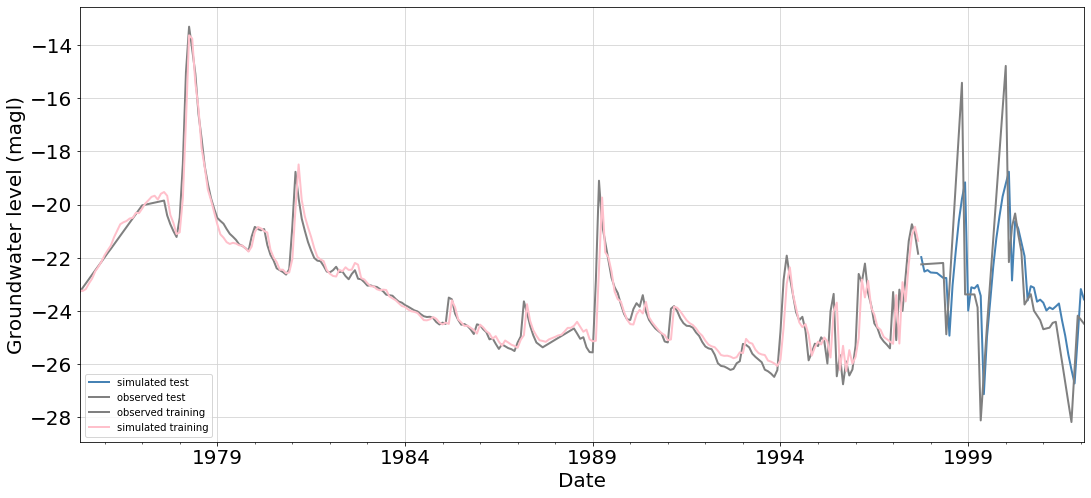

In [89]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0]

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [90]:
y_gru = out_df['simulated test']

### FFNN

In [91]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(53,6)

    #running function
    gwl =0.40812773
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(269, 6)
Train on 269 samples, validate on 53 samples
Epoch 1/1000
 96/269 [=========>....................] - ETA: 4s - loss: 1.2190 - mean_squared_error: 1.2190
Epoch 00001: val_loss improved from inf to 1.44354, saving model to model.h5
269/269 [==============================] - 8s 28ms/sample - loss: 0.9784 - mean_squared_error: 0.9784 - val_loss: 1.4435 - val_mean_squared_error: 1.4435
Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5899 - mean_squared_error: 0.5899
Epoch 00002: val_loss improved from 1.44354 to 1.35329, saving model to model.h5
269/269 [==============================] - 0s 177us/sample - loss: 0.8308 - mean_squared_error: 0.8308 - val_loss: 1.3533 - val_mean_squared_error: 1.3533
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.6934 - mean_squared_error: 0.6934
Epoch 00003: val_loss improved from 1.35329 to 1.27222, saving model to model.h5
269/269 [==============================] - 0s 173us/sample 

Epoch 25/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 00025: val_loss improved from 0.63242 to 0.62219, saving model to model.h5
269/269 [==============================] - 0s 208us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.6222 - val_mean_squared_error: 0.6222
Epoch 26/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 00026: val_loss improved from 0.62219 to 0.61169, saving model to model.h5
269/269 [==============================] - 0s 170us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.6117 - val_mean_squared_error: 0.6117
Epoch 27/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00027: val_loss did not improve from 0.61169
269/269 [==============================] - 0s 89us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.6124 - val_mean_squared_error: 0.6

269/269 [==============================] - 0s 215us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.5748 - val_mean_squared_error: 0.5748
Epoch 51/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00051: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 112us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.5774 - val_mean_squared_error: 0.5774
Epoch 52/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00052: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 78us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.5888 - val_mean_squared_error: 0.5888
Epoch 53/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00053: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 78us/sampl

Epoch 77/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00077: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 83us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.5939 - val_mean_squared_error: 0.5939
Epoch 78/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00078: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 78us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5924 - val_mean_squared_error: 0.5924
Epoch 79/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 00079: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 89us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.5893 - val_mean_squared_error: 0.5893
Epoch 80/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00103: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 79us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.5830 - val_mean_squared_error: 0.5830
Epoch 104/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00104: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 83us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.5952 - val_mean_squared_error: 0.5952
Epoch 105/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 00105: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 90us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.5777 - val_mean_squared_error: 0.5777
Epoch 106/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00129: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 84us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.5961 - val_mean_squared_error: 0.5961
Epoch 130/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 00130: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 84us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.5868 - val_mean_squared_error: 0.5868
Epoch 131/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00131: val_loss did not improve from 0.57482
269/269 [==============================] - 0s 84us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.5906 - val_mean_squared_error: 0.5906
Epoch 132/1000
 96/269 [=========>....................] - ETA: 0s - lo

269/269 [==============================] - 0s 289us/sample - loss: 0.3905 - mean_squared_error: 0.3905 - val_loss: 0.9588 - val_mean_squared_error: 0.9588
Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.3224 - mean_squared_error: 0.3224
Epoch 00005: val_loss improved from 0.95881 to 0.85638, saving model to model.h5
269/269 [==============================] - 0s 300us/sample - loss: 0.2756 - mean_squared_error: 0.2756 - val_loss: 0.8564 - val_mean_squared_error: 0.8564
Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 00006: val_loss improved from 0.85638 to 0.77869, saving model to model.h5
269/269 [==============================] - 0s 292us/sample - loss: 0.1765 - mean_squared_error: 0.1765 - val_loss: 0.7787 - val_mean_squared_error: 0.7787
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157
Epoch 00007: val_loss improved from 0.77869 to 0.

Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0884 - mean_squared_error: 0.0884
Epoch 00029: val_loss did not improve from 0.56853
269/269 [==============================] - 0s 117us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.5744 - val_mean_squared_error: 0.5744
Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 00030: val_loss did not improve from 0.56853
269/269 [==============================] - 0s 102us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.5833 - val_mean_squared_error: 0.5833
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00031: val_loss did not improve from 0.56853
269/269 [==============================] - 0s 91us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.5687 - val_mean_squared_error: 0.5687
Epoch 32/1000
 96/269 [=========>....................] -

Epoch 55/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00055: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 96us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5904 - val_mean_squared_error: 0.5904
Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00056: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 95us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.5798 - val_mean_squared_error: 0.5798
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0981 - mean_squared_error: 0.0981
Epoch 00057: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 88us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.5906 - val_mean_squared_error: 0.5906
Epoch 58/1000
 96/269 [=========>....................] - E

 96/269 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00081: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 118us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 82/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 00082: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 92us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.5874 - val_mean_squared_error: 0.5874
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 00083: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 92us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.5782 - val_mean_squared_error: 0.5782
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss

 96/269 [=========>....................] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00107: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 99us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.5801 - val_mean_squared_error: 0.5801
Epoch 108/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00108: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 92us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.5944 - val_mean_squared_error: 0.5944
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00109: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 104us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.6033 - val_mean_squared_error: 0.6033
Epoch 110/1000
 96/269 [=========>....................] - ETA: 0s - l

 96/269 [=========>....................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00133: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 180us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.6149 - val_mean_squared_error: 0.6149
Epoch 134/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00134: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 109us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.6176 - val_mean_squared_error: 0.6176
Epoch 135/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0683 - mean_squared_error: 0.0683
Epoch 00135: val_loss did not improve from 0.56341
269/269 [==============================] - 0s 194us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.5917 - val_mean_squared_error: 0.5917
Epoch 136/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 21/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 00021: val_loss did not improve from 0.56646
269/269 [==============================] - 0s 134us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.6181 - val_mean_squared_error: 0.6181
Epoch 22/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0892 - mean_squared_error: 0.0892
Epoch 00022: val_loss did not improve from 0.56646
269/269 [==============================] - 0s 91us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.5795 - val_mean_squared_error: 0.5795
Epoch 23/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00023: val_loss did not improve from 0.56646
269/269 [==============================] - 0s 93us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.5702 - val_mean_squared_error: 0.5702
Epoch 24/1000
 96/269 [=========>....................] - 

Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00047: val_loss did not improve from 0.56190
269/269 [==============================] - 0s 109us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.5961 - val_mean_squared_error: 0.5961
Epoch 48/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00048: val_loss did not improve from 0.56190
269/269 [==============================] - 0s 96us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.6087 - val_mean_squared_error: 0.6087
Epoch 49/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 00049: val_loss did not improve from 0.56190
269/269 [==============================] - 0s 98us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.5669 - val_mean_squared_error: 0.5669
Epoch 50/1000
 96/269 [=========>....................] - 

Epoch 73/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00073: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 101us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.5995 - val_mean_squared_error: 0.5995
Epoch 74/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00074: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 91us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.5755 - val_mean_squared_error: 0.5755
Epoch 75/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00075: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 106us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.5733 - val_mean_squared_error: 0.5733
Epoch 76/1000
 96/269 [=========>....................] -

 96/269 [=========>....................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00099: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 96us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.5871 - val_mean_squared_error: 0.5871
Epoch 100/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00100: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 103us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.6041 - val_mean_squared_error: 0.6041
Epoch 101/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00101: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 123us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 102/1000
 96/269 [=========>....................] - ETA: 0s - 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00125: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 104us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.6351 - val_mean_squared_error: 0.6351
Epoch 126/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00126: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 98us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.6009 - val_mean_squared_error: 0.6009
Epoch 127/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0803 - mean_squared_error: 0.0803
Epoch 00127: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 119us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.6014 - val_mean_squared_error: 0.6014
Epoch 128/1000
 96/269 [=========>....................] - ETA: 0s - 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 00151: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 93us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.6057 - val_mean_squared_error: 0.6057
Epoch 152/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 00152: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 106us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.6153 - val_mean_squared_error: 0.6153
Epoch 153/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0865 - mean_squared_error: 0.0865
Epoch 00153: val_loss did not improve from 0.55836
269/269 [==============================] - 0s 147us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.6085 - val_mean_squared_error: 0.6085
Epoch 154/1000
 96/269 [=========>....................] - ETA: 0s - 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00018: val_loss did not improve from 0.55884
269/269 [==============================] - 0s 104us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.5941 - val_mean_squared_error: 0.5941
Epoch 19/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00019: val_loss did not improve from 0.55884
269/269 [==============================] - 0s 99us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.6174 - val_mean_squared_error: 0.6174
Epoch 20/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00020: val_loss did not improve from 0.55884
269/269 [==============================] - 0s 104us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.5939 - val_mean_squared_error: 0.5939
Epoch 21/1000
 96/269 [=========>....................] - ETA: 0s - los

 96/269 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00044: val_loss did not improve from 0.55884
269/269 [==============================] - 0s 99us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.5930 - val_mean_squared_error: 0.5930
Epoch 45/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 00045: val_loss did not improve from 0.55884
269/269 [==============================] - 0s 100us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.6117 - val_mean_squared_error: 0.6117
Epoch 46/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00046: val_loss did not improve from 0.55884
269/269 [==============================] - 0s 122us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.6284 - val_mean_squared_error: 0.6284
Epoch 47/1000
 96/269 [=========>....................] - ETA: 0s - los

Epoch 70/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00070: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 108us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.6555 - val_mean_squared_error: 0.6555
Epoch 71/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00071: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 105us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.6271 - val_mean_squared_error: 0.6271
Epoch 72/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00072: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 109us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.5990 - val_mean_squared_error: 0.5990
Epoch 73/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00096: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 184us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.6348 - val_mean_squared_error: 0.6348
Epoch 97/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00097: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 146us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.5713 - val_mean_squared_error: 0.5713
Epoch 98/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 00098: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 133us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.5859 - val_mean_squared_error: 0.5859
Epoch 99/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 122/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00122: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 213us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.6274 - val_mean_squared_error: 0.6274
Epoch 123/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00123: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 139us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.6175 - val_mean_squared_error: 0.6175
Epoch 124/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00124: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 106us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.6015 - val_mean_squared_error: 0.6015
Epoch 125/1000
 96/269 [=========>..................

Epoch 148/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00148: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 109us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.6600 - val_mean_squared_error: 0.6600
Epoch 149/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00149: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 105us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.6380 - val_mean_squared_error: 0.6380
Epoch 150/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00150: val_loss did not improve from 0.55659
269/269 [==============================] - 0s 107us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.6180 - val_mean_squared_error: 0.6180
Epoch 151/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00006: val_loss improved from 0.62638 to 0.60509, saving model to model.h5
269/269 [==============================] - 0s 395us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.6051 - val_mean_squared_error: 0.6051
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00007: val_loss did not improve from 0.60509
269/269 [==============================] - 0s 112us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.6506 - val_mean_squared_error: 0.6506
Epoch 8/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00008: val_loss did not improve from 0.60509
269/269 [==============================] - 0s 142us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.6261 - val_mean_squared_error: 0.6261
Epoch 9/1000
 96/269 [=========>.........

Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00032: val_loss did not improve from 0.56757
269/269 [==============================] - 0s 124us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.6155 - val_mean_squared_error: 0.6155
Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00033: val_loss did not improve from 0.56757
269/269 [==============================] - 0s 105us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.6390 - val_mean_squared_error: 0.6390
Epoch 34/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00034: val_loss did not improve from 0.56757
269/269 [==============================] - 0s 108us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.6040 - val_mean_squared_error: 0.6040
Epoch 35/1000
 96/269 [=========>....................] 

Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1216 - mean_squared_error: 0.1216
Epoch 00058: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 121us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.6175 - val_mean_squared_error: 0.6175
Epoch 59/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00059: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 113us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.6471 - val_mean_squared_error: 0.6471
Epoch 60/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 00060: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 105us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.6255 - val_mean_squared_error: 0.6255
Epoch 61/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00084: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 150us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.6210 - val_mean_squared_error: 0.6210
Epoch 85/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00085: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 140us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.5769 - val_mean_squared_error: 0.5769
Epoch 86/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0981 - mean_squared_error: 0.0981
Epoch 00086: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 122us/sample - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.6309 - val_mean_squared_error: 0.6309
Epoch 87/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00110: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 126us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.6472 - val_mean_squared_error: 0.6472
Epoch 111/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00111: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 110us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.5898 - val_mean_squared_error: 0.5898
Epoch 112/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00112: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 111us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.6182 - val_mean_squared_error: 0.6182
Epoch 113/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 136/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00136: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 104us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.6229 - val_mean_squared_error: 0.6229
Epoch 137/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00137: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 110us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.6134 - val_mean_squared_error: 0.6134
Epoch 138/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00138: val_loss did not improve from 0.56662
269/269 [==============================] - 0s 110us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.6014 - val_mean_squared_error: 0.6014
Epoch 139/1000
 96/269 [=========>..................

269/269 [==============================] - 0s 435us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.6464 - val_mean_squared_error: 0.6464
Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1076 - mean_squared_error: 0.1076
Epoch 00005: val_loss improved from 0.64637 to 0.62317, saving model to model.h5
269/269 [==============================] - 0s 461us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.6232 - val_mean_squared_error: 0.6232
Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 00006: val_loss improved from 0.62317 to 0.61950, saving model to model.h5
269/269 [==============================] - 0s 451us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.6195 - val_mean_squared_error: 0.6195
Epoch 7/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00007: val_loss did not improve from 0.6195

 96/269 [=========>....................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00030: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 119us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.6177 - val_mean_squared_error: 0.6177
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00031: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 111us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.6339 - val_mean_squared_error: 0.6339
Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00032: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 118us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.5982 - val_mean_squared_error: 0.5982
Epoch 33/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00056: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 119us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.6342 - val_mean_squared_error: 0.6342
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00057: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 118us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.5852 - val_mean_squared_error: 0.5852
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00058: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 115us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.6475 - val_mean_squared_error: 0.6475
Epoch 59/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00082: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 118us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.6450 - val_mean_squared_error: 0.6450
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00083: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 119us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.6227 - val_mean_squared_error: 0.6227
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0563 - mean_squared_error: 0.0563
Epoch 00084: val_loss did not improve from 0.58312
269/269 [==============================] - 0s 123us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.6202 - val_mean_squared_error: 0.6202
Epoch 85/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 108/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 00108: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 125us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.6153 - val_mean_squared_error: 0.6153
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 00109: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 131us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.6789 - val_mean_squared_error: 0.6789
Epoch 110/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00110: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 122us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.6417 - val_mean_squared_error: 0.6417
Epoch 111/1000
 96/269 [=========>..................

Epoch 134/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00134: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 116us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.6756 - val_mean_squared_error: 0.6756
Epoch 135/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00135: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 112us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.6611 - val_mean_squared_error: 0.6611
Epoch 136/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00136: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 113us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.6494 - val_mean_squared_error: 0.6494
Epoch 137/1000
 96/269 [=========>..................

Epoch 160/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00160: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 118us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.6446 - val_mean_squared_error: 0.6446
Epoch 161/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00161: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 115us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.6532 - val_mean_squared_error: 0.6532
Epoch 162/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00162: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 153us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.6534 - val_mean_squared_error: 0.6534
Epoch 163/1000
 96/269 [=========>..................

Epoch 186/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00186: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 117us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.6277 - val_mean_squared_error: 0.6277
Epoch 187/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 00187: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 113us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.6715 - val_mean_squared_error: 0.6715
Epoch 188/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 00188: val_loss did not improve from 0.56863
269/269 [==============================] - 0s 117us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.6216 - val_mean_squared_error: 0.6216
Epoch 189/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00014: val_loss did not improve from 0.62082
269/269 [==============================] - 0s 121us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.6774 - val_mean_squared_error: 0.6774
Epoch 15/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00015: val_loss did not improve from 0.62082
269/269 [==============================] - 0s 156us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.6559 - val_mean_squared_error: 0.6559
Epoch 16/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00016: val_loss improved from 0.62082 to 0.58778, saving model to model.h5
269/269 [==============================] - 0s 493us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.5878 - val_mean_squared_error: 0.5878
Epoch 17/1000
 96/269 [=========>......

Epoch 40/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00040: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 155us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.6621 - val_mean_squared_error: 0.6621
Epoch 41/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00041: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 126us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.6302 - val_mean_squared_error: 0.6302
Epoch 42/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00042: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 125us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.6640 - val_mean_squared_error: 0.6640
Epoch 43/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 00066: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 122us/sample - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.6689 - val_mean_squared_error: 0.6689
Epoch 67/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 00067: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 125us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.6563 - val_mean_squared_error: 0.6563
Epoch 68/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00068: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 126us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.6751 - val_mean_squared_error: 0.6751
Epoch 69/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00092: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 126us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.6545 - val_mean_squared_error: 0.6545
Epoch 93/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00093: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 134us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.6621 - val_mean_squared_error: 0.6621
Epoch 94/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 00094: val_loss did not improve from 0.58778
269/269 [==============================] - 0s 123us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.6434 - val_mean_squared_error: 0.6434
Epoch 95/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 2/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.5354 - mean_squared_error: 0.5354
Epoch 00002: val_loss improved from 1.21855 to 0.85162, saving model to model.h5
269/269 [==============================] - 0s 572us/sample - loss: 0.4328 - mean_squared_error: 0.4328 - val_loss: 0.8516 - val_mean_squared_error: 0.8516
Epoch 3/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.2388 - mean_squared_error: 0.2388
Epoch 00003: val_loss improved from 0.85162 to 0.74016, saving model to model.h5
269/269 [==============================] - 0s 595us/sample - loss: 0.2120 - mean_squared_error: 0.2120 - val_loss: 0.7402 - val_mean_squared_error: 0.7402
Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 00004: val_loss improved from 0.74016 to 0.65188, saving model to model.h5
269/269 [==============================] - 0s 541us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.6519 -

Epoch 28/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00028: val_loss did not improve from 0.61762
269/269 [==============================] - 0s 193us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.6930 - val_mean_squared_error: 0.6930
Epoch 29/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00029: val_loss did not improve from 0.61762
269/269 [==============================] - 0s 189us/sample - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.6895 - val_mean_squared_error: 0.6895
Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00030: val_loss did not improve from 0.61762
269/269 [==============================] - 0s 144us/sample - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.6951 - val_mean_squared_error: 0.6951
Epoch 31/1000
 96/269 [=========>....................] 

Epoch 54/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00054: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 145us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.7180 - val_mean_squared_error: 0.7180
Epoch 55/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00055: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 133us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.6838 - val_mean_squared_error: 0.6838
Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00056: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 129us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.6853 - val_mean_squared_error: 0.6853
Epoch 57/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 00080: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 126us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.7470 - val_mean_squared_error: 0.7470
Epoch 81/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 00081: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 132us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.6775 - val_mean_squared_error: 0.6775
Epoch 82/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00082: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 139us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.6343 - val_mean_squared_error: 0.6343
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 00106: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 134us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.6637 - val_mean_squared_error: 0.6637
Epoch 107/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0784 - mean_squared_error: 0.0784
Epoch 00107: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 164us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.7522 - val_mean_squared_error: 0.7522
Epoch 108/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 00108: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 132us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.7089 - val_mean_squared_error: 0.7089
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 132/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 00132: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 133us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.7199 - val_mean_squared_error: 0.7199
Epoch 133/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 00133: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 141us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.6531 - val_mean_squared_error: 0.6531
Epoch 134/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0863 - mean_squared_error: 0.0863
Epoch 00134: val_loss did not improve from 0.60623
269/269 [==============================] - 0s 161us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.7243 - val_mean_squared_error: 0.7243
Epoch 135/1000
 96/269 [=========>..................

 96/269 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00009: val_loss improved from 0.68845 to 0.64553, saving model to model.h5
269/269 [==============================] - 0s 572us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.6455 - val_mean_squared_error: 0.6455
Epoch 10/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0758 - mean_squared_error: 0.0758
Epoch 00010: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 159us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.6567 - val_mean_squared_error: 0.6567
Epoch 11/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00011: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 140us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.7202 - val_mean_squared_error: 0.7202
Epoch 12/1000
 96/269 [=========>......

Epoch 35/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00035: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 139us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.6981 - val_mean_squared_error: 0.6981
Epoch 36/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00036: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 141us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.7044 - val_mean_squared_error: 0.7044
Epoch 37/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00037: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 139us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.8003 - val_mean_squared_error: 0.8003
Epoch 38/1000
 96/269 [=========>....................] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00061: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 161us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.6561 - val_mean_squared_error: 0.6561
Epoch 62/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00062: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 139us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.6754 - val_mean_squared_error: 0.6754
Epoch 63/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00063: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 139us/sample - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.7175 - val_mean_squared_error: 0.7175
Epoch 64/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 00087: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 144us/sample - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.6961 - val_mean_squared_error: 0.6961
Epoch 88/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 00088: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 146us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.6844 - val_mean_squared_error: 0.6844
Epoch 89/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00089: val_loss did not improve from 0.64553
269/269 [==============================] - 0s 136us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.6940 - val_mean_squared_error: 0.6940
Epoch 90/1000
 96/269 [=========>....................] - ETA: 0s - lo

Epoch 4/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1216 - mean_squared_error: 0.1216
Epoch 00004: val_loss did not improve from 0.67657
269/269 [==============================] - 0s 148us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.6983 - val_mean_squared_error: 0.6983
Epoch 5/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00005: val_loss did not improve from 0.67657
269/269 [==============================] - 0s 145us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.7539 - val_mean_squared_error: 0.7539
Epoch 6/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00006: val_loss did not improve from 0.67657
269/269 [==============================] - 0s 151us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.7808 - val_mean_squared_error: 0.7808
Epoch 7/1000
 96/269 [=========>....................] - ET

Epoch 30/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 00030: val_loss did not improve from 0.64842
269/269 [==============================] - 0s 241us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.7031 - val_mean_squared_error: 0.7031
Epoch 31/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00031: val_loss did not improve from 0.64842
269/269 [==============================] - 0s 220us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.6866 - val_mean_squared_error: 0.6866
Epoch 32/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00032: val_loss did not improve from 0.64842
269/269 [==============================] - 0s 306us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.7620 - val_mean_squared_error: 0.7620
Epoch 33/1000
 96/269 [=========>....................] 

Epoch 56/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00056: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 238us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.7108 - val_mean_squared_error: 0.7108
Epoch 57/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0803 - mean_squared_error: 0.0803
Epoch 00057: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 276us/sample - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.7030 - val_mean_squared_error: 0.7030
Epoch 58/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00058: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 277us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.6873 - val_mean_squared_error: 0.6873
Epoch 59/1000
192/269 [====================>.........] 

 96/269 [=========>....................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00082: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 149us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.7758 - val_mean_squared_error: 0.7758
Epoch 83/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00083: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 163us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.7005 - val_mean_squared_error: 0.7005
Epoch 84/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00084: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 179us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.6887 - val_mean_squared_error: 0.6887
Epoch 85/1000
 96/269 [=========>....................] - ETA: 0s - lo

 96/269 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00108: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 158us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.7778 - val_mean_squared_error: 0.7778
Epoch 109/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 00109: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 180us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.7587 - val_mean_squared_error: 0.7587
Epoch 110/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00110: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 151us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.7172 - val_mean_squared_error: 0.7172
Epoch 111/1000
 96/269 [=========>....................] - ETA: 0s -

Epoch 134/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00134: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 180us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.7307 - val_mean_squared_error: 0.7307
Epoch 135/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00135: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 152us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.7145 - val_mean_squared_error: 0.7145
Epoch 136/1000
 96/269 [=========>....................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00136: val_loss did not improve from 0.64546
269/269 [==============================] - 0s 158us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.6947 - val_mean_squared_error: 0.6947
Epoch 137/1000
 96/269 [=========>..................

In [92]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.589    0.768  0.598   0.553
1   Iteration_2   0.593    0.770  0.596   0.555
2   Iteration_3   0.615    0.784  0.580   0.565
3   Iteration_4   0.616    0.785  0.580   0.565
4   Iteration_5   0.577    0.760  0.606   0.558
5   Iteration_6   0.609    0.780  0.585   0.572
6   Iteration_7   0.648    0.805  0.558   0.588
7   Iteration_8   0.624    0.790  0.574   0.587
8   Iteration_9   0.647    0.804  0.559   0.604
9  Iteration_10   0.671    0.819  0.542   0.610

In [93]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0     -0.055747   -0.005690    0.047838   -0.052391   -0.072149   -0.017436   
1      0.023140    0.007526   -0.062211    0.018855    0.008969    0.015814   
2      0.016445   -0.046930   -0.132788   -0.024621   -0.102599   -0.017211   
3      0.152471    0.090933   -0.003453    0.079916    0.051926    0.113078   
4      0.233790    0.180033    0.079714    0.170586    0.144689    0.191045   
..          ...         ...         ...         ...         ...         ...   
264   -0.230834   -0.245227   -0.273719   -0.233620   -0.249685   -0.208062   
265    0.443482    0.442236    0.419286    0.471411    0.583563    0.562823   
266    0.842399    0.842523    0.782791    0.846395    1.018628    0.962920   
267    0.952998    0.943904    0.862016    0.921309    1.104962    1.032720   
268    0.742783    0.721679    0.653078    0.709734    0.857070    0.814623   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0     -0.050581    0.026346   -0.068633 -0.027605  0.040535  0.012930   
1     -0.015717    0.000526   -0.026987 -0.003343  0.025870  0.022527   
2     -0.106464   -0.021553   -0.062566 -0.055365  0.046738 -0.008627   
3      0.018035    0.068942    0.045788  0.068626  0.044952  0.113578   
4      0.089748    0.146693    0.123189  0.151054  0.046368  0.197422   
..          ...         ...         ...       ...       ...       ...   
264   -0.258289   -0.198285   -0.239121 -0.237427  0.022158 -0.215269   
265    0.442472    0.527732    0.495817  0.487647  0.055293  0.542939   
266    0.783948    0.911735    0.848712  0.871117  0.074530  0.945647   
267    0.851125    0.989161    0.912124  0.952257  0.076132  1.028389   
268    0.672442    0.805385    0.750013  0.747423  0.063712  0.811135   

          Min    actual  
0   -0.068140 -0.036610  
1   -0.029213  0.033931  
2   -0.102104  0.102196  
3    0.023674  0.172737  
4    0.104686  0.243277  
..        ...       ...  
264 -0.259585  0.213660  
265  0.432354  0.782959  
266  0.796587  1.051303  
267  0.876125  0.889445  
268  0.683711  0.578505  

[269 rows x 14 columns]

In [94]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0     0.522935    0.501363    0.454186    0.496145    0.603192    0.565474   
1     0.296739    0.273309    0.223091    0.238260    0.254421    0.255312   
2     0.326059    0.306458    0.261590    0.282648    0.328547    0.302800   
3     0.288320    0.265993    0.214717    0.228920    0.255295    0.247496   
4     0.285521    0.264235    0.214787    0.229429    0.260454    0.245988   
5     0.282440    0.260664    0.210096    0.223597    0.251786    0.240790   
6     0.242055    0.219827    0.164132    0.170211    0.189654    0.186990   
7     0.202605    0.179628    0.120710    0.120009    0.132134    0.136273   
8     0.204823    0.182857    0.125992    0.126652    0.140747    0.141585   
9    -0.746702   -0.734633   -0.776908   -0.679982   -0.715700   -0.607119   
10    0.121959    0.119147    0.092221    0.072303    0.109528    0.095380   
11    0.600348    0.573137    0.520252    0.552596    0.632948    0.585617   
12    1.042481    1.001602    0.895687    0.901174    1.016157    0.941141   
13    1.382491    1.314779    1.167334    1.158407    1.288191    1.168653   
14    1.643331    1.546367    1.359778    1.328399    1.455724    1.301612   
15   -0.381707   -0.385106   -0.389808   -0.315604   -0.321709   -0.248855   
16    0.054385    0.073706    0.049355    0.055946    0.098899    0.108671   
17   -0.018091   -0.024818   -0.052027   -0.002541    0.003860    0.042451   
18    0.066725    0.077698    0.057924    0.074124    0.134226    0.152487   
19   -0.161468   -0.164319   -0.176861   -0.144217   -0.143042   -0.099305   
20   -1.657639   -1.658593   -1.790647   -1.674787   -1.807054   -1.669483   
21   -0.811761   -0.781474   -0.723528   -0.636812   -0.528980   -0.447955   
22   -0.227243   -0.204851   -0.211462   -0.184789   -0.196545   -0.162856   
23    0.390109    0.405206    0.407600    0.465470    0.634408    0.638642   
24    0.761604    0.767487    0.722576    0.765482    0.875594    0.850267   
25    1.075206    1.070305    0.996737    1.030944    1.208421    1.149342   
26    1.362939    1.336786    1.224392    1.243200    1.413064    1.323820   
27    1.539314    1.489312    1.352035    1.353960    1.535937    1.420705   
28    1.756711    1.678575    1.502501    1.485790    1.654825    1.500800   
29    0.104446    0.081894    0.062651    0.099843    0.135762    0.212613   
30    1.036516    1.060580    1.004302    1.056390    1.274962    1.178418   
31    0.895022    0.872546    0.810536    0.851119    0.969823    0.957338   
32    0.702986    0.695028    0.658098    0.706286    0.835657    0.818890   
33    0.508028    0.492273    0.463620    0.498306    0.585576    0.582535   
34   -0.255490   -0.262381   -0.277288   -0.236662   -0.249812   -0.182831   
35    0.034542    0.051377    0.036938    0.059440    0.120980    0.138428   
36   -0.022447   -0.025587   -0.052142   -0.007770    0.004646    0.059233   
37   -0.251521   -0.246454   -0.249433   -0.218812   -0.206312   -0.159280   
38   -0.220481   -0.210482   -0.214040   -0.176179   -0.144895   -0.093185   
39   -0.280183   -0.273913   -0.275061   -0.233615   -0.225185   -0.168719   
40   -0.407331   -0.405361   -0.410407   -0.348064   -0.336797   -0.279737   
41   -0.351167   -0.340561   -0.337255   -0.290058   -0.281422   -0.226396   
42   -0.376779   -0.371921   -0.375377   -0.318724   -0.312410   -0.257733   
43   -0.323039   -0.312152   -0.313200   -0.272164   -0.268077   -0.214559   
44   -0.285141   -0.279839   -0.283299   -0.242615   -0.231034   -0.177081   
45   -0.590957   -0.603483   -0.641801   -0.558693   -0.571083   -0.485883   
46   -0.835659   -0.843015   -0.886127   -0.804561   -0.826221   -0.723002   
47   -1.106198   -1.105566   -1.160103   -1.072098   -1.119828   -1.002160   
48   -1.296773   -1.287624   -1.356595   -1.259889   -1.319629   -1.194167   
49   -1.465326   -1.448718   -1.532351   -1.427368   -1.502582   -1.368326   
50   -0.802505   -0.780936

In [95]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:269]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[269:322]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.058
Root mean squared error is: 0.24
Mean absolute error is: 0.158
R^2 score is:  0.936

The model performance for the test set
--------------------------------------
R^2 score is:  0.578
Mean squared error is: 0.619
Root mean squared error is: 0.786
Mean absolute error is: 0.576
Stdv    0.018
dtype: float32


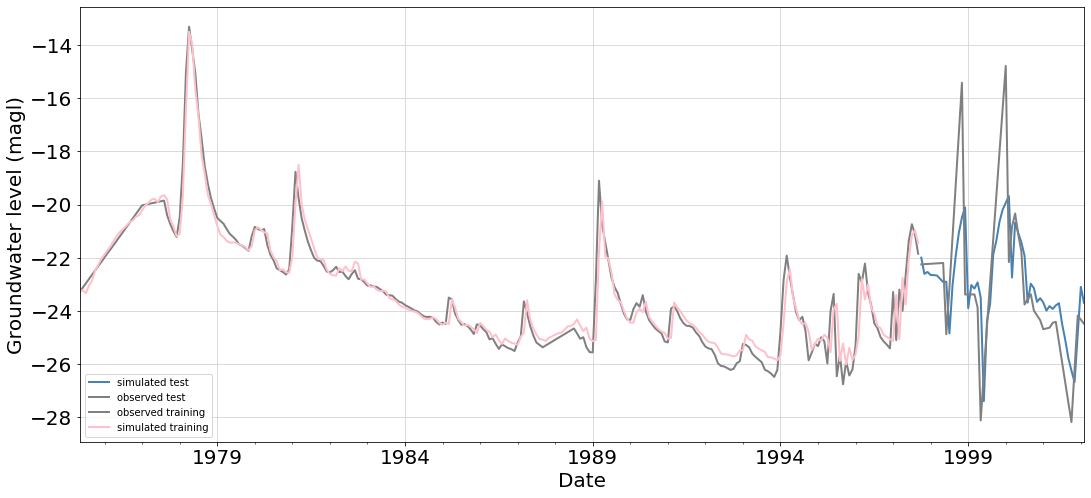

In [96]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0]

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [97]:
y_ff = out_df['simulated test']

## Static Models

In [98]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0066']]

In [99]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0066'].values
y = y.reshape(-1,1)

In [100]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(269, 6) (269, 1)
(53, 6) (53, 1)


In [101]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [102]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)
Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)
Running fold 9
(269, 6)
Running fold 10
(269, 6)


In [103]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   6.473    2.544  0.199   1.852
1   Iteration_2   4.235    2.058  0.476   1.732
2   Iteration_3   3.590    1.895  0.556   1.496
3   Iteration_4   4.432    2.105  0.451   1.745
4   Iteration_5   3.735    1.933  0.538   1.402
5   Iteration_6   4.696    2.167  0.419   1.735
6   Iteration_7   4.183    2.045  0.482   1.723
7   Iteration_8   4.232    2.057  0.476   1.732
8   Iteration_9   6.426    2.535  0.205   1.844
9  Iteration_10   4.433    2.105  0.451   1.688

In [104]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [105]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.425
Mean squared error is: 4.644
Root mean squared error is: 2.144
Mean absolute error is: 1.695


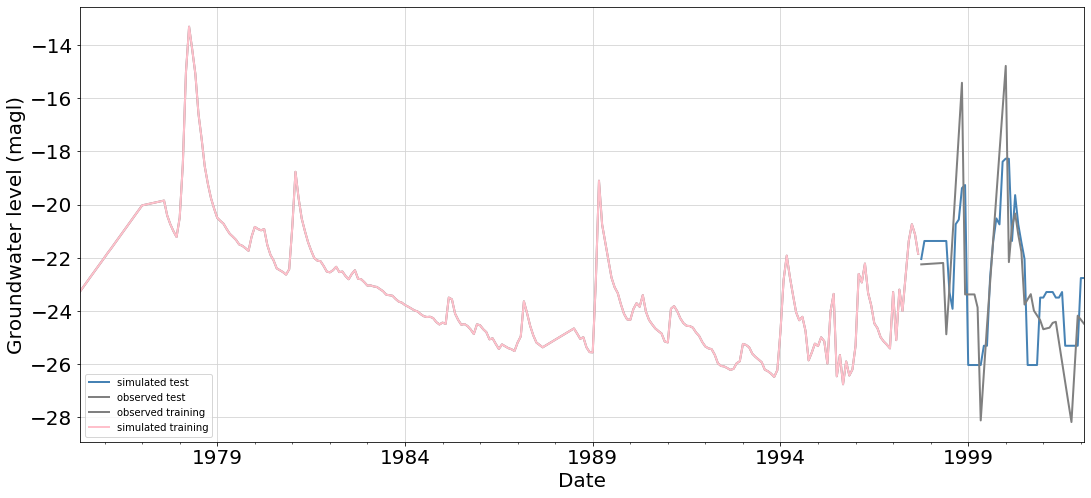

In [106]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0]

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [107]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)
Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)
Running fold 9
(269, 6)
Running fold 10
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [108]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    3.443     1.856   0.574    1.266
1   Iteration_2    3.443     1.856   0.574    1.266
2   Iteration_3    3.443     1.856   0.574    1.266
3   Iteration_4    3.443     1.856   0.574    1.266
4   Iteration_5    3.443     1.856   0.574    1.266
5   Iteration_6    3.443     1.856   0.574    1.266
6   Iteration_7    3.443     1.856   0.574    1.266
7   Iteration_8    3.443     1.856   0.574    1.266
8   Iteration_9    3.443     1.856   0.574    1.266
9  Iteration_10    3.443     1.856   0.574    1.266

In [109]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [110]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.783
Root mean squared error is: 0.885
Mean absolute error is: 0.368
R^2 score is:  0.843

The model performance for the test set
--------------------------------------
R^2 score is:  0.574
Mean squared error is: 3.443
Root mean squared error is: 1.856
Mean absolute error is: 1.266


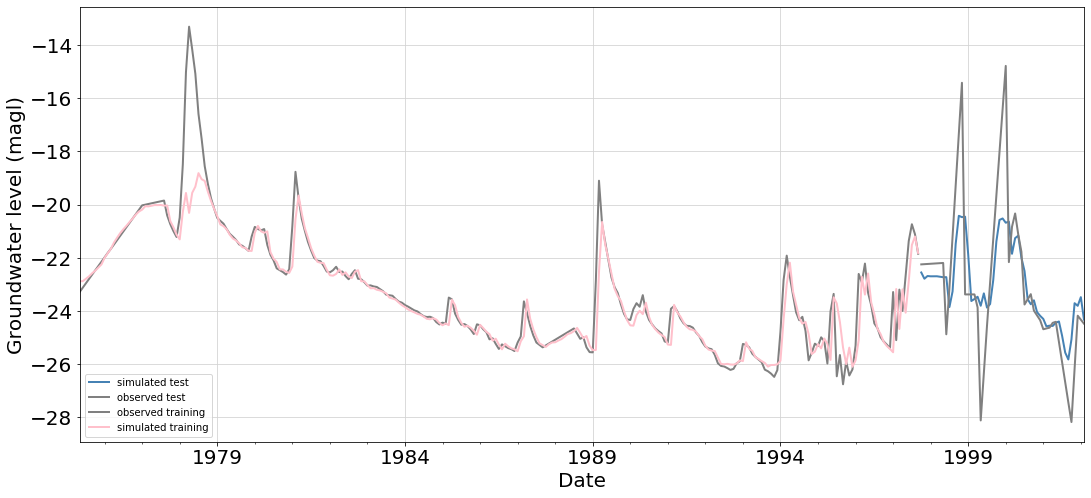

In [111]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0]

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(269, 6)
Running fold 10
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [113]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   4.317    2.078  0.466   1.543
1   Iteration_2   4.547    2.132  0.437   1.549
2   Iteration_3   4.173    2.043  0.484   1.489
3   Iteration_4   4.583    2.141  0.433   1.549
4   Iteration_5   4.467    2.113  0.447   1.513
5   Iteration_6   4.236    2.058  0.476   1.477
6   Iteration_7   4.536    2.130  0.439   1.555
7   Iteration_8   4.476    2.116  0.446   1.530
8   Iteration_9   4.335    2.082  0.464   1.474
9  Iteration_10   4.374    2.091  0.459   1.485

In [114]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [115]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.043
Root mean squared error is: 0.208
Mean absolute error is: 0.145
R^2 score is:  0.991

The model performance for the test set
--------------------------------------
R^2 score is:  0.455
Mean squared error is: 4.404
Root mean squared error is: 2.098
Mean absolute error is: 1.516


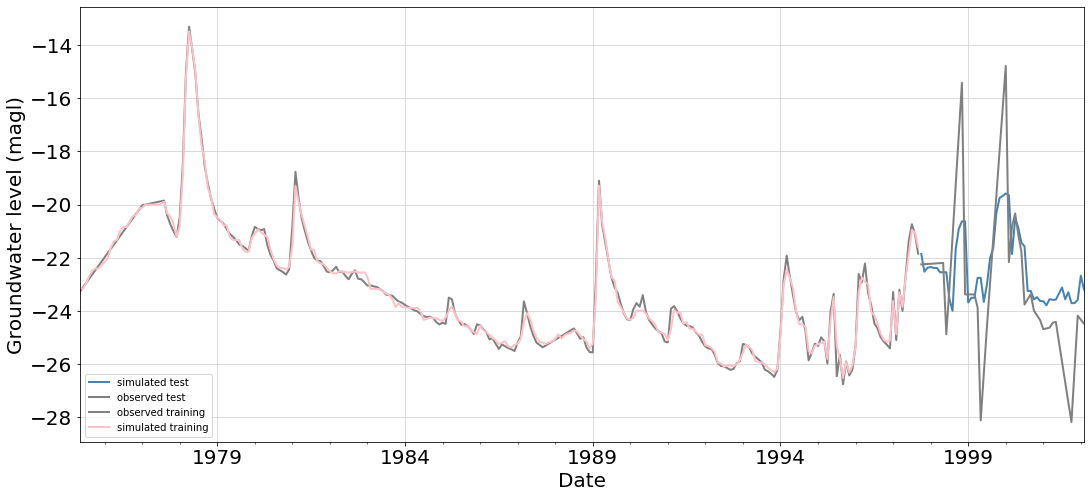

In [116]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0]

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(269, 6)
Running fold 2
(269, 6)
Running fold 3
(269, 6)
Running fold 4
(269, 6)
Running fold 5
(269, 6)
Running fold 6
(269, 6)
Running fold 7
(269, 6)
Running fold 8
(269, 6)
Running fold 9
(269, 6)
Running fold 10
(269, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [118]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   3.329    1.824  0.588   1.341
1   Iteration_2   3.215    1.793  0.602   1.229
2   Iteration_3   2.876    1.696  0.644   1.269
3   Iteration_4   3.131    1.769  0.613   1.286
4   Iteration_5   3.251    1.803  0.598   1.246
5   Iteration_6   3.607    1.899  0.554   1.355
6   Iteration_7   3.385    1.840  0.581   1.322
7   Iteration_8   3.523    1.877  0.564   1.295
8   Iteration_9   2.865    1.693  0.645   1.228
9  Iteration_10   3.389    1.841  0.581   1.286

In [119]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:269, 6].values

In [120]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.043
Root mean squared error is: 0.208
Mean absolute error is: 0.145
R^2 score is:  0.991

The model performance for the test set
--------------------------------------
R^2 score is:  0.597
Mean squared error is: 3.257
Root mean squared error is: 1.804
Mean absolute error is: 1.286


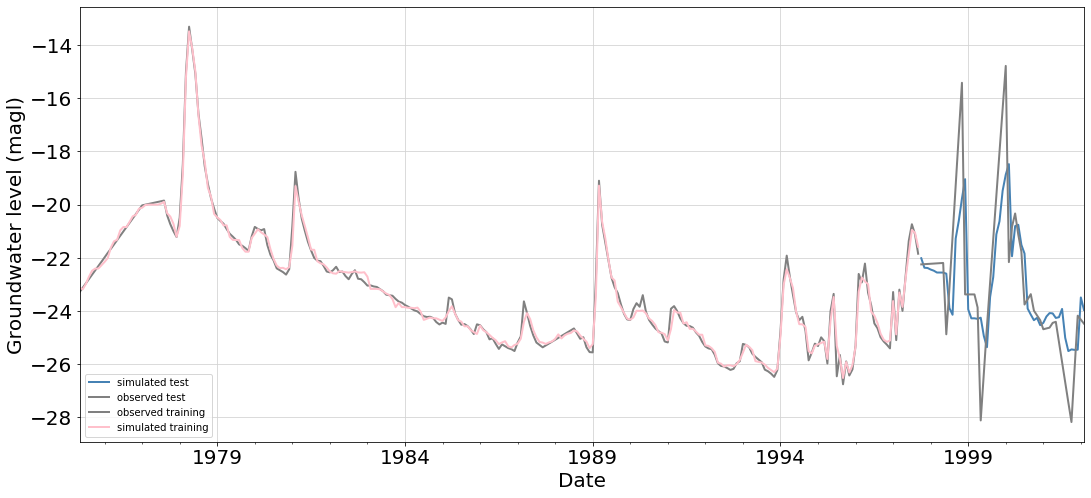

In [121]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[269:322].index)
df1['observed test']      = pima.iloc[269:322, 0]

df2 = pd.DataFrame(pima.iloc[0:269, 0].values, columns = ['observed training'],index =pima.iloc[0:269].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [122]:
vs = pd.DataFrame(pima.iloc[269:322, 0], columns = ['Observed'],index =pima.iloc[269:322].index)
vs['FFNN'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

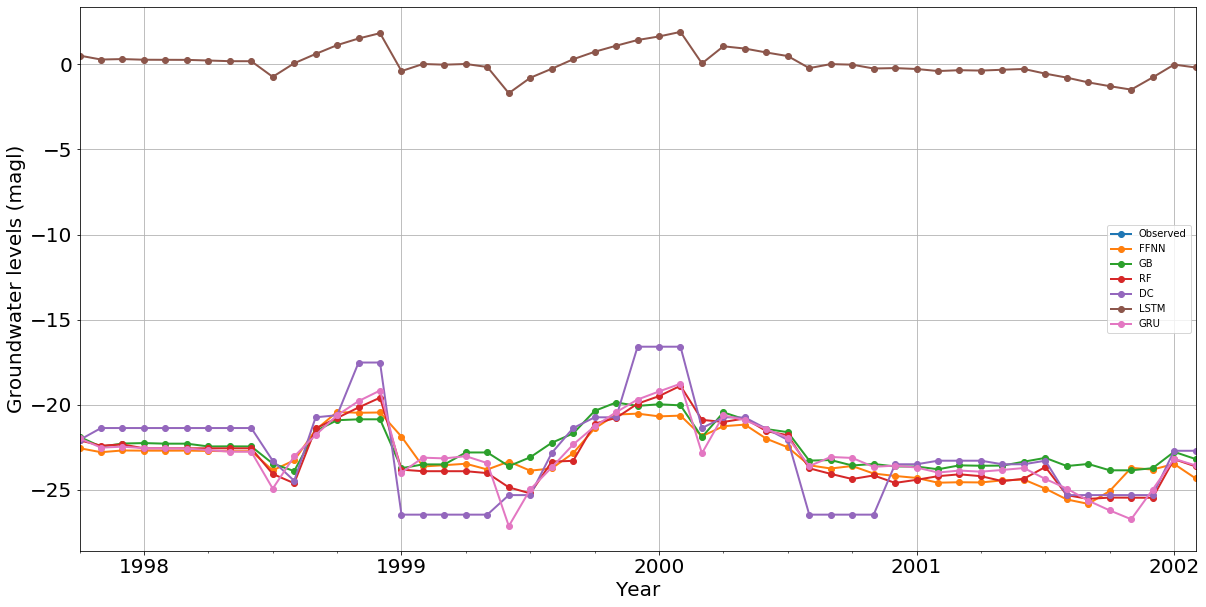

In [123]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)